# Import library and Dataset

In [ ]:
#from google.colab import files
#files.upload()

In [ ]:
! pip install kaggle

In [ ]:
! mkdir ~/.kaggle

In [ ]:
#! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
import json
import zipfile
import os
from pathlib import Path
api_token = {"username":"rattapornk","key":"9a9017f57e099d1b52bfccf94afccf30"}
kaggle_path = Path('/root/.kaggle')
os.makedirs(kaggle_path, exist_ok=True)

with open (kaggle_path/'kaggle.json', 'w') as handl:
    json.dump(api_token,handl)

In [ ]:
! kaggle datasets download -d rattapornk/memcat-datacat

  0% 0.00/255k [00:00<?, ?B/s]
100% 255k/255k [00:00<00:00, 94.4MB/s]


In [ ]:
! unzip /content/memcat-datacat.zip

Archive:  /content/memcat-datacat.zip
  inflating: animal.csv              
  inflating: food.csv                
  inflating: landscape.csv           
  inflating: sports.csv              
  inflating: vehicle.csv             


In [ ]:
!kaggle datasets download -d rattapornk/memcat-split-csv

  0% 0.00/66.1k [00:00<?, ?B/s]
100% 66.1k/66.1k [00:00<00:00, 60.3MB/s]


In [ ]:
! unzip /content/memcat-split-csv.zip

Archive:  /content/memcat-split-csv.zip
  inflating: test_animal_new.csv     
  inflating: test_food_new.csv       
  inflating: test_landscape_new.csv  
  inflating: train_animal_new.csv    
  inflating: train_food_new.csv      
  inflating: train_landscape_new.csv  
  inflating: val_animal_new.csv      
  inflating: val_food_new.csv        
  inflating: val_landscape_new.csv   


In [ ]:
! kaggle datasets download -d rattapornk/memcat-cat

 99% 1.08G/1.09G [00:15<00:00, 82.6MB/s]
100% 1.09G/1.09G [00:15<00:00, 73.8MB/s]


In [ ]:
! unzip /content/memcat-cat.zip

Streaming output truncated to the last 5000 lines.
  inflating: landscape/n09376198_10845.jpg  
  inflating: landscape/n09376198_10901.jpg  
  inflating: landscape/n09376198_11171.jpg  
  inflating: landscape/n09376198_11360.jpg  
  inflating: landscape/n09376198_12294.jpg  
  inflating: landscape/n09376198_12692.jpg  
  inflating: landscape/n09376198_13588.jpg  
  inflating: landscape/n09376198_13928.jpg  
  inflating: landscape/n09376198_1396.jpg  
  inflating: landscape/n09376198_14485.jpg  
  inflating: landscape/n09376198_14571.jpg  
  inflating: landscape/n09376198_15308.jpg  
  inflating: landscape/n09376198_15319.jpg  
  inflating: landscape/n09376198_15467.jpg  
  inflating: landscape/n09376198_15858.jpg  
  inflating: landscape/n09376198_16065.jpg  
  inflating: landscape/n09376198_16253.jpg  
  inflating: landscape/n09376198_16513.jpg  
  inflating: landscape/n09376198_16757.jpg  
  inflating: landscape/n09376198_17428.jpg  
  inflating: landscape/n09376198_178.jpg  
  infla

In [ ]:
!pip install einops

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.6/44.6 kB 1.4 MB/s eta 0:00:00


In [ ]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import os
import cv2

import numpy as np
from torch import nn
from torch import Tensor
from PIL import Image
from torchvision import transforms
import torchvision
from einops import rearrange, reduce, repeat
from einops.layers.torch import Rearrange, Reduce
from torch.utils.data import Dataset, DataLoader
from torchsummary import summary
from sklearn.utils import shuffle
import torchvision.models as models
import gc
from tqdm import tqdm
import torch.optim as optim
import random
import pandas as pd
from sklearn.utils import shuffle
import time

from transformers import ViTConfig, ViTModel, ViTFeatureExtractor
import tensorflow as tf

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
!pip install timm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 21.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 19.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 23.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━

In [ ]:
import timm

In [ ]:
from transformers import ResNetConfig, ResNetModel
from transformers import AutoImageProcessor, ConvNextImageProcessor, ConvNextModel

In [ ]:
from torchsummary import summary
import torch.nn.functional as F

In [ ]:
import torchvision.models as models

# Preprocess & Split

In [ ]:
df_animal = pd.read_csv("/content/animal.csv")
df_animal["image_file"] =df_animal["image_file"].apply(lambda file: "/content/animal" +"/"+ file) # Create image path
df_animal["memorability_wo_fa_correction"] = df_animal["memorability_wo_fa_correction"].values.astype(np.float32)

In [ ]:
df_animal.head()

Unnamed: 0                        image_file category subcategory  \
0           1  /content/animal/000000003481.jpg   animal        bear   
1           2  /content/animal/000000005745.jpg   animal        bear   
2           3  /content/animal/000000011552.jpg   animal        bear   
3           4  /content/animal/000000027439.jpg   animal        bear   
4           5  /content/animal/000000055601.jpg   animal        bear   

   current_height  current_width source searched_label  resize_factor   H  FA  \
0             316            500   coco           bear              1  55   4   
1             427            640   coco           bear              1  64   4   
2             427            640   coco           bear              1  75   5   
3             359            640   coco           bear              1  92   3   
4             380            640   coco           bear              1  83  12   

   n_resp  memorability_wo_fa_correction  memorability_w_fa_correction  
0      98                       0.561224                      0.520408  
1      81                       0.790123                      0.740741  
2     104                       0.721154                      0.673077  
3     114                       0.807018                      0.780702  
4     102                       0.813725                      0.696078

In [ ]:
# Sample data (replace this with your DataFrame)
df_animal = pd.DataFrame({
    'image_file': df_animal["image_file"],
    'memoscore': df_animal["memorability_wo_fa_correction"]
})

# Create a new column to store the paths of preprocessed images
df_animal['preprocessed_image_path'] = ''

# Empty lists to store preprocessed images
images = []

# Load and preprocess images
for index, row in df_animal.iterrows():
    image_path = row['image_file']
    image = cv2.imread(image_path)

    if image is None:
        print(f"Error reading image: {image_path}")
        continue

    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    image = cv2.resize(image, (224, 224))  # Resize image if necessary

    # Save preprocessed image to the same path
    preprocessed_path = os.path.splitext(image_path)[0] + '_preprocessed.jpg'
    cv2.imwrite(preprocessed_path, cv2.cvtColor(image, cv2.COLOR_RGB2BGR))

    # Store preprocessed image path in the DataFrame
    df_animal.at[index, 'preprocessed_image_path'] = preprocessed_path

    images.append(image)

# Convert the list of images into a NumPy array
images = np.array(images)

# Save preprocessed images as NumPy array (if needed)
#np.save('/content/drive/MyDrive/your_folder/preprocessed_images.npy', images)

# Calculate basic image statistics
print('Image shape:', images.shape)
print('Minimum pixel value:', np.min(images))
print('Maximum pixel value:', np.max(images))
print('Mean pixel value:', np.mean(images))
print('Standard deviation of pixel values:', np.std(images))

# Visualize sample images
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
axes = axes.flatten()
for i in range(min(10, len(images))):
    axes[i].imshow(images[i])
    axes[i].axis('off')
    axes[i].set_title(os.path.basename(df_animal.at[i, 'preprocessed_image_path']))  # Display file name as title
plt.tight_layout()
plt.show()

# Display the updated DataFrame with preprocessed image paths
#print(df_landscape)

Image shape: (2000, 224, 224, 3)
Minimum pixel value: 0
Maximum pixel value: 255
Mean pixel value: 111.59846612590349
Standard deviation of pixel values: 64.12019565963958


In [ ]:
df_animal.head()

image_file  memoscore  \
0  /content/animal/000000003481.jpg   0.561224   
1  /content/animal/000000005745.jpg   0.790123   
2  /content/animal/000000011552.jpg   0.721154   
3  /content/animal/000000027439.jpg   0.807018   
4  /content/animal/000000055601.jpg   0.813725   

                         preprocessed_image_path  
0  /content/animal/000000003481_preprocessed.jpg  
1  /content/animal/000000005745_preprocessed.jpg  
2  /content/animal/000000011552_preprocessed.jpg  
3  /content/animal/000000027439_preprocessed.jpg  
4  /content/animal/000000055601_preprocessed.jpg

In [ ]:
del df_animal["image_file"]

In [ ]:
df_animal.head()

memoscore                        preprocessed_image_path
0   0.561224  /content/animal/000000003481_preprocessed.jpg
1   0.790123  /content/animal/000000005745_preprocessed.jpg
2   0.721154  /content/animal/000000011552_preprocessed.jpg
3   0.807018  /content/animal/000000027439_preprocessed.jpg
4   0.813725  /content/animal/000000055601_preprocessed.jpg

In [ ]:
from sklearn.model_selection import train_test_split

# Split the DataFrame into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(pd.DataFrame(df_animal.drop('memoscore', axis=1)), pd.DataFrame(df_animal['memoscore']), test_size=0.1)

# Split the validation set into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.5)

# Print the train, validation, and test set sizes
print('Train set size:', len(X_train))
print('Validation set size:', len(X_val))
print('Test set size:', len(X_test))

Train set size: 1800
Validation set size: 100
Test set size: 100


In [ ]:
X_train.head()

preprocessed_image_path
1177     /content/animal/000000555782_preprocessed.jpg
1422  /content/animal/n01811909_12341_preprocessed.jpg
1970     /content/animal/000000424152_preprocessed.jpg
1981     /content/animal/000000481760_preprocessed.jpg
240    /content/animal/n01514859_2765_preprocessed.jpg

In [ ]:
merged_train_animal= pd.concat([X_train, y_train], axis=1)
merged_train_animal

preprocessed_image_path  memoscore
1177     /content/animal/000000555782_preprocessed.jpg   0.707865
1422  /content/animal/n01811909_12341_preprocessed.jpg   0.803922
1970     /content/animal/000000424152_preprocessed.jpg   0.835052
1981     /content/animal/000000481760_preprocessed.jpg   0.852273
240    /content/animal/n01514859_2765_preprocessed.jpg   0.734043
...                                                ...        ...
429    /content/animal/n02430045_5913_preprocessed.jpg   0.838710
120      /content/animal/000000145476_preprocessed.jpg   0.917431
778      /content/animal/000000463338_preprocessed.jpg   0.822222
1962     /content/animal/000000381282_preprocessed.jpg   0.898148
1580    /content/animal/n02324045_610_preprocessed.jpg   0.849057

[1800 rows x 2 columns]

In [ ]:
# @title memoscore

from matplotlib import pyplot as plt
merged_train_animal['memoscore'].plot(kind='hist', bins=20, title='memoscore')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
merged_val_animal = pd.concat([X_val, y_val], axis=1)
merged_val_animal

preprocessed_image_path  memoscore
1438  /content/animal/n01811909_15169_preprocessed.jpg   0.760000
1634     /content/animal/000000178244_preprocessed.jpg   0.519231
973      /content/animal/000000441891_preprocessed.jpg   0.881818
459    /content/animal/n02431785_3713_preprocessed.jpg   0.801980
36       /content/animal/000000338488_preprocessed.jpg   0.795918
...                                                ...        ...
20       /content/animal/000000213437_preprocessed.jpg   0.793478
1154     /content/animal/000000406750_preprocessed.jpg   0.703704
1488   /content/animal/n01811909_8563_preprocessed.jpg   0.731959
1784   /content/animal/n02355227_5466_preprocessed.jpg   0.969388
486    /content/animal/n02434954_2920_preprocessed.jpg   0.565217

[100 rows x 2 columns]

In [ ]:
# @title memoscore

from matplotlib import pyplot as plt
merged_val_animal['memoscore'].plot(kind='hist', bins=20, title='memoscore')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
merged_test_animal = pd.concat([X_test, y_test], axis=1)
merged_test_animal

preprocessed_image_path  memoscore
729      /content/animal/000000221089_preprocessed.jpg   0.813725
1108     /content/animal/000000119108_preprocessed.jpg   0.850000
172      /content/animal/000000439085_preprocessed.jpg   0.896907
1796   /content/animal/n02355227_8586_preprocessed.jpg   0.800000
1915     /content/animal/000000100661_preprocessed.jpg   0.773585
...                                                ...        ...
690    /content/animal/n01846331_8530_preprocessed.jpg   0.659574
1067   /content/animal/n02342885_4843_preprocessed.jpg   0.936937
1118     /content/animal/000000196839_preprocessed.jpg   0.614035
199   /content/animal/n02123597_11551_preprocessed.jpg   0.854369
1065   /content/animal/n02342885_4519_preprocessed.jpg   0.918367

[100 rows x 2 columns]

# Save CSV To GGDrive

In [ ]:
# บันทึกตารางเป็นไฟล์ CSV
csv_train_animal = '/content/drive/MyDrive/IS/MemCat_data/dataproject/train/animal_Vit+Res.csv'
merged_train_animal.to_csv(csv_train_animal, index=False)

In [ ]:
csv_val_animal = '/content/drive/MyDrive/IS/MemCat_data/dataproject/val/animal_Vit+Res.csv'
merged_val_animal.to_csv(csv_val_animal, index=False)

In [ ]:
csv_test_animal = '/content/drive/MyDrive/IS/MemCat_data/dataproject/test/animal_Vit+Res.csv'
merged_test_animal.to_csv(csv_test_animal, index=False)

#Load Dataset

In [ ]:
df_train_animal = pd.read_csv("/content/drive/MyDrive/IS/MemCat_data/dataproject/train/animal_Vit+Res.csv")
df_val_animal = pd.read_csv( '/content/drive/MyDrive/IS/MemCat_data/dataproject/val/animal_Vit+Res.csv')
df_test_animal = pd.read_csv('/content/drive/MyDrive/IS/MemCat_data/dataproject/test/animal_Vit+Res.csv')

In [ ]:
df_train_animal.head()

preprocessed_image_path  memoscore
0   /content/animal/n02450034_4331_preprocessed.jpg   0.656566
1   /content/animal/n02129530_2199_preprocessed.jpg   0.827957
2     /content/animal/000000404172_preprocessed.jpg   0.923077
3   /content/animal/n02355227_5804_preprocessed.jpg   0.898990
4  /content/animal/n01792640_10135_preprocessed.jpg   0.734694

In [ ]:
df_train_animal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   preprocessed_image_path  1800 non-null   object 
 1   memoscore                1800 non-null   float64
dtypes: float64(1), object(1)
memory usage: 28.2+ KB


#Load Pretrain

In [ ]:
# Define function to add data/model in to GPU (cuda)
def get_default_device():
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
def to_device(data, device):
    # if data is list or tuple, move each of them to device
    if isinstance(data, (list, tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    def __init__(self, dl, device) -> None:
        self.dl = dl
        self.device = device

    def __iter__(self):
        for b in self.dl:
            # yield only execuate when the function is called
            yield to_device(b, self. device)

    def __len__(self):
        return len(self.dl)

## Train

In [ ]:
class Dataset(Dataset):
    def __init__(self, df, trans_transform=None, res_transform=None):
        self.labels = df["memoscore"]
        self.images = df["preprocessed_image_path"]
        self.trans_transform = trans_transform
        self.res_transform = res_transform

    def __len__ (self):
        return len(self.labels)

    def __getitem__(self, idx):
        img_path = self.images[idx]
        image = Image.open(img_path)

        image_trans = self.trans_transform(np.array(image), return_tensors='pt')
        image_trans = image_trans['pixel_values'].squeeze()

        image_res = self.res_transform(image)


        label = self.labels[idx]

        return image_trans, image_res, label

trans_transform = ViTFeatureExtractor.from_pretrained('google/vit-base-patch16-224')
res_transform = transforms.Compose([
    transforms.Resize(224),
    transforms.ToTensor(),
    #transforms.Normalize(mean=[0.0, 0.0, 0.0], std=[1.0, 1.0, 1.0]),
])


train_ds = Dataset(df_train_animal, trans_transform=trans_transform, res_transform=res_transform)
train_dl = DataLoader(train_ds, batch_size=16, shuffle= False)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


In [ ]:
# Modify the model - ResNet
model_Res = torch.hub.load('pytorch/vision:v0.10.0', 'resnet50', pretrained=True)

# Remove the last layer of the model Res
layers_Res = list(model_Res.children())
model_Res = nn.Sequential(*layers_Res[:-1])

# Set the top layers to be not trainable
count = 0
for child in model_Res.children():
    count += 1
    if count < 8:
        for param in child.parameters():
            param.requires_grad = False

print(model_Res )


Downloading: "https://github.com/pytorch/vision/zipball/v0.10.0" to /root/.cache/torch/hub/v0.10.0.zip
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 133MB/s]


Sequential(
  (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU(inplace=True)
  (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (4): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)


In [ ]:
# Modify the model - ViT model
model_trans = ViTModel.from_pretrained('google/vit-base-patch16-224-in21k')
count = 0
for child in model_trans.children():
    count += 1
    if count < 4:
        for param in child.parameters():
            param.requires_grad = False

layers_trans = list(model_trans.children()) # Get all the layers from the Transformer model
model_trans_top = nn.Sequential(*layers_trans[:-2]) # Remove the normalization layer and pooler layer
trans_layer_norm = list(model_trans.children())[2] # Get the normalization layer
mymodel = nn.Sigmoid()

config.json:   0%|          | 0.00/502 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

In [ ]:
print(trans_layer_norm )

LayerNorm((768,), eps=1e-12, elementwise_affine=True)


In [ ]:
print(layers_trans)

[ViTEmbeddings(
  (patch_embeddings): ViTPatchEmbeddings(
    (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
  )
  (dropout): Dropout(p=0.0, inplace=False)
), ViTEncoder(
  (layer): ModuleList(
    (0-11): 12 x ViTLayer(
      (attention): ViTAttention(
        (attention): ViTSelfAttention(
          (query): Linear(in_features=768, out_features=768, bias=True)
          (key): Linear(in_features=768, out_features=768, bias=True)
          (value): Linear(in_features=768, out_features=768, bias=True)
          (dropout): Dropout(p=0.0, inplace=False)
        )
        (output): ViTSelfOutput(
          (dense): Linear(in_features=768, out_features=768, bias=True)
          (dropout): Dropout(p=0.0, inplace=False)
        )
      )
      (intermediate): ViTIntermediate(
        (dense): Linear(in_features=768, out_features=3072, bias=True)
        (intermediate_act_fn): GELUActivation()
      )
      (output): ViTOutput(
        (dense): Linear(in_features=3072, ou

In [ ]:
# Merge the two models
class model_merge(nn.Module):
    def __init__(self, model_trans_top, trans_layer_norm, model_Res,mymodel ):
        super().__init__()
        # All the trans model layers
        self.model_trans_top = model_trans_top
        self.trans_layer_norm = trans_layer_norm
        self.trans_flatten = nn.Flatten()
        self.trans_linear = nn.Linear(150528, 2048)

        # All the ResNet model
        self.model_Res = model_Res

        # Merge the result and pass the
        #self.dropout = nn.Dropout(dp_rate)
        self.linear1 = nn.Linear(4096, 500)
        self.linear2 = nn.Linear(500,1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, trans_b, res_b):
        # Get intermediate outputs using hidden layer
        result_trans = self.model_trans_top(trans_b)
        patch_state = result_trans.last_hidden_state[:,1:,:] # Remove the classification token and get the last hidden state of all patchs
        result_trans = self.trans_layer_norm(patch_state)
        result_trans = self.trans_flatten(patch_state)
        #result_trans = self.dropout(result_trans)
        result_trans = self.trans_linear(result_trans)

        result_res = self.model_Res(res_b)
        result_res = result_res.view(result_res.size(0), -1)  # Equivalent to squeeze and reshape

        result_merge = torch.cat((result_trans, result_res),1)
        #result_merge = self.dropout(result_merge)
        result_merge = self.linear1(result_merge)
        #result_merge = self.dropout(result_merge)
        result_merge = self.linear2(result_merge)
        result_merge = self.sigmoid(result_merge)
        return result_merge


model = model_merge(model_trans_top, trans_layer_norm, model_Res,mymodel )
#model.load_state_dict(torch.load('model_weights'))

In [ ]:
# Add data and model to GPU
device = get_default_device()
train_dl = DeviceDataLoader(train_dl, device)
model = to_device(model, device)

In [ ]:
# Define optimizer and learning_rate scheduler
params = [param for param in list(model.parameters()) if param.requires_grad]
optimizer = torch.optim.Adam(params, lr=1e-7)
lr_scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
    optimizer,
    mode='min',
    factor=0.1,
    patience=2,
    verbose=True)

In [ ]:
def plot_scatter(true_values, predicted_values, epoch):
    plt.figure(figsize=(8, 8))
    plt.scatter(true_values, predicted_values, alpha=0.5)
    plt.title(f'Scatter Plot - Epoch {epoch+1}')
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.grid(True)
    plt.show()

# Fit function doing grad steps
def fit(epochs, model, train_dl):
    opt = optimizer
    sched = lr_scheduler
    loss_func = nn.MSELoss()
    mae_func = nn.L1Loss()

    for epoch in range(epochs):
        model.train()
        batch_num = 16
        true_values_list = []
        predicted_values_list = []
        for x_trans, x_res, yb in train_dl:
            total_loss = 0
            total_loss_rmse = 0
            total_r2 = 0
            total_mae = 0
            yb = yb.float()

            # Pass the optimizer so that the model will get trained
            preds = model(x_trans,x_res)
            loss = loss_func(preds.squeeze(), yb)
            loss_rmse = torch.sqrt(loss)
            mae = mae_func(preds.squeeze(), yb)

            # Calculate R-squared
            mean_y = torch.mean(yb)
            ss_total = torch.sum((yb - mean_y)**2)
            ss_residual = torch.sum((yb - preds.squeeze())**2)
            r2 = 1 - (ss_residual / ss_total)

             # Accumulate true and predicted values for scatter plot
            true_values_list.extend(yb.cpu().detach().numpy())
            predicted_values_list.extend(preds.squeeze().cpu().detach().numpy())

            loss.backward()
            opt.step()
            opt.zero_grad()

            total_loss += loss.item()
            total_loss_rmse += loss_rmse.item()
            total_r2 += r2.item()
            total_mae += mae.item()
            #total_spearman += spearman_corr

            # Increment batch number
            #print('\r', f'batch #{batch_num}: {loss}', end='')
            batch_num += 5

        mean_r2 = total_r2 / batch_num
        mean_mae = total_mae / batch_num

        # Print epoch information
        print('\n', f'Epoch: ({epoch+1}/{epochs}) Loss = {total_loss}')
        print('\n', f'Epoch: ({epoch+1}/{epochs}) Loss_rmse = {total_loss_rmse}')
        print('\n', f'Epoch: ({epoch+1}/{epochs}) R^2 = {total_r2}')
        print('\n', f'Epoch: ({epoch+1}/{epochs}) MAE = {total_mae}')
        #print('\n', f'Epoch: ({epoch+1}/{epochs}) Spearman = {mean_spearman}')
        print('\n', f"true_values_list_val : { len(true_values_list)}")
        print('\n', f"predicted_values_list_val : {len(predicted_values_list)}")
        print('\n', f"true_values_list_val : { true_values_list}")
        print('\n', f"predicted_values_list_val : {predicted_values_list}")
        # Plot scatter plot after each epoch
        plot_scatter(true_values_list, predicted_values_list, epoch)


In [ ]:
# Training the model and save weights
fit(50, model, train_dl)
torch.save(model.state_dict(), "model_weights_vr")

## Valid

In [ ]:
class Dataset_val(Dataset):
    def __init__(self, df, trans_transform=None, res_transform=None):
        self.labels = df["memoscore"]
        self.images = df["preprocessed_image_path"]
        self.trans_transform = trans_transform
        self.res_transform = res_transform

    def __len__ (self):
        return len(self.labels)

    def __getitem__(self, idx):
        img_path = self.images[idx]
        image = Image.open(img_path)

        image_trans = self.trans_transform(np.array(image), return_tensors='pt')
        image_trans = image_trans['pixel_values'].squeeze()

        image_res = self.res_transform(image)


        label = self.labels[idx]

        return image_trans, image_res, label

trans_transform = ViTFeatureExtractor.from_pretrained('google/vit-base-patch16-224')
res_transform = transforms.Compose([
    transforms.Resize(224),
    transforms.ToTensor(),
    #transforms.Normalize(mean=[0.0, 0.0, 0.0], std=[1.0, 1.0, 1.0]),
])


train_ds = Dataset_val(df_val_animal, trans_transform=trans_transform, res_transform=res_transform)
train_dl_val = DataLoader(train_ds, batch_size=16, shuffle= False)

In [ ]:
# Modify the model - ResNet
model_Res = torch.hub.load('pytorch/vision:v0.10.0', 'resnet50', pretrained=True)

# Remove the last layer of the model Res
layers_Res = list(model_Res.children())
model_Res = nn.Sequential(*layers_Res[:-1])

# Set the top layers to be not trainable
count = 0
for child in model_Res.children():
    count += 1
    if count < 8:
        for param in child.parameters():
            param.requires_grad = False

print(model_Res )


Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.10.0


Sequential(
  (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU(inplace=True)
  (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (4): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)


In [ ]:
# Modify the model - ViT model
model_trans = ViTModel.from_pretrained('google/vit-base-patch16-224-in21k')
count = 0
for child in model_trans.children():
    count += 1
    if count < 4:
        for param in child.parameters():
            param.requires_grad = False

layers_trans = list(model_trans.children()) # Get all the layers from the Transformer model
model_trans_top = nn.Sequential(*layers_trans[:-2]) # Remove the normalization layer and pooler layer
trans_layer_norm = list(model_trans.children())[2] # Get the normalization layer
mymodel = nn.Sigmoid()

In [ ]:
# Merge the two models
class model_merge_val(nn.Module):
    def __init__(self, model_trans_top, trans_layer_norm, model_Res,mymodel ):
        super().__init__()
        # All the trans model layers
        self.model_trans_top = model_trans_top
        self.trans_layer_norm = trans_layer_norm
        self.trans_flatten = nn.Flatten()
        self.trans_linear = nn.Linear(150528, 2048)

        # All the ResNet model
        self.model_Res = model_Res

        # Merge the result and pass the
        #self.dropout = nn.Dropout(dp_rate)
        self.linear1 = nn.Linear(4096, 500)
        self.linear2 = nn.Linear(500,1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, trans_b, res_b):
        # Get intermediate outputs using hidden layer
        result_trans = self.model_trans_top(trans_b)
        patch_state = result_trans.last_hidden_state[:,1:,:] # Remove the classification token and get the last hidden state of all patchs
        result_trans = self.trans_layer_norm(patch_state)
        result_trans = self.trans_flatten(patch_state)
        #result_trans = self.dropout(result_trans)
        result_trans = self.trans_linear(result_trans)

        result_res = self.model_Res(res_b)
        result_res = result_res.view(result_res.size(0), -1)  # Equivalent to squeeze and reshape

        result_merge = torch.cat((result_trans, result_res),1)
        #result_merge = self.dropout(result_merge)
        result_merge = self.linear1(result_merge)
        #result_merge = self.dropout(result_merge)
        result_merge = self.linear2(result_merge)
        result_merge = self.sigmoid(result_merge)
        return result_merge


model_val = model_merge_val(model_trans_top, trans_layer_norm, model_Res,mymodel )
#model.load_state_dict(torch.load('model_weights'))

In [ ]:
# Add data and model to GPU
device = get_default_device()
train_dl_val = DeviceDataLoader(train_dl_val, device)
model_val = to_device(model_val, device)

In [ ]:
# Define optimizer and learning_rate scheduler
params = [param for param in list(model_val.parameters()) if param.requires_grad]
optimizer = torch.optim.Adam(params, lr=1e-7)
lr_scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
    optimizer,
    mode='min',
    factor=0.1,
    patience=2,
    verbose=True)

In [ ]:
def plot_scatter(true_values, predicted_values, epoch):
    plt.figure(figsize=(8, 8))
    plt.scatter(true_values, predicted_values, alpha=0.5)
    plt.title(f'Scatter Plot - Epoch {epoch+1}')
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.grid(True)
    plt.show()

# Fit function doing grad steps
def fit(epochs, model_val, train_dl_val):
    opt = optimizer
    sched = lr_scheduler
    loss_func = nn.MSELoss()
    mae_func = nn.L1Loss()

    for epoch in range(epochs):
        model_val.train()
        batch_num = 16
        true_values_list = []
        predicted_values_list = []
        for x_trans, x_res, yb in train_dl_val:
            total_loss = 0
            total_loss_rmse = 0
            total_r2 = 0
            total_mae = 0
            yb = yb.float()

            # Pass the optimizer so that the model will get trained
            preds = model_val(x_trans,x_res)
            loss = loss_func(preds.squeeze(), yb)
            loss_rmse = torch.sqrt(loss)
            mae = mae_func(preds.squeeze(), yb)

            # Calculate R-squared
            mean_y = torch.mean(yb)
            ss_total = torch.sum((yb - mean_y)**2)
            ss_residual = torch.sum((yb - preds.squeeze())**2)
            r2 = 1 - (ss_residual / ss_total)

             # Accumulate true and predicted values for scatter plot
            true_values_list.extend(yb.cpu().detach().numpy())
            predicted_values_list.extend(preds.squeeze().cpu().detach().numpy())

            loss.backward()
            opt.step()
            opt.zero_grad()

            total_loss += loss.item()
            total_loss_rmse += loss_rmse.item()
            total_r2 += r2.item()
            total_mae += mae.item()
            #total_spearman += spearman_corr

            # Increment batch number
            #print('\r', f'batch #{batch_num}: {loss}', end='')
            batch_num += 5

        mean_r2 = total_r2 / batch_num
        mean_mae = total_mae / batch_num

        # Print epoch information
        print('\n', f'Epoch: ({epoch+1}/{epochs}) Loss = {total_loss}')
        print('\n', f'Epoch: ({epoch+1}/{epochs}) Loss_rmse = {total_loss_rmse}')
        print('\n', f'Epoch: ({epoch+1}/{epochs}) R^2 = {total_r2}')
        print('\n', f'Epoch: ({epoch+1}/{epochs}) MAE = {total_mae}')
        #print('\n', f'Epoch: ({epoch+1}/{epochs}) Spearman = {mean_spearman}')
        print('\n', f"true_values_list_val : { len(true_values_list)}")
        print('\n', f"predicted_values_list_val : {len(predicted_values_list)}")
        print('\n', f"true_values_list_val : { true_values_list}")
        print('\n', f"predicted_values_list_val : {predicted_values_list}")
        # Plot scatter plot after each epoch
        plot_scatter(true_values_list, predicted_values_list, epoch)

In [ ]:
# Training the model and save weights
fit(100, model_val, train_dl_val)
torch.save(model.state_dict(), "model_weights_vr_val")

## Test

In [ ]:
class Dataset_test_animal(Dataset):
    def __init__(self, df, trans_transform=None, res_transform=None):
        self.labels = df["memoscore"]
        self.images = df["preprocessed_image_path"]
        self.trans_transform = trans_transform
        self.res_transform = res_transform

    def __len__ (self):
        return len(self.labels)

    def __getitem__(self, idx):
        img_path = self.images[idx]
        image = Image.open(img_path)

        image_trans = self.trans_transform(np.array(image), return_tensors='pt')
        image_trans = image_trans['pixel_values'].squeeze()

        image_res = self.res_transform(image)


        label = self.labels[idx]

        return image_trans, image_res, label

trans_transform = ViTFeatureExtractor.from_pretrained('google/vit-base-patch16-224')
res_transform = transforms.Compose([
    transforms.Resize(224),
    transforms.ToTensor(),
    #transforms.Normalize(mean=[0.0, 0.0, 0.0], std=[1.0, 1.0, 1.0]),
])


train_ds = Dataset_test_animal(df_test_animal, trans_transform=trans_transform, res_transform=res_transform)
train_dl_test = DataLoader(train_ds, batch_size=16, shuffle= False)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


In [ ]:
# Modify the model - ResNet
model_Res = torch.hub.load('pytorch/vision:v0.10.0', 'resnet50', pretrained=True)

# Remove the last layer of the model Res
layers_Res = list(model_Res.children())
model_Res = nn.Sequential(*layers_Res[:-1])

# Set the top layers to be not trainable
count = 0
for child in model_Res.children():
    count += 1
    if count < 8:
        for param in child.parameters():
            param.requires_grad = False

print(model_Res )


Downloading: "https://github.com/pytorch/vision/zipball/v0.10.0" to /root/.cache/torch/hub/v0.10.0.zip
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:02<00:00, 50.5MB/s]


Sequential(
  (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU(inplace=True)
  (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (4): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)


In [ ]:
# Modify the model - ViT model
model_trans = ViTModel.from_pretrained('google/vit-base-patch16-224-in21k')
count = 0
for child in model_trans.children():
    count += 1
    if count < 4:
        for param in child.parameters():
            param.requires_grad = False

layers_trans = list(model_trans.children()) # Get all the layers from the Transformer model
model_trans_top = nn.Sequential(*layers_trans[:-2]) # Remove the normalization layer and pooler layer
trans_layer_norm = list(model_trans.children())[2] # Get the normalization layer
mymodel = nn.Sigmoid()

config.json:   0%|          | 0.00/502 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

In [ ]:
# Merge the two models
class model_merge_test(nn.Module):
    def __init__(self, model_trans_top, trans_layer_norm, model_Res,mymodel ):
        super().__init__()
        # All the trans model layers
        self.model_trans_top = model_trans_top
        self.trans_layer_norm = trans_layer_norm
        self.trans_flatten = nn.Flatten()
        self.trans_linear = nn.Linear(150528, 2048)

        # All the ResNet model
        self.model_Res = model_Res

        # Merge the result and pass the
        #self.dropout = nn.Dropout(dp_rate)
        self.linear1 = nn.Linear(4096, 500)
        self.linear2 = nn.Linear(500,1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, trans_b, res_b):
        # Get intermediate outputs using hidden layer
        result_trans = self.model_trans_top(trans_b)
        patch_state = result_trans.last_hidden_state[:,1:,:] # Remove the classification token and get the last hidden state of all patchs
        result_trans = self.trans_layer_norm(patch_state)
        result_trans = self.trans_flatten(patch_state)
        #result_trans = self.dropout(result_trans)
        result_trans = self.trans_linear(result_trans)

        result_res = self.model_Res(res_b)
        result_res = result_res.view(result_res.size(0), -1)  # Equivalent to squeeze and reshape

        result_merge = torch.cat((result_trans, result_res),1)
        #result_merge = self.dropout(result_merge)
        result_merge = self.linear1(result_merge)
        #result_merge = self.dropout(result_merge)
        result_merge = self.linear2(result_merge)
        result_merge = self.sigmoid(result_merge)
        return result_merge


model_test = model_merge_test(model_trans_top, trans_layer_norm, model_Res,mymodel )
#model.load_state_dict(torch.load('model_weights'))

In [ ]:
# Add data and model to GPU
device = get_default_device()
train_dl_test = DeviceDataLoader(train_dl_test, device)
model_test = to_device(model_test, device)

In [ ]:
# Define optimizer and learning_rate scheduler
params = [param for param in list(model_test.parameters()) if param.requires_grad]
optimizer = torch.optim.Adam(params, lr=1e-7)
lr_scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
    optimizer,
    mode='min',
    factor=0.1,
    patience=2,
    verbose=True)

/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


In [ ]:
def plot_scatter(true_values, predicted_values, epoch):
    plt.figure(figsize=(8, 8))
    plt.scatter(true_values, predicted_values, alpha=0.5)
    plt.title(f'Scatter Plot - Epoch {epoch+1}')
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.grid(True)
    plt.show()

# Fit function doing grad steps
def fit(epochs, model_test, train_dl_test):
    opt = optimizer
    sched = lr_scheduler
    loss_func = nn.MSELoss()
    mae_func = nn.L1Loss()

    for epoch in range(epochs):
        model_test.eval()
        batch_num = 16
        true_values_list = []
        predicted_values_list = []
        for x_trans, x_res, yb in train_dl_test:
            total_loss = 0
            total_loss_rmse = 0
            total_r2 = 0
            total_mae = 0
            yb = yb.float()

            # Pass the optimizer so that the model will get trained
            preds = model_test(x_trans,x_res)
            loss = loss_func(preds.squeeze(), yb)
            loss_rmse = torch.sqrt(loss)
            mae = mae_func(preds.squeeze(), yb)

            # Calculate R-squared
            mean_y = torch.mean(yb)
            ss_total = torch.sum((yb - mean_y)**2)
            ss_residual = torch.sum((yb - preds.squeeze())**2)
            r2 = 1 - (ss_residual / ss_total)

             # Accumulate true and predicted values for scatter plot
            true_values_list.extend(yb.cpu().detach().numpy())
            predicted_values_list.extend(preds.squeeze().cpu().detach().numpy())

            loss.backward()
            opt.step()
            opt.zero_grad()

            total_loss += loss.item()
            total_loss_rmse += loss_rmse.item()
            total_r2 += r2.item()
            total_mae += mae.item()
            #total_spearman += spearman_corr

            # Increment batch number
            #print('\r', f'batch #{batch_num}: {loss}', end='')
            batch_num += 5

        mean_r2 = total_r2 / batch_num
        mean_mae = total_mae / batch_num

        # Print epoch information
        print('\n', f'Epoch: ({epoch+1}/{epochs}) Loss = {total_loss}')
        print('\n', f'Epoch: ({epoch+1}/{epochs}) Loss_rmse = {total_loss_rmse}')
        print('\n', f'Epoch: ({epoch+1}/{epochs}) R^2 = {total_r2}')
        print('\n', f'Epoch: ({epoch+1}/{epochs}) MAE = {total_mae}')
        #print('\n', f'Epoch: ({epoch+1}/{epochs}) Spearman = {mean_spearman}')
        print('\n', f"true_values_list_val : { len(true_values_list)}")
        print('\n', f"predicted_values_list_val : {len(predicted_values_list)}")
        print('\n', f"true_values_list_val : { true_values_list}")
        print('\n', f"predicted_values_list_val : {predicted_values_list}")
        # Plot scatter plot after each epoch
        plot_scatter(true_values_list, predicted_values_list, epoch)


 Epoch: (1/50) Loss = 0.20021545886993408

 Epoch: (1/50) Loss_rmse = 0.44745442271232605

 Epoch: (1/50) R^2 = -25.726905822753906

 Epoch: (1/50) MAE = 0.39694058895111084

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.8433735, 0.9186992, 0.94, 0.8484849, 0.8969072, 0.8969072, 0.78571427, 0.56122446, 0.625, 0.87826085, 0.9, 0.7570093, 0.7628866, 0.9263158, 0.76344085, 0.8348624, 0.89361703, 0.65957445, 0.8172043, 0.82417583, 0.8165138, 0.71428573, 0.8021978, 0.8956522, 0.92, 0.6875, 0.89361703, 0.7380952, 0.85148513, 0.8933333, 0.7222222, 0.9126214, 0.6304348, 0.82653064, 0.91818184, 0.83, 0.5652174, 0.8037383, 0.9026549, 0.72380954, 0.82300884, 0.74561405, 0.712963, 0.7746479, 0.7529412, 0.8181818, 0.8736842, 0.82300884, 0.84444445, 0.94690263, 0.62376237, 0.7263158, 0.76363635, 0.7532467, 0.8301887, 0.6448598, 0.8235294, 0.8020833, 0.7741935, 0.7326733, 0.85542166, 0.9157895, 0.9369369, 0.8952381, 0.83168316, 0.7241379, 0.84615386, 0.861

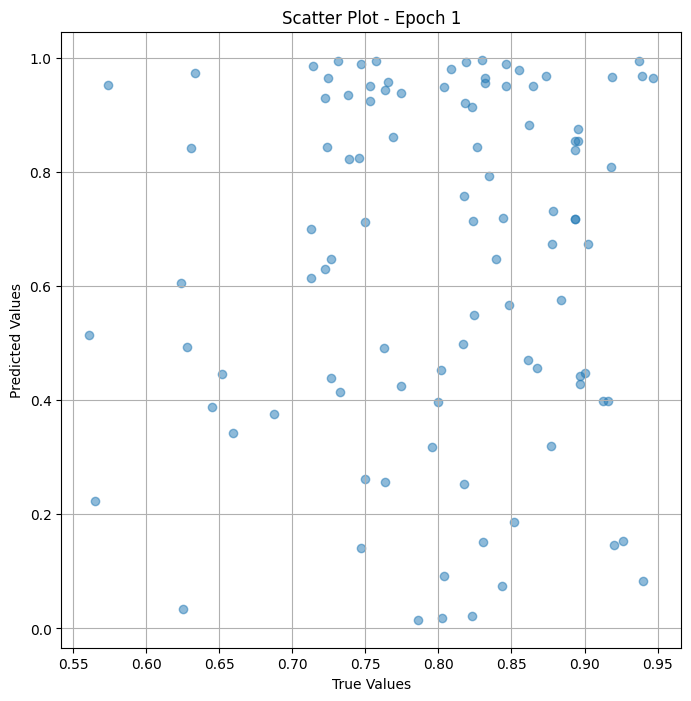


 Epoch: (2/50) Loss = 0.04305689036846161

 Epoch: (2/50) Loss_rmse = 0.20750154554843903

 Epoch: (2/50) R^2 = -4.747695446014404

 Epoch: (2/50) MAE = 0.162967249751091

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.8433735, 0.9186992, 0.94, 0.8484849, 0.8969072, 0.8969072, 0.78571427, 0.56122446, 0.625, 0.87826085, 0.9, 0.7570093, 0.7628866, 0.9263158, 0.76344085, 0.8348624, 0.89361703, 0.65957445, 0.8172043, 0.82417583, 0.8165138, 0.71428573, 0.8021978, 0.8956522, 0.92, 0.6875, 0.89361703, 0.7380952, 0.85148513, 0.8933333, 0.7222222, 0.9126214, 0.6304348, 0.82653064, 0.91818184, 0.83, 0.5652174, 0.8037383, 0.9026549, 0.72380954, 0.82300884, 0.74561405, 0.712963, 0.7746479, 0.7529412, 0.8181818, 0.8736842, 0.82300884, 0.84444445, 0.94690263, 0.62376237, 0.7263158, 0.76363635, 0.7532467, 0.8301887, 0.6448598, 0.8235294, 0.8020833, 0.7741935, 0.7326733, 0.85542166, 0.9157895, 0.9369369, 0.8952381, 0.83168316, 0.7241379, 0.84615386, 0.861386


 Epoch: (3/50) Loss = 0.05215997248888016

 Epoch: (3/50) Loss_rmse = 0.2283855825662613

 Epoch: (3/50) R^2 = -5.962872505187988

 Epoch: (3/50) MAE = 0.20335067808628082

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.8433735, 0.9186992, 0.94, 0.8484849, 0.8969072, 0.8969072, 0.78571427, 0.56122446, 0.625, 0.87826085, 0.9, 0.7570093, 0.7628866, 0.9263158, 0.76344085, 0.8348624, 0.89361703, 0.65957445, 0.8172043, 0.82417583, 0.8165138, 0.71428573, 0.8021978, 0.8956522, 0.92, 0.6875, 0.89361703, 0.7380952, 0.85148513, 0.8933333, 0.7222222, 0.9126214, 0.6304348, 0.82653064, 0.91818184, 0.83, 0.5652174, 0.8037383, 0.9026549, 0.72380954, 0.82300884, 0.74561405, 0.712963, 0.7746479, 0.7529412, 0.8181818, 0.8736842, 0.82300884, 0.84444445, 0.94690263, 0.62376237, 0.7263158, 0.76363635, 0.7532467, 0.8301887, 0.6448598, 0.8235294, 0.8020833, 0.7741935, 0.7326733, 0.85542166, 0.9157895, 0.9369369, 0.8952381, 0.83168316, 0.7241379, 0.84615386, 0.86138


 Epoch: (4/50) Loss = 0.05580712854862213

 Epoch: (4/50) Loss_rmse = 0.23623532056808472

 Epoch: (4/50) R^2 = -6.449733734130859

 Epoch: (4/50) MAE = 0.21596546471118927

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.8433735, 0.9186992, 0.94, 0.8484849, 0.8969072, 0.8969072, 0.78571427, 0.56122446, 0.625, 0.87826085, 0.9, 0.7570093, 0.7628866, 0.9263158, 0.76344085, 0.8348624, 0.89361703, 0.65957445, 0.8172043, 0.82417583, 0.8165138, 0.71428573, 0.8021978, 0.8956522, 0.92, 0.6875, 0.89361703, 0.7380952, 0.85148513, 0.8933333, 0.7222222, 0.9126214, 0.6304348, 0.82653064, 0.91818184, 0.83, 0.5652174, 0.8037383, 0.9026549, 0.72380954, 0.82300884, 0.74561405, 0.712963, 0.7746479, 0.7529412, 0.8181818, 0.8736842, 0.82300884, 0.84444445, 0.94690263, 0.62376237, 0.7263158, 0.76363635, 0.7532467, 0.8301887, 0.6448598, 0.8235294, 0.8020833, 0.7741935, 0.7326733, 0.85542166, 0.9157895, 0.9369369, 0.8952381, 0.83168316, 0.7241379, 0.84615386, 0.8613

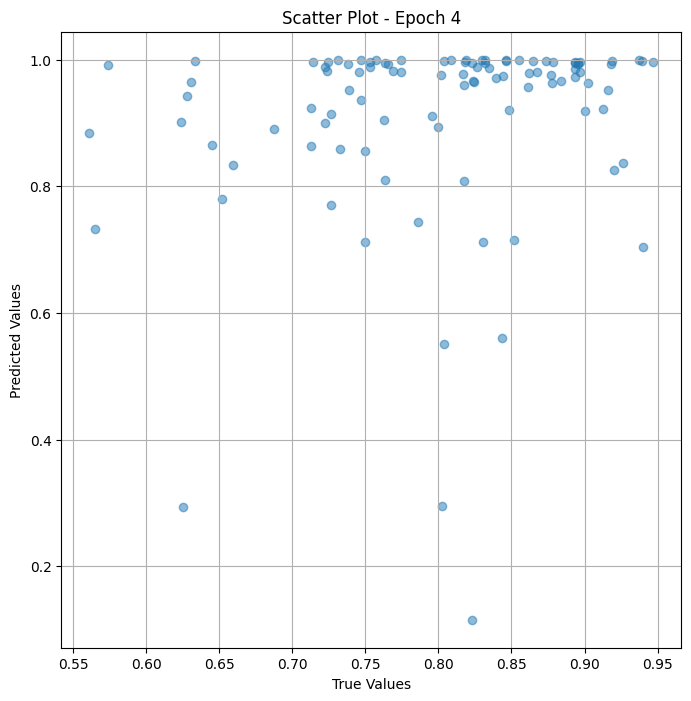


 Epoch: (5/50) Loss = 0.05380663275718689

 Epoch: (5/50) Loss_rmse = 0.23196256160736084

 Epoch: (5/50) R^2 = -6.1826863288879395

 Epoch: (5/50) MAE = 0.21137635409832

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.8433735, 0.9186992, 0.94, 0.8484849, 0.8969072, 0.8969072, 0.78571427, 0.56122446, 0.625, 0.87826085, 0.9, 0.7570093, 0.7628866, 0.9263158, 0.76344085, 0.8348624, 0.89361703, 0.65957445, 0.8172043, 0.82417583, 0.8165138, 0.71428573, 0.8021978, 0.8956522, 0.92, 0.6875, 0.89361703, 0.7380952, 0.85148513, 0.8933333, 0.7222222, 0.9126214, 0.6304348, 0.82653064, 0.91818184, 0.83, 0.5652174, 0.8037383, 0.9026549, 0.72380954, 0.82300884, 0.74561405, 0.712963, 0.7746479, 0.7529412, 0.8181818, 0.8736842, 0.82300884, 0.84444445, 0.94690263, 0.62376237, 0.7263158, 0.76363635, 0.7532467, 0.8301887, 0.6448598, 0.8235294, 0.8020833, 0.7741935, 0.7326733, 0.85542166, 0.9157895, 0.9369369, 0.8952381, 0.83168316, 0.7241379, 0.84615386, 0.861386

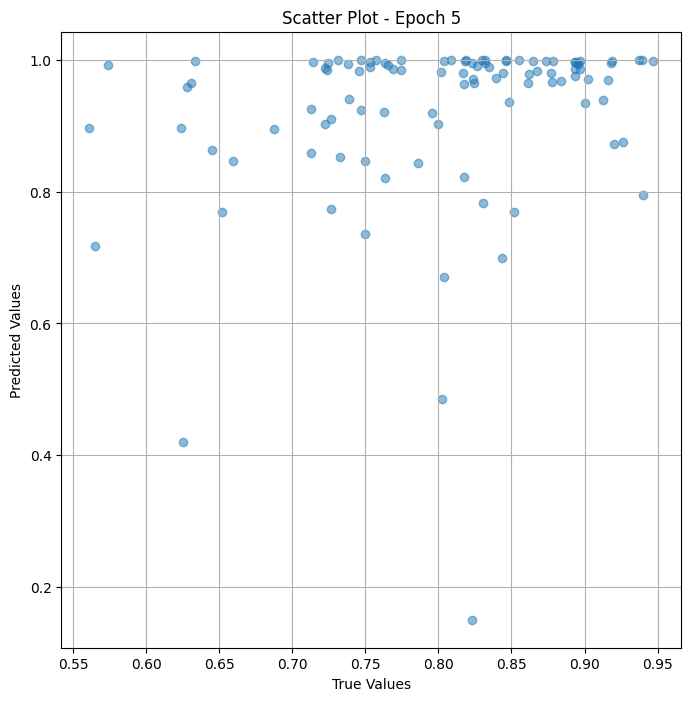


 Epoch: (6/50) Loss = 0.0473291277885437

 Epoch: (6/50) Loss_rmse = 0.21755258738994598

 Epoch: (6/50) R^2 = -5.317999362945557

 Epoch: (6/50) MAE = 0.19185972213745117

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.8433735, 0.9186992, 0.94, 0.8484849, 0.8969072, 0.8969072, 0.78571427, 0.56122446, 0.625, 0.87826085, 0.9, 0.7570093, 0.7628866, 0.9263158, 0.76344085, 0.8348624, 0.89361703, 0.65957445, 0.8172043, 0.82417583, 0.8165138, 0.71428573, 0.8021978, 0.8956522, 0.92, 0.6875, 0.89361703, 0.7380952, 0.85148513, 0.8933333, 0.7222222, 0.9126214, 0.6304348, 0.82653064, 0.91818184, 0.83, 0.5652174, 0.8037383, 0.9026549, 0.72380954, 0.82300884, 0.74561405, 0.712963, 0.7746479, 0.7529412, 0.8181818, 0.8736842, 0.82300884, 0.84444445, 0.94690263, 0.62376237, 0.7263158, 0.76363635, 0.7532467, 0.8301887, 0.6448598, 0.8235294, 0.8020833, 0.7741935, 0.7326733, 0.85542166, 0.9157895, 0.9369369, 0.8952381, 0.83168316, 0.7241379, 0.84615386, 0.86138


 Epoch: (7/50) Loss = 0.03852644935250282

 Epoch: (7/50) Loss_rmse = 0.1962815523147583

 Epoch: (7/50) R^2 = -4.142923355102539

 Epoch: (7/50) MAE = 0.145858496427536

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.8433735, 0.9186992, 0.94, 0.8484849, 0.8969072, 0.8969072, 0.78571427, 0.56122446, 0.625, 0.87826085, 0.9, 0.7570093, 0.7628866, 0.9263158, 0.76344085, 0.8348624, 0.89361703, 0.65957445, 0.8172043, 0.82417583, 0.8165138, 0.71428573, 0.8021978, 0.8956522, 0.92, 0.6875, 0.89361703, 0.7380952, 0.85148513, 0.8933333, 0.7222222, 0.9126214, 0.6304348, 0.82653064, 0.91818184, 0.83, 0.5652174, 0.8037383, 0.9026549, 0.72380954, 0.82300884, 0.74561405, 0.712963, 0.7746479, 0.7529412, 0.8181818, 0.8736842, 0.82300884, 0.84444445, 0.94690263, 0.62376237, 0.7263158, 0.76363635, 0.7532467, 0.8301887, 0.6448598, 0.8235294, 0.8020833, 0.7741935, 0.7326733, 0.85542166, 0.9157895, 0.9369369, 0.8952381, 0.83168316, 0.7241379, 0.84615386, 0.8613861


 Epoch: (8/50) Loss = 0.03860695660114288

 Epoch: (8/50) Loss_rmse = 0.19648653268814087

 Epoch: (8/50) R^2 = -4.153670310974121

 Epoch: (8/50) MAE = 0.1441078782081604

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.8433735, 0.9186992, 0.94, 0.8484849, 0.8969072, 0.8969072, 0.78571427, 0.56122446, 0.625, 0.87826085, 0.9, 0.7570093, 0.7628866, 0.9263158, 0.76344085, 0.8348624, 0.89361703, 0.65957445, 0.8172043, 0.82417583, 0.8165138, 0.71428573, 0.8021978, 0.8956522, 0.92, 0.6875, 0.89361703, 0.7380952, 0.85148513, 0.8933333, 0.7222222, 0.9126214, 0.6304348, 0.82653064, 0.91818184, 0.83, 0.5652174, 0.8037383, 0.9026549, 0.72380954, 0.82300884, 0.74561405, 0.712963, 0.7746479, 0.7529412, 0.8181818, 0.8736842, 0.82300884, 0.84444445, 0.94690263, 0.62376237, 0.7263158, 0.76363635, 0.7532467, 0.8301887, 0.6448598, 0.8235294, 0.8020833, 0.7741935, 0.7326733, 0.85542166, 0.9157895, 0.9369369, 0.8952381, 0.83168316, 0.7241379, 0.84615386, 0.86138


 Epoch: (9/50) Loss = 0.03610524162650108

 Epoch: (9/50) Loss_rmse = 0.1900137960910797

 Epoch: (9/50) R^2 = -3.8197145462036133

 Epoch: (9/50) MAE = 0.1366051435470581

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.8433735, 0.9186992, 0.94, 0.8484849, 0.8969072, 0.8969072, 0.78571427, 0.56122446, 0.625, 0.87826085, 0.9, 0.7570093, 0.7628866, 0.9263158, 0.76344085, 0.8348624, 0.89361703, 0.65957445, 0.8172043, 0.82417583, 0.8165138, 0.71428573, 0.8021978, 0.8956522, 0.92, 0.6875, 0.89361703, 0.7380952, 0.85148513, 0.8933333, 0.7222222, 0.9126214, 0.6304348, 0.82653064, 0.91818184, 0.83, 0.5652174, 0.8037383, 0.9026549, 0.72380954, 0.82300884, 0.74561405, 0.712963, 0.7746479, 0.7529412, 0.8181818, 0.8736842, 0.82300884, 0.84444445, 0.94690263, 0.62376237, 0.7263158, 0.76363635, 0.7532467, 0.8301887, 0.6448598, 0.8235294, 0.8020833, 0.7741935, 0.7326733, 0.85542166, 0.9157895, 0.9369369, 0.8952381, 0.83168316, 0.7241379, 0.84615386, 0.86138

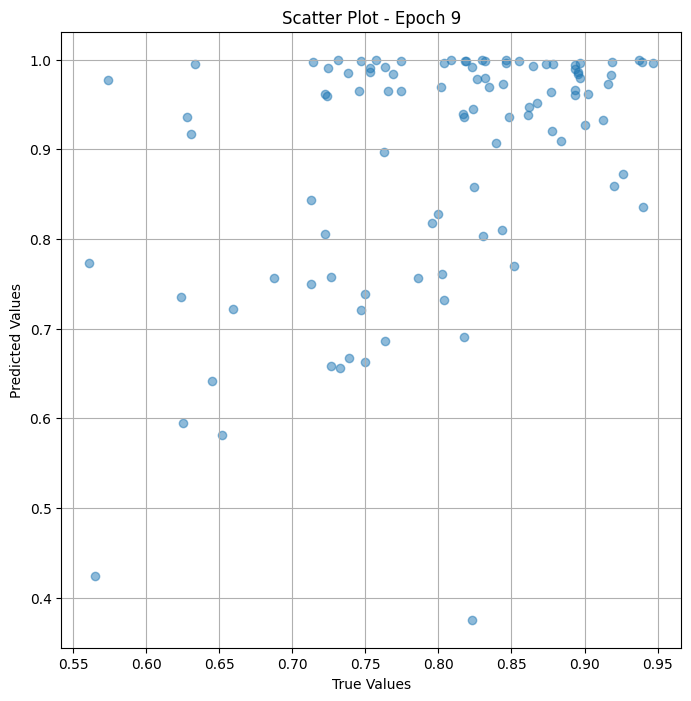


 Epoch: (10/50) Loss = 0.03531019017100334

 Epoch: (10/50) Loss_rmse = 0.1879100650548935

 Epoch: (10/50) R^2 = -3.7135825157165527

 Epoch: (10/50) MAE = 0.13282142579555511

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.8433735, 0.9186992, 0.94, 0.8484849, 0.8969072, 0.8969072, 0.78571427, 0.56122446, 0.625, 0.87826085, 0.9, 0.7570093, 0.7628866, 0.9263158, 0.76344085, 0.8348624, 0.89361703, 0.65957445, 0.8172043, 0.82417583, 0.8165138, 0.71428573, 0.8021978, 0.8956522, 0.92, 0.6875, 0.89361703, 0.7380952, 0.85148513, 0.8933333, 0.7222222, 0.9126214, 0.6304348, 0.82653064, 0.91818184, 0.83, 0.5652174, 0.8037383, 0.9026549, 0.72380954, 0.82300884, 0.74561405, 0.712963, 0.7746479, 0.7529412, 0.8181818, 0.8736842, 0.82300884, 0.84444445, 0.94690263, 0.62376237, 0.7263158, 0.76363635, 0.7532467, 0.8301887, 0.6448598, 0.8235294, 0.8020833, 0.7741935, 0.7326733, 0.85542166, 0.9157895, 0.9369369, 0.8952381, 0.83168316, 0.7241379, 0.84615386, 0.

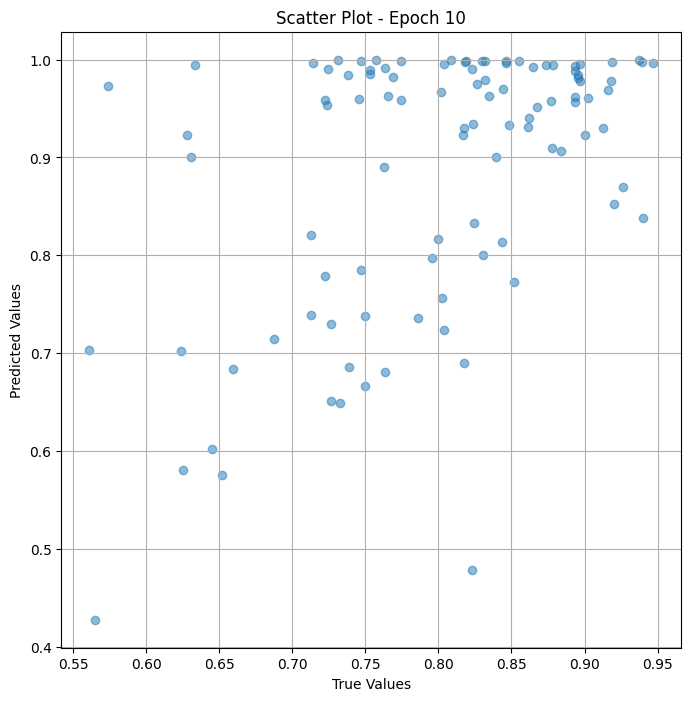


 Epoch: (11/50) Loss = 0.03402014821767807

 Epoch: (11/50) Loss_rmse = 0.18444551527500153

 Epoch: (11/50) R^2 = -3.5413742065429688

 Epoch: (11/50) MAE = 0.11702369153499603

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.8433735, 0.9186992, 0.94, 0.8484849, 0.8969072, 0.8969072, 0.78571427, 0.56122446, 0.625, 0.87826085, 0.9, 0.7570093, 0.7628866, 0.9263158, 0.76344085, 0.8348624, 0.89361703, 0.65957445, 0.8172043, 0.82417583, 0.8165138, 0.71428573, 0.8021978, 0.8956522, 0.92, 0.6875, 0.89361703, 0.7380952, 0.85148513, 0.8933333, 0.7222222, 0.9126214, 0.6304348, 0.82653064, 0.91818184, 0.83, 0.5652174, 0.8037383, 0.9026549, 0.72380954, 0.82300884, 0.74561405, 0.712963, 0.7746479, 0.7529412, 0.8181818, 0.8736842, 0.82300884, 0.84444445, 0.94690263, 0.62376237, 0.7263158, 0.76363635, 0.7532467, 0.8301887, 0.6448598, 0.8235294, 0.8020833, 0.7741935, 0.7326733, 0.85542166, 0.9157895, 0.9369369, 0.8952381, 0.83168316, 0.7241379, 0.84615386, 0


 Epoch: (12/50) Loss = 0.033469680696725845

 Epoch: (12/50) Loss_rmse = 0.18294720351696014

 Epoch: (12/50) R^2 = -3.4678916931152344

 Epoch: (12/50) MAE = 0.11169290542602539

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.8433735, 0.9186992, 0.94, 0.8484849, 0.8969072, 0.8969072, 0.78571427, 0.56122446, 0.625, 0.87826085, 0.9, 0.7570093, 0.7628866, 0.9263158, 0.76344085, 0.8348624, 0.89361703, 0.65957445, 0.8172043, 0.82417583, 0.8165138, 0.71428573, 0.8021978, 0.8956522, 0.92, 0.6875, 0.89361703, 0.7380952, 0.85148513, 0.8933333, 0.7222222, 0.9126214, 0.6304348, 0.82653064, 0.91818184, 0.83, 0.5652174, 0.8037383, 0.9026549, 0.72380954, 0.82300884, 0.74561405, 0.712963, 0.7746479, 0.7529412, 0.8181818, 0.8736842, 0.82300884, 0.84444445, 0.94690263, 0.62376237, 0.7263158, 0.76363635, 0.7532467, 0.8301887, 0.6448598, 0.8235294, 0.8020833, 0.7741935, 0.7326733, 0.85542166, 0.9157895, 0.9369369, 0.8952381, 0.83168316, 0.7241379, 0.84615386, 

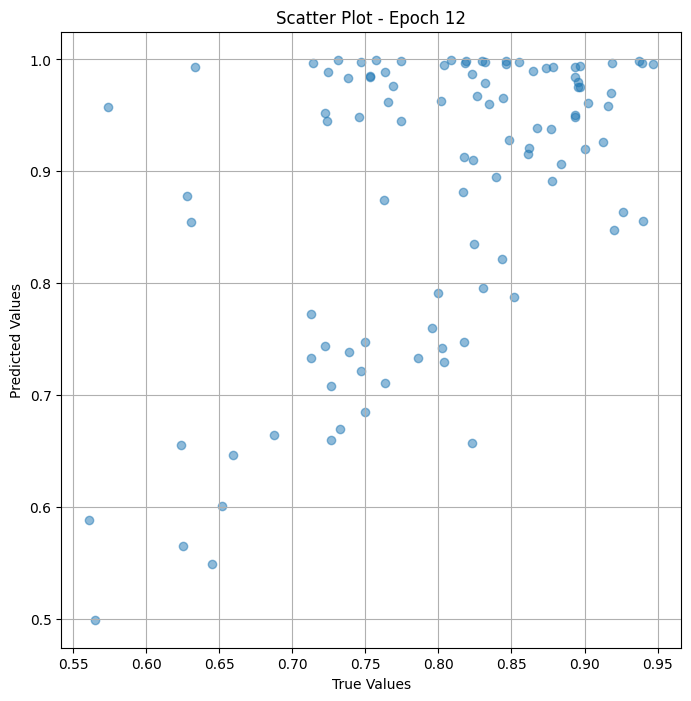


 Epoch: (13/50) Loss = 0.032968685030937195

 Epoch: (13/50) Loss_rmse = 0.1815728098154068

 Epoch: (13/50) R^2 = -3.4010133743286133

 Epoch: (13/50) MAE = 0.11129334568977356

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.8433735, 0.9186992, 0.94, 0.8484849, 0.8969072, 0.8969072, 0.78571427, 0.56122446, 0.625, 0.87826085, 0.9, 0.7570093, 0.7628866, 0.9263158, 0.76344085, 0.8348624, 0.89361703, 0.65957445, 0.8172043, 0.82417583, 0.8165138, 0.71428573, 0.8021978, 0.8956522, 0.92, 0.6875, 0.89361703, 0.7380952, 0.85148513, 0.8933333, 0.7222222, 0.9126214, 0.6304348, 0.82653064, 0.91818184, 0.83, 0.5652174, 0.8037383, 0.9026549, 0.72380954, 0.82300884, 0.74561405, 0.712963, 0.7746479, 0.7529412, 0.8181818, 0.8736842, 0.82300884, 0.84444445, 0.94690263, 0.62376237, 0.7263158, 0.76363635, 0.7532467, 0.8301887, 0.6448598, 0.8235294, 0.8020833, 0.7741935, 0.7326733, 0.85542166, 0.9157895, 0.9369369, 0.8952381, 0.83168316, 0.7241379, 0.84615386, 0

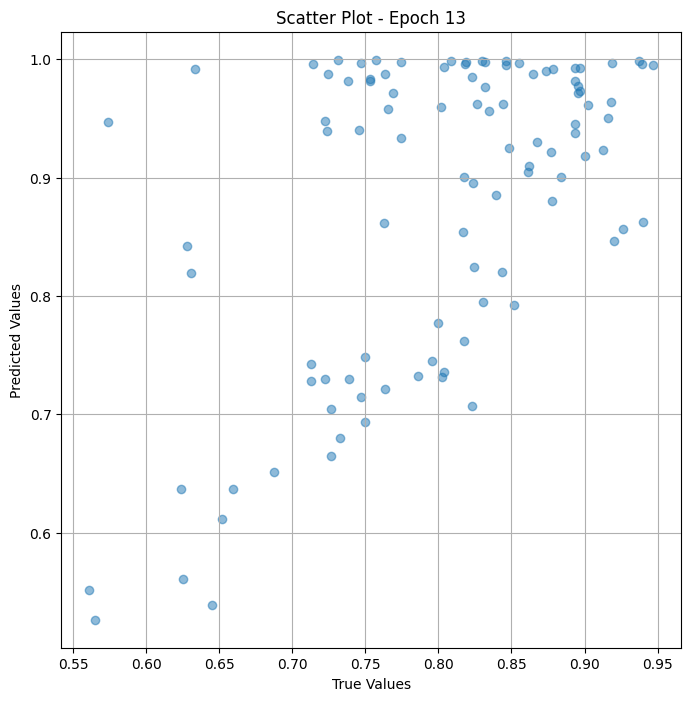


 Epoch: (14/50) Loss = 0.032172489911317825

 Epoch: (14/50) Loss_rmse = 0.17936691641807556

 Epoch: (14/50) R^2 = -3.2947287559509277

 Epoch: (14/50) MAE = 0.10163561999797821

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.8433735, 0.9186992, 0.94, 0.8484849, 0.8969072, 0.8969072, 0.78571427, 0.56122446, 0.625, 0.87826085, 0.9, 0.7570093, 0.7628866, 0.9263158, 0.76344085, 0.8348624, 0.89361703, 0.65957445, 0.8172043, 0.82417583, 0.8165138, 0.71428573, 0.8021978, 0.8956522, 0.92, 0.6875, 0.89361703, 0.7380952, 0.85148513, 0.8933333, 0.7222222, 0.9126214, 0.6304348, 0.82653064, 0.91818184, 0.83, 0.5652174, 0.8037383, 0.9026549, 0.72380954, 0.82300884, 0.74561405, 0.712963, 0.7746479, 0.7529412, 0.8181818, 0.8736842, 0.82300884, 0.84444445, 0.94690263, 0.62376237, 0.7263158, 0.76363635, 0.7532467, 0.8301887, 0.6448598, 0.8235294, 0.8020833, 0.7741935, 0.7326733, 0.85542166, 0.9157895, 0.9369369, 0.8952381, 0.83168316, 0.7241379, 0.84615386, 

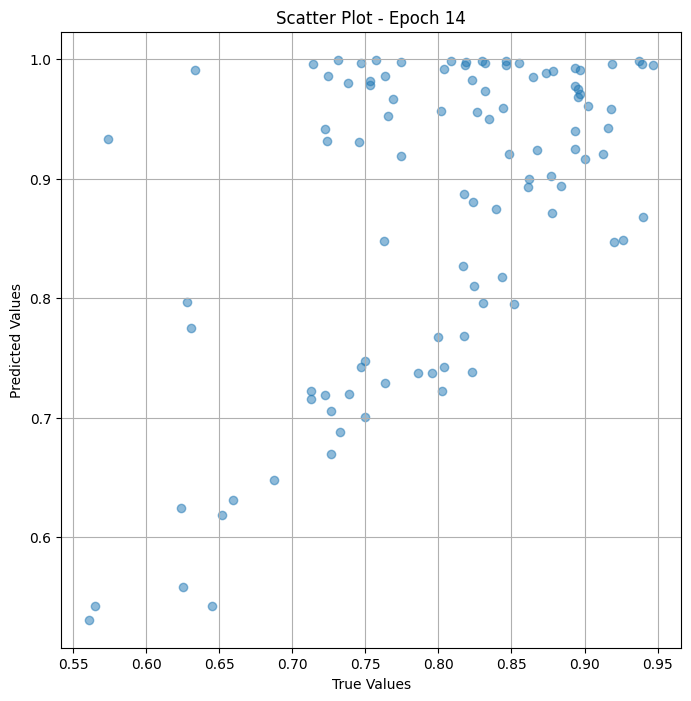


 Epoch: (15/50) Loss = 0.031709641218185425

 Epoch: (15/50) Loss_rmse = 0.1780720055103302

 Epoch: (15/50) R^2 = -3.232943058013916

 Epoch: (15/50) MAE = 0.09508724510669708

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.8433735, 0.9186992, 0.94, 0.8484849, 0.8969072, 0.8969072, 0.78571427, 0.56122446, 0.625, 0.87826085, 0.9, 0.7570093, 0.7628866, 0.9263158, 0.76344085, 0.8348624, 0.89361703, 0.65957445, 0.8172043, 0.82417583, 0.8165138, 0.71428573, 0.8021978, 0.8956522, 0.92, 0.6875, 0.89361703, 0.7380952, 0.85148513, 0.8933333, 0.7222222, 0.9126214, 0.6304348, 0.82653064, 0.91818184, 0.83, 0.5652174, 0.8037383, 0.9026549, 0.72380954, 0.82300884, 0.74561405, 0.712963, 0.7746479, 0.7529412, 0.8181818, 0.8736842, 0.82300884, 0.84444445, 0.94690263, 0.62376237, 0.7263158, 0.76363635, 0.7532467, 0.8301887, 0.6448598, 0.8235294, 0.8020833, 0.7741935, 0.7326733, 0.85542166, 0.9157895, 0.9369369, 0.8952381, 0.83168316, 0.7241379, 0.84615386, 0.

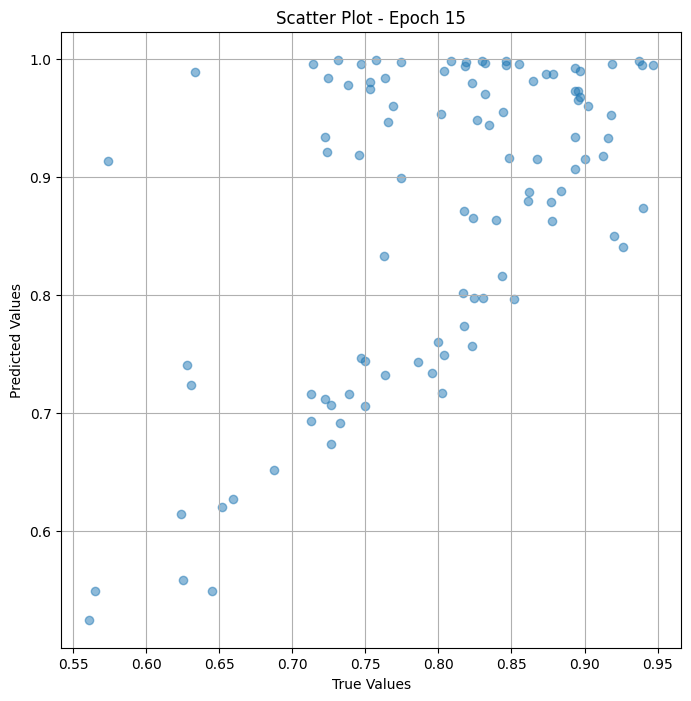


 Epoch: (16/50) Loss = 0.03132079541683197

 Epoch: (16/50) Loss_rmse = 0.17697681486606598

 Epoch: (16/50) R^2 = -3.1810355186462402

 Epoch: (16/50) MAE = 0.09974558651447296

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.8433735, 0.9186992, 0.94, 0.8484849, 0.8969072, 0.8969072, 0.78571427, 0.56122446, 0.625, 0.87826085, 0.9, 0.7570093, 0.7628866, 0.9263158, 0.76344085, 0.8348624, 0.89361703, 0.65957445, 0.8172043, 0.82417583, 0.8165138, 0.71428573, 0.8021978, 0.8956522, 0.92, 0.6875, 0.89361703, 0.7380952, 0.85148513, 0.8933333, 0.7222222, 0.9126214, 0.6304348, 0.82653064, 0.91818184, 0.83, 0.5652174, 0.8037383, 0.9026549, 0.72380954, 0.82300884, 0.74561405, 0.712963, 0.7746479, 0.7529412, 0.8181818, 0.8736842, 0.82300884, 0.84444445, 0.94690263, 0.62376237, 0.7263158, 0.76363635, 0.7532467, 0.8301887, 0.6448598, 0.8235294, 0.8020833, 0.7741935, 0.7326733, 0.85542166, 0.9157895, 0.9369369, 0.8952381, 0.83168316, 0.7241379, 0.84615386, 0

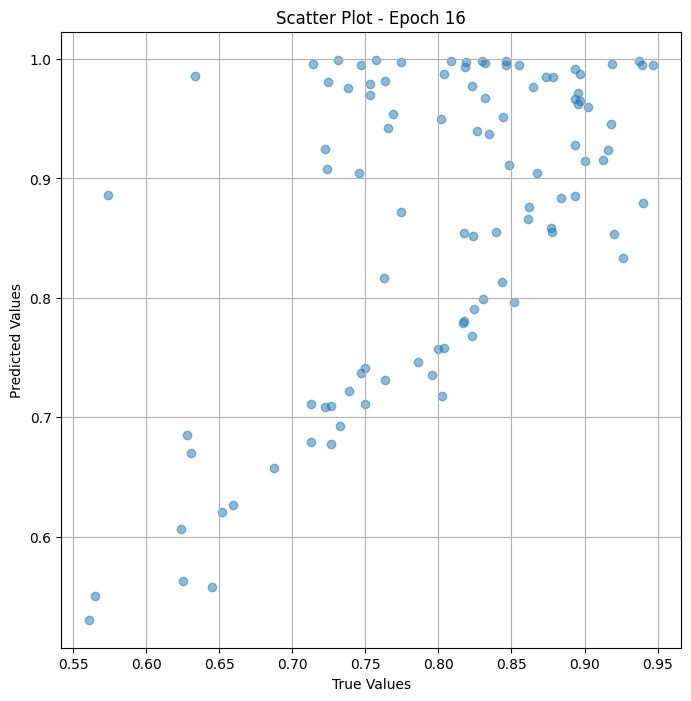


 Epoch: (17/50) Loss = 0.030829183757305145

 Epoch: (17/50) Loss_rmse = 0.1755824089050293

 Epoch: (17/50) R^2 = -3.1154098510742188

 Epoch: (17/50) MAE = 0.10019545257091522

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.8433735, 0.9186992, 0.94, 0.8484849, 0.8969072, 0.8969072, 0.78571427, 0.56122446, 0.625, 0.87826085, 0.9, 0.7570093, 0.7628866, 0.9263158, 0.76344085, 0.8348624, 0.89361703, 0.65957445, 0.8172043, 0.82417583, 0.8165138, 0.71428573, 0.8021978, 0.8956522, 0.92, 0.6875, 0.89361703, 0.7380952, 0.85148513, 0.8933333, 0.7222222, 0.9126214, 0.6304348, 0.82653064, 0.91818184, 0.83, 0.5652174, 0.8037383, 0.9026549, 0.72380954, 0.82300884, 0.74561405, 0.712963, 0.7746479, 0.7529412, 0.8181818, 0.8736842, 0.82300884, 0.84444445, 0.94690263, 0.62376237, 0.7263158, 0.76363635, 0.7532467, 0.8301887, 0.6448598, 0.8235294, 0.8020833, 0.7741935, 0.7326733, 0.85542166, 0.9157895, 0.9369369, 0.8952381, 0.83168316, 0.7241379, 0.84615386, 0

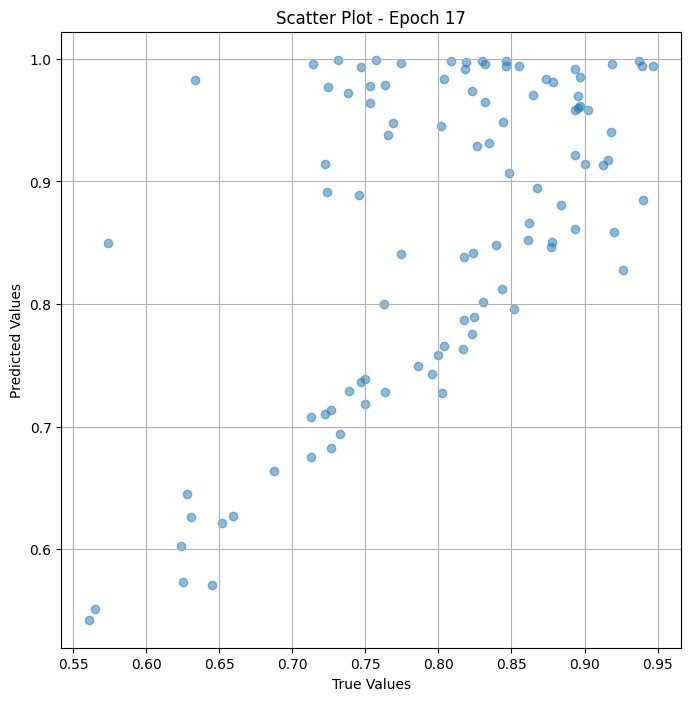


 Epoch: (18/50) Loss = 0.029960591346025467

 Epoch: (18/50) Loss_rmse = 0.17309127748012543

 Epoch: (18/50) R^2 = -2.9994609355926514

 Epoch: (18/50) MAE = 0.09796978533267975

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.8433735, 0.9186992, 0.94, 0.8484849, 0.8969072, 0.8969072, 0.78571427, 0.56122446, 0.625, 0.87826085, 0.9, 0.7570093, 0.7628866, 0.9263158, 0.76344085, 0.8348624, 0.89361703, 0.65957445, 0.8172043, 0.82417583, 0.8165138, 0.71428573, 0.8021978, 0.8956522, 0.92, 0.6875, 0.89361703, 0.7380952, 0.85148513, 0.8933333, 0.7222222, 0.9126214, 0.6304348, 0.82653064, 0.91818184, 0.83, 0.5652174, 0.8037383, 0.9026549, 0.72380954, 0.82300884, 0.74561405, 0.712963, 0.7746479, 0.7529412, 0.8181818, 0.8736842, 0.82300884, 0.84444445, 0.94690263, 0.62376237, 0.7263158, 0.76363635, 0.7532467, 0.8301887, 0.6448598, 0.8235294, 0.8020833, 0.7741935, 0.7326733, 0.85542166, 0.9157895, 0.9369369, 0.8952381, 0.83168316, 0.7241379, 0.84615386, 

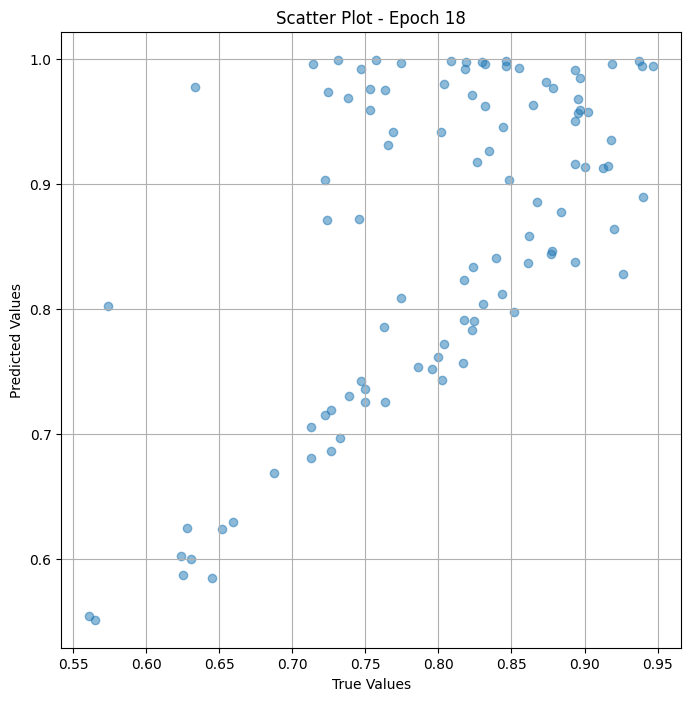


 Epoch: (19/50) Loss = 0.028475390747189522

 Epoch: (19/50) Loss_rmse = 0.16874653100967407

 Epoch: (19/50) R^2 = -2.8012003898620605

 Epoch: (19/50) MAE = 0.09623180329799652

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.8433735, 0.9186992, 0.94, 0.8484849, 0.8969072, 0.8969072, 0.78571427, 0.56122446, 0.625, 0.87826085, 0.9, 0.7570093, 0.7628866, 0.9263158, 0.76344085, 0.8348624, 0.89361703, 0.65957445, 0.8172043, 0.82417583, 0.8165138, 0.71428573, 0.8021978, 0.8956522, 0.92, 0.6875, 0.89361703, 0.7380952, 0.85148513, 0.8933333, 0.7222222, 0.9126214, 0.6304348, 0.82653064, 0.91818184, 0.83, 0.5652174, 0.8037383, 0.9026549, 0.72380954, 0.82300884, 0.74561405, 0.712963, 0.7746479, 0.7529412, 0.8181818, 0.8736842, 0.82300884, 0.84444445, 0.94690263, 0.62376237, 0.7263158, 0.76363635, 0.7532467, 0.8301887, 0.6448598, 0.8235294, 0.8020833, 0.7741935, 0.7326733, 0.85542166, 0.9157895, 0.9369369, 0.8952381, 0.83168316, 0.7241379, 0.84615386, 

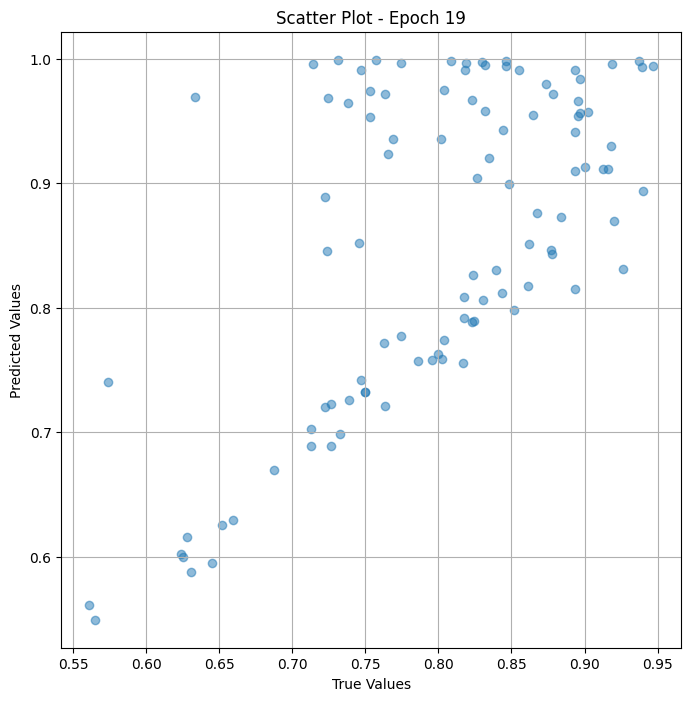


 Epoch: (20/50) Loss = 0.025834539905190468

 Epoch: (20/50) Loss_rmse = 0.1607312709093094

 Epoch: (20/50) R^2 = -2.448671340942383

 Epoch: (20/50) MAE = 0.09216484427452087

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.8433735, 0.9186992, 0.94, 0.8484849, 0.8969072, 0.8969072, 0.78571427, 0.56122446, 0.625, 0.87826085, 0.9, 0.7570093, 0.7628866, 0.9263158, 0.76344085, 0.8348624, 0.89361703, 0.65957445, 0.8172043, 0.82417583, 0.8165138, 0.71428573, 0.8021978, 0.8956522, 0.92, 0.6875, 0.89361703, 0.7380952, 0.85148513, 0.8933333, 0.7222222, 0.9126214, 0.6304348, 0.82653064, 0.91818184, 0.83, 0.5652174, 0.8037383, 0.9026549, 0.72380954, 0.82300884, 0.74561405, 0.712963, 0.7746479, 0.7529412, 0.8181818, 0.8736842, 0.82300884, 0.84444445, 0.94690263, 0.62376237, 0.7263158, 0.76363635, 0.7532467, 0.8301887, 0.6448598, 0.8235294, 0.8020833, 0.7741935, 0.7326733, 0.85542166, 0.9157895, 0.9369369, 0.8952381, 0.83168316, 0.7241379, 0.84615386, 0.


 Epoch: (21/50) Loss = 0.020719850435853004

 Epoch: (21/50) Loss_rmse = 0.1439439207315445

 Epoch: (21/50) R^2 = -1.7659077644348145

 Epoch: (21/50) MAE = 0.08292809128761292

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.8433735, 0.9186992, 0.94, 0.8484849, 0.8969072, 0.8969072, 0.78571427, 0.56122446, 0.625, 0.87826085, 0.9, 0.7570093, 0.7628866, 0.9263158, 0.76344085, 0.8348624, 0.89361703, 0.65957445, 0.8172043, 0.82417583, 0.8165138, 0.71428573, 0.8021978, 0.8956522, 0.92, 0.6875, 0.89361703, 0.7380952, 0.85148513, 0.8933333, 0.7222222, 0.9126214, 0.6304348, 0.82653064, 0.91818184, 0.83, 0.5652174, 0.8037383, 0.9026549, 0.72380954, 0.82300884, 0.74561405, 0.712963, 0.7746479, 0.7529412, 0.8181818, 0.8736842, 0.82300884, 0.84444445, 0.94690263, 0.62376237, 0.7263158, 0.76363635, 0.7532467, 0.8301887, 0.6448598, 0.8235294, 0.8020833, 0.7741935, 0.7326733, 0.85542166, 0.9157895, 0.9369369, 0.8952381, 0.83168316, 0.7241379, 0.84615386, 0

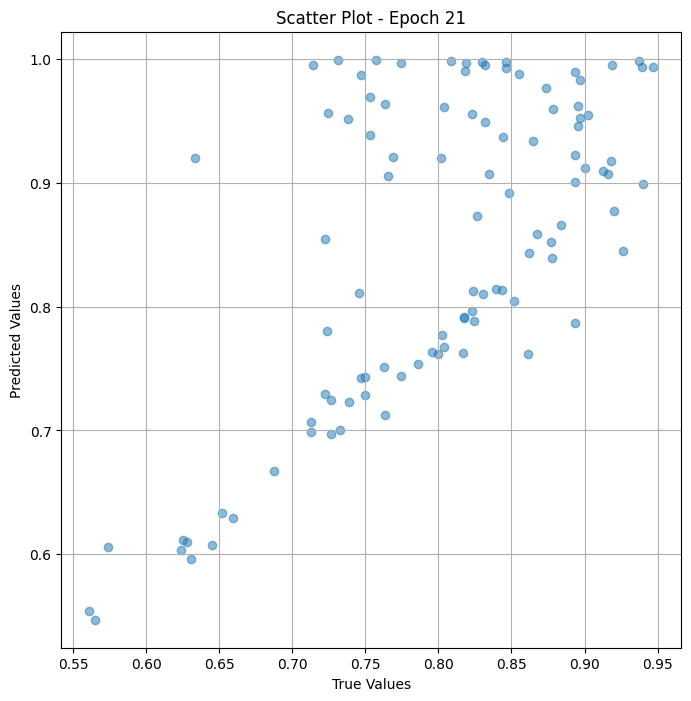


 Epoch: (22/50) Loss = 0.010491792112588882

 Epoch: (22/50) Loss_rmse = 0.10242944955825806

 Epoch: (22/50) R^2 = -0.40055692195892334

 Epoch: (22/50) MAE = 0.06322303414344788

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.8433735, 0.9186992, 0.94, 0.8484849, 0.8969072, 0.8969072, 0.78571427, 0.56122446, 0.625, 0.87826085, 0.9, 0.7570093, 0.7628866, 0.9263158, 0.76344085, 0.8348624, 0.89361703, 0.65957445, 0.8172043, 0.82417583, 0.8165138, 0.71428573, 0.8021978, 0.8956522, 0.92, 0.6875, 0.89361703, 0.7380952, 0.85148513, 0.8933333, 0.7222222, 0.9126214, 0.6304348, 0.82653064, 0.91818184, 0.83, 0.5652174, 0.8037383, 0.9026549, 0.72380954, 0.82300884, 0.74561405, 0.712963, 0.7746479, 0.7529412, 0.8181818, 0.8736842, 0.82300884, 0.84444445, 0.94690263, 0.62376237, 0.7263158, 0.76363635, 0.7532467, 0.8301887, 0.6448598, 0.8235294, 0.8020833, 0.7741935, 0.7326733, 0.85542166, 0.9157895, 0.9369369, 0.8952381, 0.83168316, 0.7241379, 0.84615386,

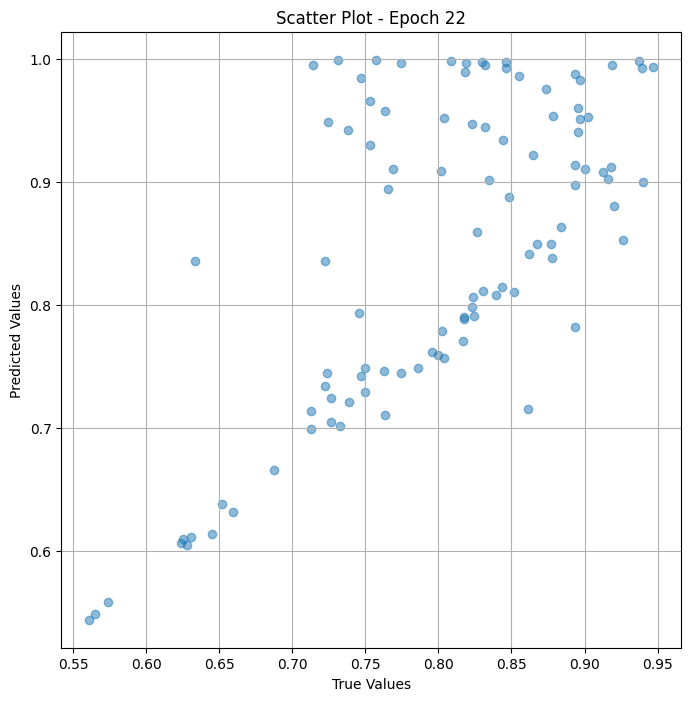


 Epoch: (23/50) Loss = 0.000387609499739483

 Epoch: (23/50) Loss_rmse = 0.019687801599502563

 Epoch: (23/50) R^2 = 0.9482577443122864

 Epoch: (23/50) MAE = 0.01641155779361725

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.8433735, 0.9186992, 0.94, 0.8484849, 0.8969072, 0.8969072, 0.78571427, 0.56122446, 0.625, 0.87826085, 0.9, 0.7570093, 0.7628866, 0.9263158, 0.76344085, 0.8348624, 0.89361703, 0.65957445, 0.8172043, 0.82417583, 0.8165138, 0.71428573, 0.8021978, 0.8956522, 0.92, 0.6875, 0.89361703, 0.7380952, 0.85148513, 0.8933333, 0.7222222, 0.9126214, 0.6304348, 0.82653064, 0.91818184, 0.83, 0.5652174, 0.8037383, 0.9026549, 0.72380954, 0.82300884, 0.74561405, 0.712963, 0.7746479, 0.7529412, 0.8181818, 0.8736842, 0.82300884, 0.84444445, 0.94690263, 0.62376237, 0.7263158, 0.76363635, 0.7532467, 0.8301887, 0.6448598, 0.8235294, 0.8020833, 0.7741935, 0.7326733, 0.85542166, 0.9157895, 0.9369369, 0.8952381, 0.83168316, 0.7241379, 0.84615386, 

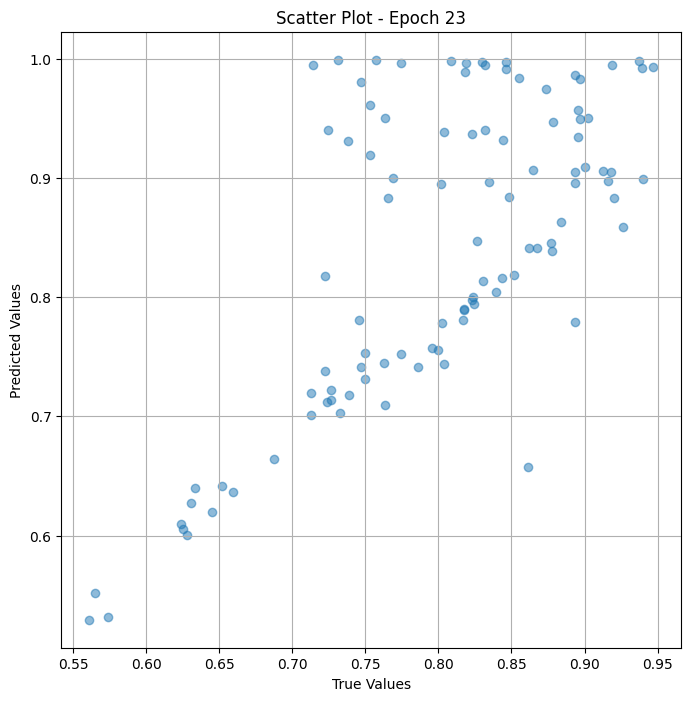


 Epoch: (24/50) Loss = 0.0011511500924825668

 Epoch: (24/50) Loss_rmse = 0.03392860293388367

 Epoch: (24/50) R^2 = 0.8463321328163147

 Epoch: (24/50) MAE = 0.02206018567085266

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.8433735, 0.9186992, 0.94, 0.8484849, 0.8969072, 0.8969072, 0.78571427, 0.56122446, 0.625, 0.87826085, 0.9, 0.7570093, 0.7628866, 0.9263158, 0.76344085, 0.8348624, 0.89361703, 0.65957445, 0.8172043, 0.82417583, 0.8165138, 0.71428573, 0.8021978, 0.8956522, 0.92, 0.6875, 0.89361703, 0.7380952, 0.85148513, 0.8933333, 0.7222222, 0.9126214, 0.6304348, 0.82653064, 0.91818184, 0.83, 0.5652174, 0.8037383, 0.9026549, 0.72380954, 0.82300884, 0.74561405, 0.712963, 0.7746479, 0.7529412, 0.8181818, 0.8736842, 0.82300884, 0.84444445, 0.94690263, 0.62376237, 0.7263158, 0.76363635, 0.7532467, 0.8301887, 0.6448598, 0.8235294, 0.8020833, 0.7741935, 0.7326733, 0.85542166, 0.9157895, 0.9369369, 0.8952381, 0.83168316, 0.7241379, 0.84615386, 

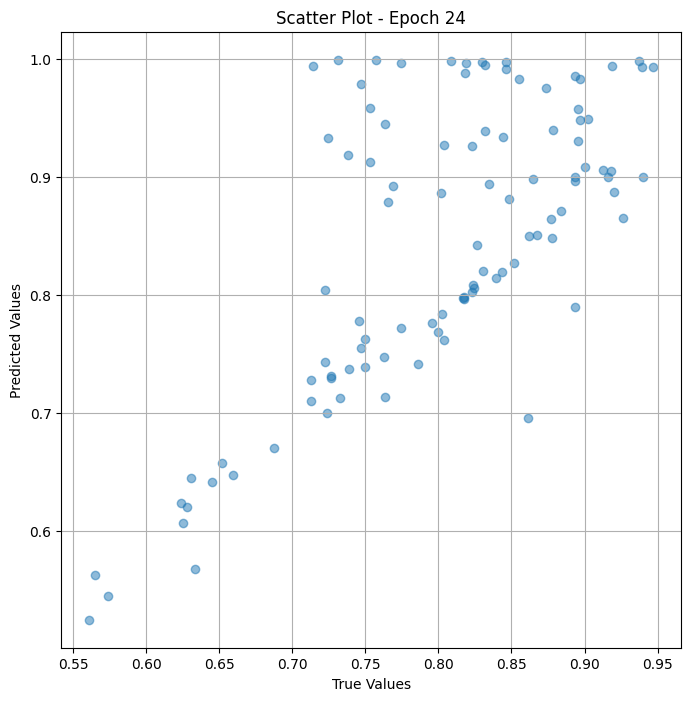


 Epoch: (25/50) Loss = 0.00043045857455581427

 Epoch: (25/50) Loss_rmse = 0.02074749581515789

 Epoch: (25/50) R^2 = 0.942537784576416

 Epoch: (25/50) MAE = 0.01296873390674591

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.8433735, 0.9186992, 0.94, 0.8484849, 0.8969072, 0.8969072, 0.78571427, 0.56122446, 0.625, 0.87826085, 0.9, 0.7570093, 0.7628866, 0.9263158, 0.76344085, 0.8348624, 0.89361703, 0.65957445, 0.8172043, 0.82417583, 0.8165138, 0.71428573, 0.8021978, 0.8956522, 0.92, 0.6875, 0.89361703, 0.7380952, 0.85148513, 0.8933333, 0.7222222, 0.9126214, 0.6304348, 0.82653064, 0.91818184, 0.83, 0.5652174, 0.8037383, 0.9026549, 0.72380954, 0.82300884, 0.74561405, 0.712963, 0.7746479, 0.7529412, 0.8181818, 0.8736842, 0.82300884, 0.84444445, 0.94690263, 0.62376237, 0.7263158, 0.76363635, 0.7532467, 0.8301887, 0.6448598, 0.8235294, 0.8020833, 0.7741935, 0.7326733, 0.85542166, 0.9157895, 0.9369369, 0.8952381, 0.83168316, 0.7241379, 0.84615386, 


 Epoch: (26/50) Loss = 0.0004368469526525587

 Epoch: (26/50) Loss_rmse = 0.02090088464319706

 Epoch: (26/50) R^2 = 0.9416849613189697

 Epoch: (26/50) MAE = 0.017504826188087463

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.8433735, 0.9186992, 0.94, 0.8484849, 0.8969072, 0.8969072, 0.78571427, 0.56122446, 0.625, 0.87826085, 0.9, 0.7570093, 0.7628866, 0.9263158, 0.76344085, 0.8348624, 0.89361703, 0.65957445, 0.8172043, 0.82417583, 0.8165138, 0.71428573, 0.8021978, 0.8956522, 0.92, 0.6875, 0.89361703, 0.7380952, 0.85148513, 0.8933333, 0.7222222, 0.9126214, 0.6304348, 0.82653064, 0.91818184, 0.83, 0.5652174, 0.8037383, 0.9026549, 0.72380954, 0.82300884, 0.74561405, 0.712963, 0.7746479, 0.7529412, 0.8181818, 0.8736842, 0.82300884, 0.84444445, 0.94690263, 0.62376237, 0.7263158, 0.76363635, 0.7532467, 0.8301887, 0.6448598, 0.8235294, 0.8020833, 0.7741935, 0.7326733, 0.85542166, 0.9157895, 0.9369369, 0.8952381, 0.83168316, 0.7241379, 0.84615386,


 Epoch: (27/50) Loss = 0.0001548683358123526

 Epoch: (27/50) Loss_rmse = 0.012444610707461834

 Epoch: (27/50) R^2 = 0.9793264865875244

 Epoch: (27/50) MAE = 0.011854767799377441

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.8433735, 0.9186992, 0.94, 0.8484849, 0.8969072, 0.8969072, 0.78571427, 0.56122446, 0.625, 0.87826085, 0.9, 0.7570093, 0.7628866, 0.9263158, 0.76344085, 0.8348624, 0.89361703, 0.65957445, 0.8172043, 0.82417583, 0.8165138, 0.71428573, 0.8021978, 0.8956522, 0.92, 0.6875, 0.89361703, 0.7380952, 0.85148513, 0.8933333, 0.7222222, 0.9126214, 0.6304348, 0.82653064, 0.91818184, 0.83, 0.5652174, 0.8037383, 0.9026549, 0.72380954, 0.82300884, 0.74561405, 0.712963, 0.7746479, 0.7529412, 0.8181818, 0.8736842, 0.82300884, 0.84444445, 0.94690263, 0.62376237, 0.7263158, 0.76363635, 0.7532467, 0.8301887, 0.6448598, 0.8235294, 0.8020833, 0.7741935, 0.7326733, 0.85542166, 0.9157895, 0.9369369, 0.8952381, 0.83168316, 0.7241379, 0.84615386

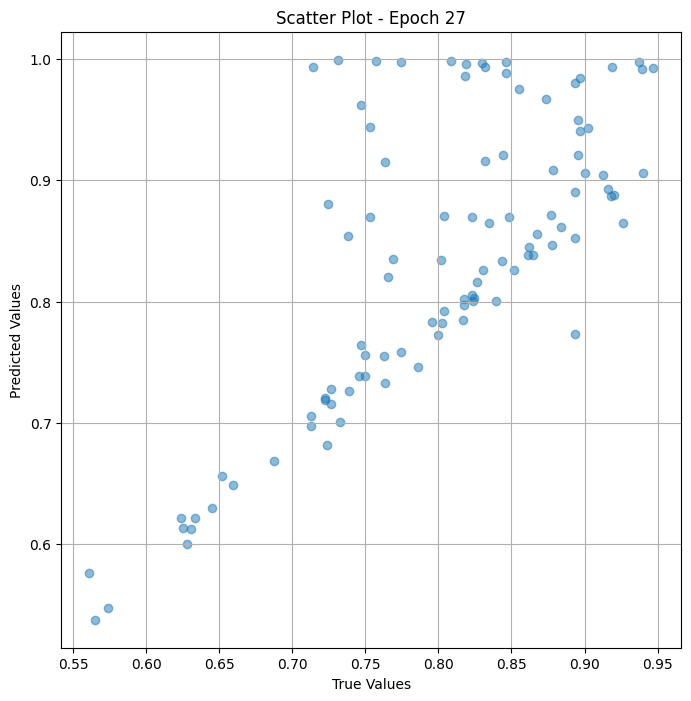


 Epoch: (28/50) Loss = 4.4895052269566804e-05

 Epoch: (28/50) Loss_rmse = 0.006700376980006695

 Epoch: (28/50) R^2 = 0.9940069317817688

 Epoch: (28/50) MAE = 0.005334585905075073

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.8433735, 0.9186992, 0.94, 0.8484849, 0.8969072, 0.8969072, 0.78571427, 0.56122446, 0.625, 0.87826085, 0.9, 0.7570093, 0.7628866, 0.9263158, 0.76344085, 0.8348624, 0.89361703, 0.65957445, 0.8172043, 0.82417583, 0.8165138, 0.71428573, 0.8021978, 0.8956522, 0.92, 0.6875, 0.89361703, 0.7380952, 0.85148513, 0.8933333, 0.7222222, 0.9126214, 0.6304348, 0.82653064, 0.91818184, 0.83, 0.5652174, 0.8037383, 0.9026549, 0.72380954, 0.82300884, 0.74561405, 0.712963, 0.7746479, 0.7529412, 0.8181818, 0.8736842, 0.82300884, 0.84444445, 0.94690263, 0.62376237, 0.7263158, 0.76363635, 0.7532467, 0.8301887, 0.6448598, 0.8235294, 0.8020833, 0.7741935, 0.7326733, 0.85542166, 0.9157895, 0.9369369, 0.8952381, 0.83168316, 0.7241379, 0.8461538

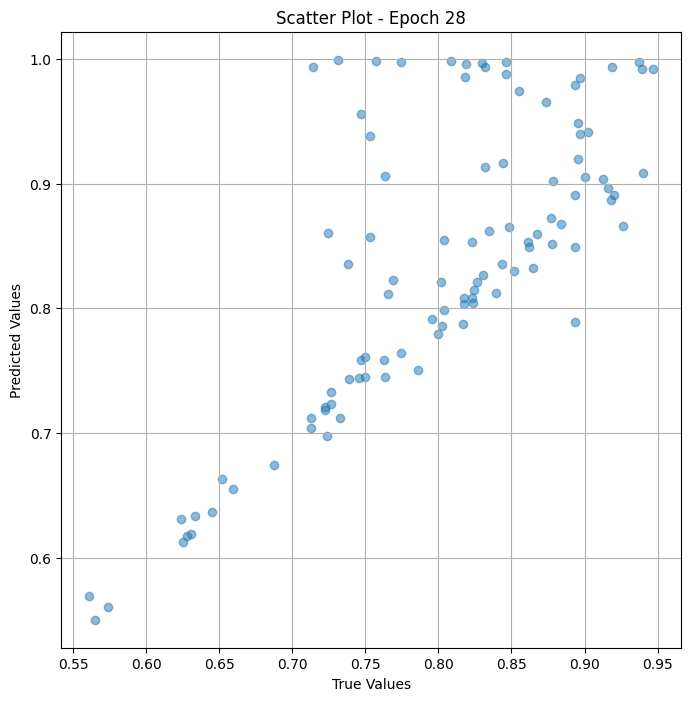


 Epoch: (29/50) Loss = 0.00010907328396569937

 Epoch: (29/50) Loss_rmse = 0.01044381596148014

 Epoch: (29/50) R^2 = 0.9854397177696228

 Epoch: (29/50) MAE = 0.008941441774368286

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.8433735, 0.9186992, 0.94, 0.8484849, 0.8969072, 0.8969072, 0.78571427, 0.56122446, 0.625, 0.87826085, 0.9, 0.7570093, 0.7628866, 0.9263158, 0.76344085, 0.8348624, 0.89361703, 0.65957445, 0.8172043, 0.82417583, 0.8165138, 0.71428573, 0.8021978, 0.8956522, 0.92, 0.6875, 0.89361703, 0.7380952, 0.85148513, 0.8933333, 0.7222222, 0.9126214, 0.6304348, 0.82653064, 0.91818184, 0.83, 0.5652174, 0.8037383, 0.9026549, 0.72380954, 0.82300884, 0.74561405, 0.712963, 0.7746479, 0.7529412, 0.8181818, 0.8736842, 0.82300884, 0.84444445, 0.94690263, 0.62376237, 0.7263158, 0.76363635, 0.7532467, 0.8301887, 0.6448598, 0.8235294, 0.8020833, 0.7741935, 0.7326733, 0.85542166, 0.9157895, 0.9369369, 0.8952381, 0.83168316, 0.7241379, 0.84615386

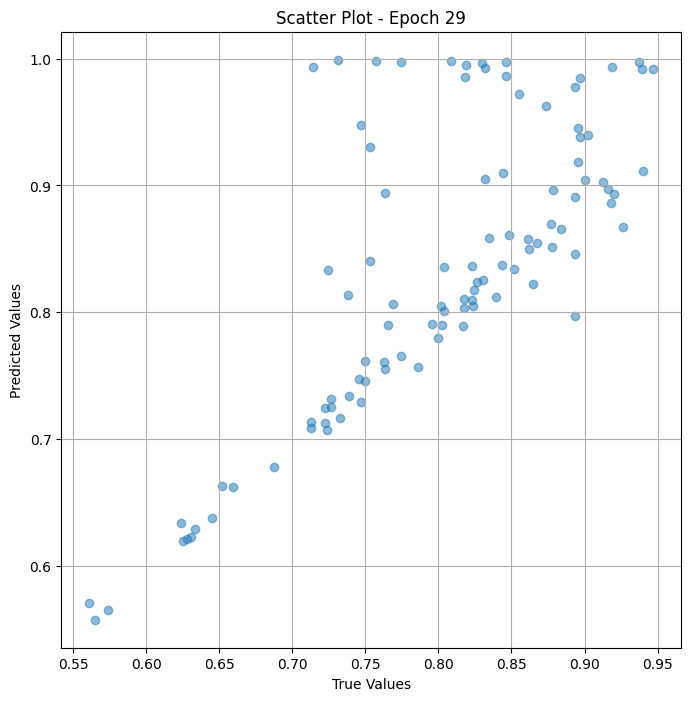


 Epoch: (30/50) Loss = 2.246459189336747e-05

 Epoch: (30/50) Loss_rmse = 0.0047396826557815075

 Epoch: (30/50) R^2 = 0.9970011711120605

 Epoch: (30/50) MAE = 0.0041836947202682495

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.8433735, 0.9186992, 0.94, 0.8484849, 0.8969072, 0.8969072, 0.78571427, 0.56122446, 0.625, 0.87826085, 0.9, 0.7570093, 0.7628866, 0.9263158, 0.76344085, 0.8348624, 0.89361703, 0.65957445, 0.8172043, 0.82417583, 0.8165138, 0.71428573, 0.8021978, 0.8956522, 0.92, 0.6875, 0.89361703, 0.7380952, 0.85148513, 0.8933333, 0.7222222, 0.9126214, 0.6304348, 0.82653064, 0.91818184, 0.83, 0.5652174, 0.8037383, 0.9026549, 0.72380954, 0.82300884, 0.74561405, 0.712963, 0.7746479, 0.7529412, 0.8181818, 0.8736842, 0.82300884, 0.84444445, 0.94690263, 0.62376237, 0.7263158, 0.76363635, 0.7532467, 0.8301887, 0.6448598, 0.8235294, 0.8020833, 0.7741935, 0.7326733, 0.85542166, 0.9157895, 0.9369369, 0.8952381, 0.83168316, 0.7241379, 0.846153


 Epoch: (31/50) Loss = 2.196883360738866e-05

 Epoch: (31/50) Loss_rmse = 0.004687092266976833

 Epoch: (31/50) R^2 = 0.997067391872406

 Epoch: (31/50) MAE = 0.004448354244232178

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.8433735, 0.9186992, 0.94, 0.8484849, 0.8969072, 0.8969072, 0.78571427, 0.56122446, 0.625, 0.87826085, 0.9, 0.7570093, 0.7628866, 0.9263158, 0.76344085, 0.8348624, 0.89361703, 0.65957445, 0.8172043, 0.82417583, 0.8165138, 0.71428573, 0.8021978, 0.8956522, 0.92, 0.6875, 0.89361703, 0.7380952, 0.85148513, 0.8933333, 0.7222222, 0.9126214, 0.6304348, 0.82653064, 0.91818184, 0.83, 0.5652174, 0.8037383, 0.9026549, 0.72380954, 0.82300884, 0.74561405, 0.712963, 0.7746479, 0.7529412, 0.8181818, 0.8736842, 0.82300884, 0.84444445, 0.94690263, 0.62376237, 0.7263158, 0.76363635, 0.7532467, 0.8301887, 0.6448598, 0.8235294, 0.8020833, 0.7741935, 0.7326733, 0.85542166, 0.9157895, 0.9369369, 0.8952381, 0.83168316, 0.7241379, 0.84615386,

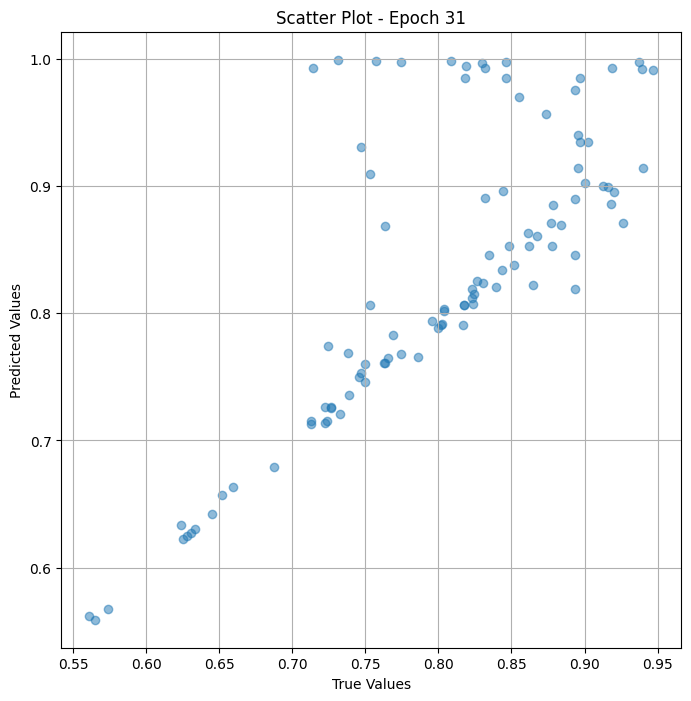


 Epoch: (32/50) Loss = 1.194154356198851e-05

 Epoch: (32/50) Loss_rmse = 0.0034556537866592407

 Epoch: (32/50) R^2 = 0.998405933380127

 Epoch: (32/50) MAE = 0.0030009448528289795

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.8433735, 0.9186992, 0.94, 0.8484849, 0.8969072, 0.8969072, 0.78571427, 0.56122446, 0.625, 0.87826085, 0.9, 0.7570093, 0.7628866, 0.9263158, 0.76344085, 0.8348624, 0.89361703, 0.65957445, 0.8172043, 0.82417583, 0.8165138, 0.71428573, 0.8021978, 0.8956522, 0.92, 0.6875, 0.89361703, 0.7380952, 0.85148513, 0.8933333, 0.7222222, 0.9126214, 0.6304348, 0.82653064, 0.91818184, 0.83, 0.5652174, 0.8037383, 0.9026549, 0.72380954, 0.82300884, 0.74561405, 0.712963, 0.7746479, 0.7529412, 0.8181818, 0.8736842, 0.82300884, 0.84444445, 0.94690263, 0.62376237, 0.7263158, 0.76363635, 0.7532467, 0.8301887, 0.6448598, 0.8235294, 0.8020833, 0.7741935, 0.7326733, 0.85542166, 0.9157895, 0.9369369, 0.8952381, 0.83168316, 0.7241379, 0.8461538


 Epoch: (33/50) Loss = 4.424552116688574e-06

 Epoch: (33/50) Loss_rmse = 0.0021034618839621544

 Epoch: (33/50) R^2 = 0.9994093775749207

 Epoch: (33/50) MAE = 0.0014911890029907227

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.8433735, 0.9186992, 0.94, 0.8484849, 0.8969072, 0.8969072, 0.78571427, 0.56122446, 0.625, 0.87826085, 0.9, 0.7570093, 0.7628866, 0.9263158, 0.76344085, 0.8348624, 0.89361703, 0.65957445, 0.8172043, 0.82417583, 0.8165138, 0.71428573, 0.8021978, 0.8956522, 0.92, 0.6875, 0.89361703, 0.7380952, 0.85148513, 0.8933333, 0.7222222, 0.9126214, 0.6304348, 0.82653064, 0.91818184, 0.83, 0.5652174, 0.8037383, 0.9026549, 0.72380954, 0.82300884, 0.74561405, 0.712963, 0.7746479, 0.7529412, 0.8181818, 0.8736842, 0.82300884, 0.84444445, 0.94690263, 0.62376237, 0.7263158, 0.76363635, 0.7532467, 0.8301887, 0.6448598, 0.8235294, 0.8020833, 0.7741935, 0.7326733, 0.85542166, 0.9157895, 0.9369369, 0.8952381, 0.83168316, 0.7241379, 0.846153

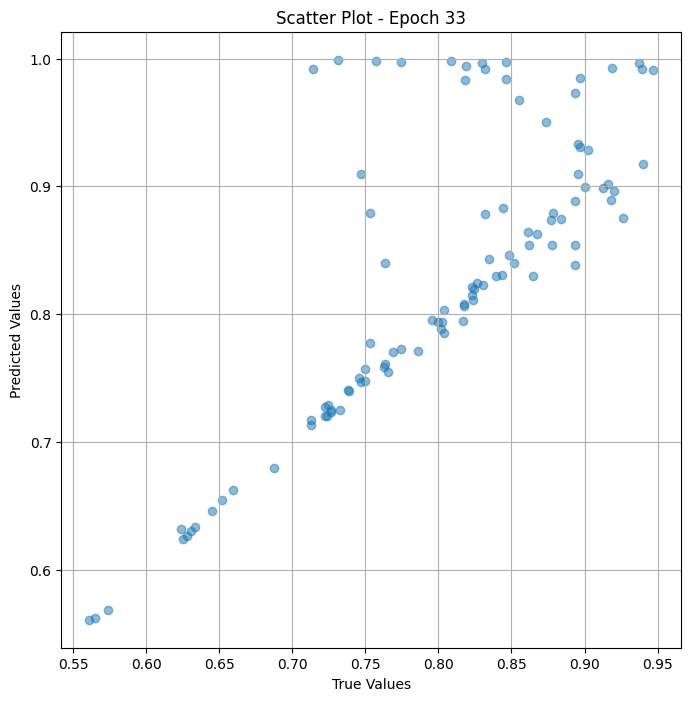


 Epoch: (34/50) Loss = 9.850540664047003e-06

 Epoch: (34/50) Loss_rmse = 0.0031385570764541626

 Epoch: (34/50) R^2 = 0.9986850619316101

 Epoch: (34/50) MAE = 0.002619028091430664

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.8433735, 0.9186992, 0.94, 0.8484849, 0.8969072, 0.8969072, 0.78571427, 0.56122446, 0.625, 0.87826085, 0.9, 0.7570093, 0.7628866, 0.9263158, 0.76344085, 0.8348624, 0.89361703, 0.65957445, 0.8172043, 0.82417583, 0.8165138, 0.71428573, 0.8021978, 0.8956522, 0.92, 0.6875, 0.89361703, 0.7380952, 0.85148513, 0.8933333, 0.7222222, 0.9126214, 0.6304348, 0.82653064, 0.91818184, 0.83, 0.5652174, 0.8037383, 0.9026549, 0.72380954, 0.82300884, 0.74561405, 0.712963, 0.7746479, 0.7529412, 0.8181818, 0.8736842, 0.82300884, 0.84444445, 0.94690263, 0.62376237, 0.7263158, 0.76363635, 0.7532467, 0.8301887, 0.6448598, 0.8235294, 0.8020833, 0.7741935, 0.7326733, 0.85542166, 0.9157895, 0.9369369, 0.8952381, 0.83168316, 0.7241379, 0.8461538

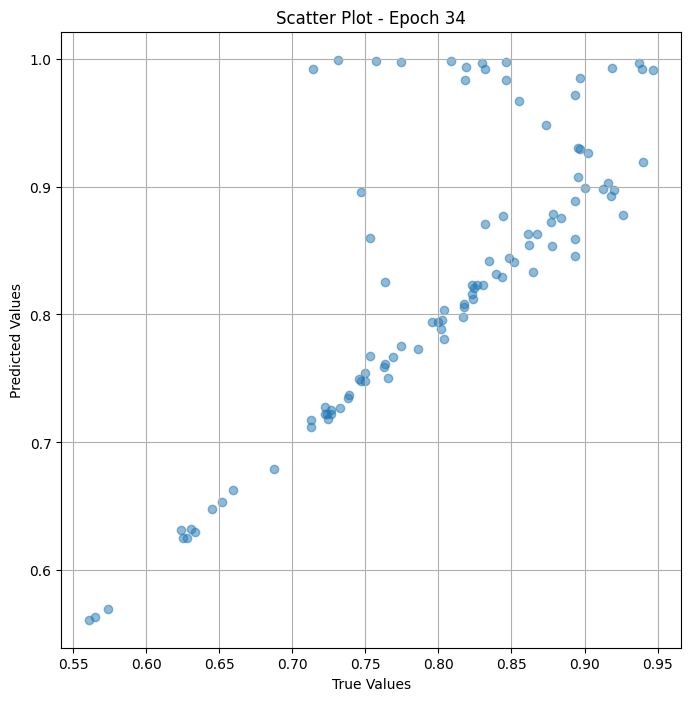


 Epoch: (35/50) Loss = 6.706817202939419e-06

 Epoch: (35/50) Loss_rmse = 0.002589752431958914

 Epoch: (35/50) R^2 = 0.9991046786308289

 Epoch: (35/50) MAE = 0.0015359222888946533

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.8433735, 0.9186992, 0.94, 0.8484849, 0.8969072, 0.8969072, 0.78571427, 0.56122446, 0.625, 0.87826085, 0.9, 0.7570093, 0.7628866, 0.9263158, 0.76344085, 0.8348624, 0.89361703, 0.65957445, 0.8172043, 0.82417583, 0.8165138, 0.71428573, 0.8021978, 0.8956522, 0.92, 0.6875, 0.89361703, 0.7380952, 0.85148513, 0.8933333, 0.7222222, 0.9126214, 0.6304348, 0.82653064, 0.91818184, 0.83, 0.5652174, 0.8037383, 0.9026549, 0.72380954, 0.82300884, 0.74561405, 0.712963, 0.7746479, 0.7529412, 0.8181818, 0.8736842, 0.82300884, 0.84444445, 0.94690263, 0.62376237, 0.7263158, 0.76363635, 0.7532467, 0.8301887, 0.6448598, 0.8235294, 0.8020833, 0.7741935, 0.7326733, 0.85542166, 0.9157895, 0.9369369, 0.8952381, 0.83168316, 0.7241379, 0.8461538

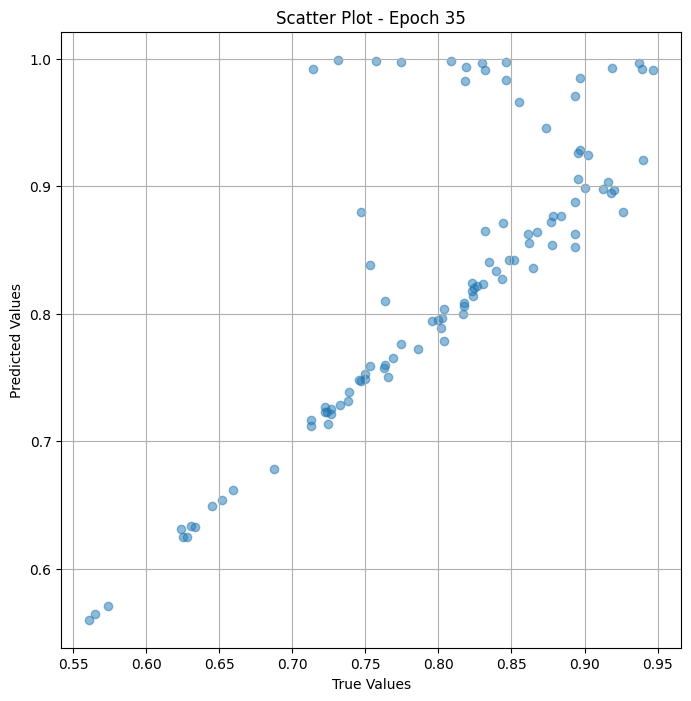


 Epoch: (36/50) Loss = 7.92262471804861e-06

 Epoch: (36/50) Loss_rmse = 0.002814715728163719

 Epoch: (36/50) R^2 = 0.9989423751831055

 Epoch: (36/50) MAE = 0.0018998384475708008

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.8433735, 0.9186992, 0.94, 0.8484849, 0.8969072, 0.8969072, 0.78571427, 0.56122446, 0.625, 0.87826085, 0.9, 0.7570093, 0.7628866, 0.9263158, 0.76344085, 0.8348624, 0.89361703, 0.65957445, 0.8172043, 0.82417583, 0.8165138, 0.71428573, 0.8021978, 0.8956522, 0.92, 0.6875, 0.89361703, 0.7380952, 0.85148513, 0.8933333, 0.7222222, 0.9126214, 0.6304348, 0.82653064, 0.91818184, 0.83, 0.5652174, 0.8037383, 0.9026549, 0.72380954, 0.82300884, 0.74561405, 0.712963, 0.7746479, 0.7529412, 0.8181818, 0.8736842, 0.82300884, 0.84444445, 0.94690263, 0.62376237, 0.7263158, 0.76363635, 0.7532467, 0.8301887, 0.6448598, 0.8235294, 0.8020833, 0.7741935, 0.7326733, 0.85542166, 0.9157895, 0.9369369, 0.8952381, 0.83168316, 0.7241379, 0.84615386

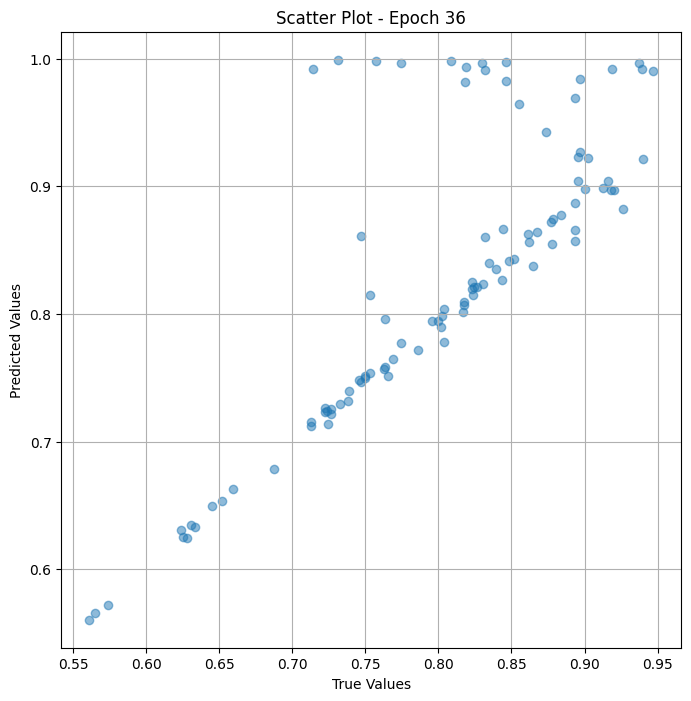


 Epoch: (37/50) Loss = 8.387798516196199e-06

 Epoch: (37/50) Loss_rmse = 0.0028961696662008762

 Epoch: (37/50) R^2 = 0.9988803267478943

 Epoch: (37/50) MAE = 0.001956760883331299

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.8433735, 0.9186992, 0.94, 0.8484849, 0.8969072, 0.8969072, 0.78571427, 0.56122446, 0.625, 0.87826085, 0.9, 0.7570093, 0.7628866, 0.9263158, 0.76344085, 0.8348624, 0.89361703, 0.65957445, 0.8172043, 0.82417583, 0.8165138, 0.71428573, 0.8021978, 0.8956522, 0.92, 0.6875, 0.89361703, 0.7380952, 0.85148513, 0.8933333, 0.7222222, 0.9126214, 0.6304348, 0.82653064, 0.91818184, 0.83, 0.5652174, 0.8037383, 0.9026549, 0.72380954, 0.82300884, 0.74561405, 0.712963, 0.7746479, 0.7529412, 0.8181818, 0.8736842, 0.82300884, 0.84444445, 0.94690263, 0.62376237, 0.7263158, 0.76363635, 0.7532467, 0.8301887, 0.6448598, 0.8235294, 0.8020833, 0.7741935, 0.7326733, 0.85542166, 0.9157895, 0.9369369, 0.8952381, 0.83168316, 0.7241379, 0.8461538

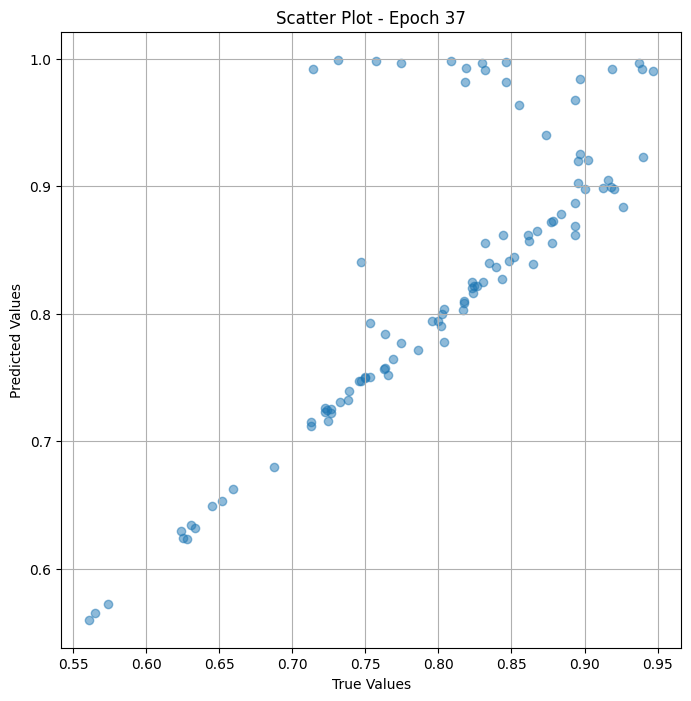


 Epoch: (38/50) Loss = 6.614598987653153e-06

 Epoch: (38/50) Loss_rmse = 0.002571886172518134

 Epoch: (38/50) R^2 = 0.9991170167922974

 Epoch: (38/50) MAE = 0.0014953017234802246

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.8433735, 0.9186992, 0.94, 0.8484849, 0.8969072, 0.8969072, 0.78571427, 0.56122446, 0.625, 0.87826085, 0.9, 0.7570093, 0.7628866, 0.9263158, 0.76344085, 0.8348624, 0.89361703, 0.65957445, 0.8172043, 0.82417583, 0.8165138, 0.71428573, 0.8021978, 0.8956522, 0.92, 0.6875, 0.89361703, 0.7380952, 0.85148513, 0.8933333, 0.7222222, 0.9126214, 0.6304348, 0.82653064, 0.91818184, 0.83, 0.5652174, 0.8037383, 0.9026549, 0.72380954, 0.82300884, 0.74561405, 0.712963, 0.7746479, 0.7529412, 0.8181818, 0.8736842, 0.82300884, 0.84444445, 0.94690263, 0.62376237, 0.7263158, 0.76363635, 0.7532467, 0.8301887, 0.6448598, 0.8235294, 0.8020833, 0.7741935, 0.7326733, 0.85542166, 0.9157895, 0.9369369, 0.8952381, 0.83168316, 0.7241379, 0.8461538

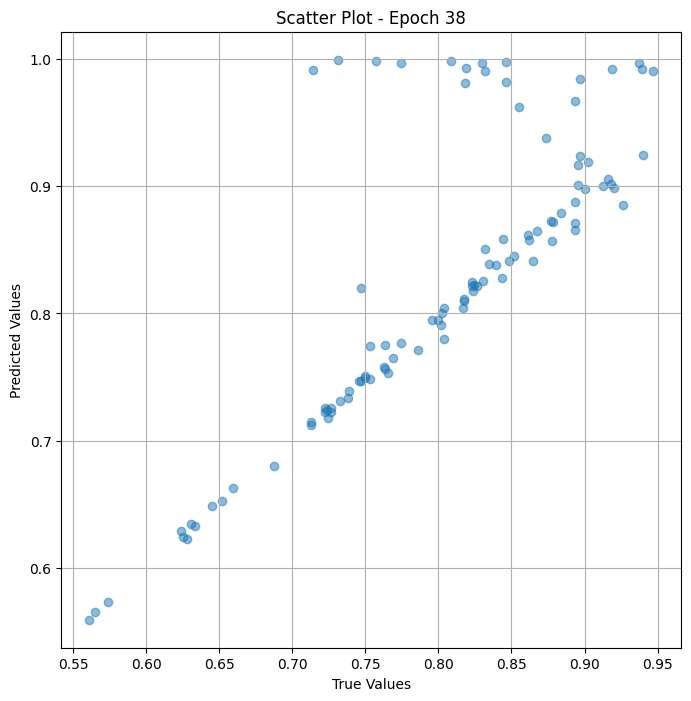


 Epoch: (39/50) Loss = 5.612716449832078e-06

 Epoch: (39/50) Loss_rmse = 0.00236911722458899

 Epoch: (39/50) R^2 = 0.9992507696151733

 Epoch: (39/50) MAE = 0.0014946907758712769

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.8433735, 0.9186992, 0.94, 0.8484849, 0.8969072, 0.8969072, 0.78571427, 0.56122446, 0.625, 0.87826085, 0.9, 0.7570093, 0.7628866, 0.9263158, 0.76344085, 0.8348624, 0.89361703, 0.65957445, 0.8172043, 0.82417583, 0.8165138, 0.71428573, 0.8021978, 0.8956522, 0.92, 0.6875, 0.89361703, 0.7380952, 0.85148513, 0.8933333, 0.7222222, 0.9126214, 0.6304348, 0.82653064, 0.91818184, 0.83, 0.5652174, 0.8037383, 0.9026549, 0.72380954, 0.82300884, 0.74561405, 0.712963, 0.7746479, 0.7529412, 0.8181818, 0.8736842, 0.82300884, 0.84444445, 0.94690263, 0.62376237, 0.7263158, 0.76363635, 0.7532467, 0.8301887, 0.6448598, 0.8235294, 0.8020833, 0.7741935, 0.7326733, 0.85542166, 0.9157895, 0.9369369, 0.8952381, 0.83168316, 0.7241379, 0.84615386

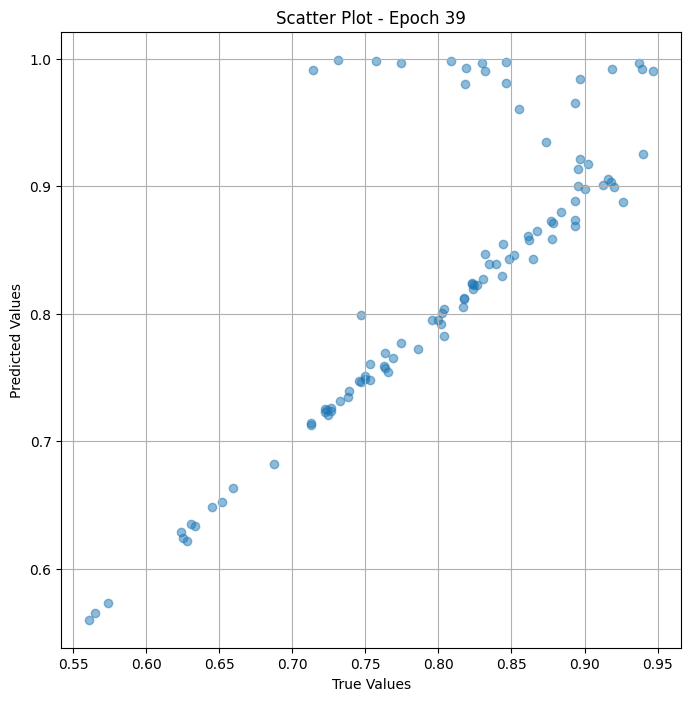


 Epoch: (40/50) Loss = 4.380754035082646e-06

 Epoch: (40/50) Loss_rmse = 0.002093025017529726

 Epoch: (40/50) R^2 = 0.9994152188301086

 Epoch: (40/50) MAE = 0.0012536346912384033

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.8433735, 0.9186992, 0.94, 0.8484849, 0.8969072, 0.8969072, 0.78571427, 0.56122446, 0.625, 0.87826085, 0.9, 0.7570093, 0.7628866, 0.9263158, 0.76344085, 0.8348624, 0.89361703, 0.65957445, 0.8172043, 0.82417583, 0.8165138, 0.71428573, 0.8021978, 0.8956522, 0.92, 0.6875, 0.89361703, 0.7380952, 0.85148513, 0.8933333, 0.7222222, 0.9126214, 0.6304348, 0.82653064, 0.91818184, 0.83, 0.5652174, 0.8037383, 0.9026549, 0.72380954, 0.82300884, 0.74561405, 0.712963, 0.7746479, 0.7529412, 0.8181818, 0.8736842, 0.82300884, 0.84444445, 0.94690263, 0.62376237, 0.7263158, 0.76363635, 0.7532467, 0.8301887, 0.6448598, 0.8235294, 0.8020833, 0.7741935, 0.7326733, 0.85542166, 0.9157895, 0.9369369, 0.8952381, 0.83168316, 0.7241379, 0.8461538

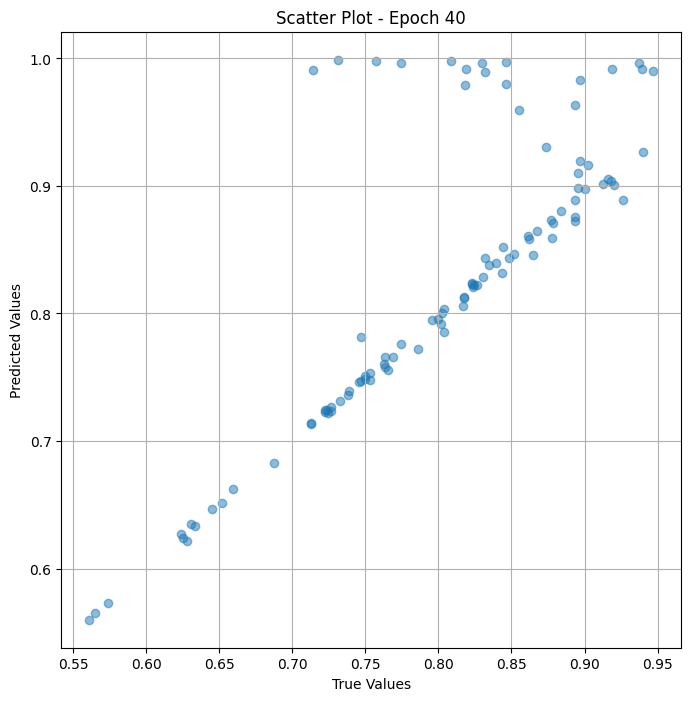


 Epoch: (41/50) Loss = 3.7846507439098787e-06

 Epoch: (41/50) Loss_rmse = 0.0019454178400337696

 Epoch: (41/50) R^2 = 0.9994947910308838

 Epoch: (41/50) MAE = 0.0012057721614837646

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.8433735, 0.9186992, 0.94, 0.8484849, 0.8969072, 0.8969072, 0.78571427, 0.56122446, 0.625, 0.87826085, 0.9, 0.7570093, 0.7628866, 0.9263158, 0.76344085, 0.8348624, 0.89361703, 0.65957445, 0.8172043, 0.82417583, 0.8165138, 0.71428573, 0.8021978, 0.8956522, 0.92, 0.6875, 0.89361703, 0.7380952, 0.85148513, 0.8933333, 0.7222222, 0.9126214, 0.6304348, 0.82653064, 0.91818184, 0.83, 0.5652174, 0.8037383, 0.9026549, 0.72380954, 0.82300884, 0.74561405, 0.712963, 0.7746479, 0.7529412, 0.8181818, 0.8736842, 0.82300884, 0.84444445, 0.94690263, 0.62376237, 0.7263158, 0.76363635, 0.7532467, 0.8301887, 0.6448598, 0.8235294, 0.8020833, 0.7741935, 0.7326733, 0.85542166, 0.9157895, 0.9369369, 0.8952381, 0.83168316, 0.7241379, 0.84615

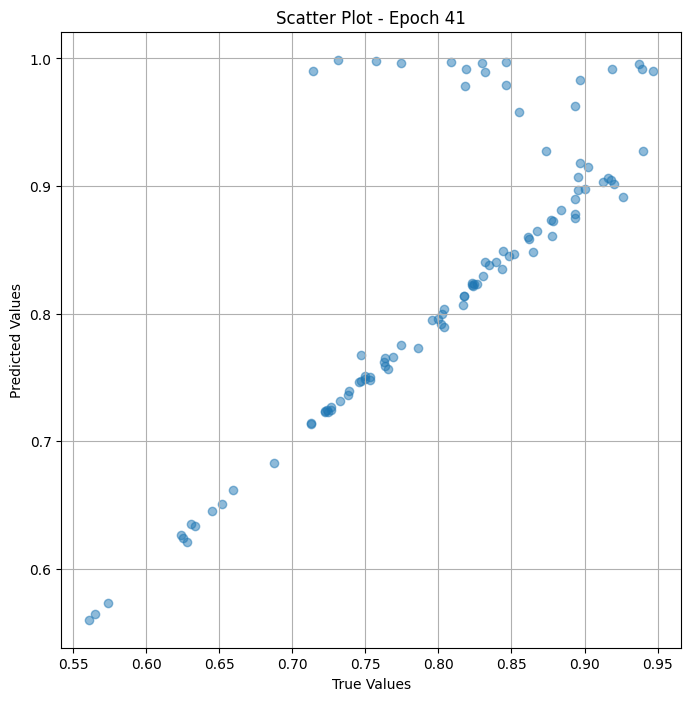


 Epoch: (42/50) Loss = 3.461884261923842e-06

 Epoch: (42/50) Loss_rmse = 0.0018606139346957207

 Epoch: (42/50) R^2 = 0.9995378851890564

 Epoch: (42/50) MAE = 0.0011232644319534302

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.8433735, 0.9186992, 0.94, 0.8484849, 0.8969072, 0.8969072, 0.78571427, 0.56122446, 0.625, 0.87826085, 0.9, 0.7570093, 0.7628866, 0.9263158, 0.76344085, 0.8348624, 0.89361703, 0.65957445, 0.8172043, 0.82417583, 0.8165138, 0.71428573, 0.8021978, 0.8956522, 0.92, 0.6875, 0.89361703, 0.7380952, 0.85148513, 0.8933333, 0.7222222, 0.9126214, 0.6304348, 0.82653064, 0.91818184, 0.83, 0.5652174, 0.8037383, 0.9026549, 0.72380954, 0.82300884, 0.74561405, 0.712963, 0.7746479, 0.7529412, 0.8181818, 0.8736842, 0.82300884, 0.84444445, 0.94690263, 0.62376237, 0.7263158, 0.76363635, 0.7532467, 0.8301887, 0.6448598, 0.8235294, 0.8020833, 0.7741935, 0.7326733, 0.85542166, 0.9157895, 0.9369369, 0.8952381, 0.83168316, 0.7241379, 0.846153

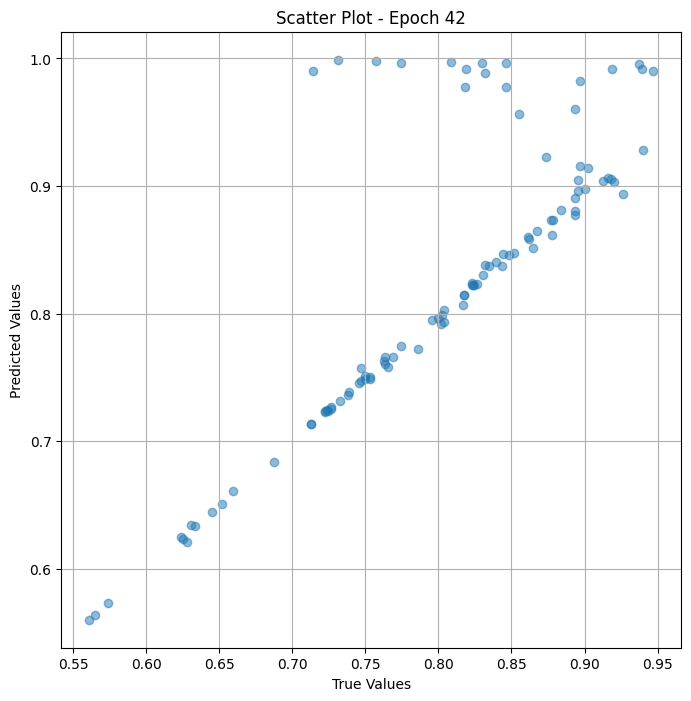


 Epoch: (43/50) Loss = 3.5457378544379026e-06

 Epoch: (43/50) Loss_rmse = 0.001883012941107154

 Epoch: (43/50) R^2 = 0.9995266795158386

 Epoch: (43/50) MAE = 0.0010996907949447632

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.8433735, 0.9186992, 0.94, 0.8484849, 0.8969072, 0.8969072, 0.78571427, 0.56122446, 0.625, 0.87826085, 0.9, 0.7570093, 0.7628866, 0.9263158, 0.76344085, 0.8348624, 0.89361703, 0.65957445, 0.8172043, 0.82417583, 0.8165138, 0.71428573, 0.8021978, 0.8956522, 0.92, 0.6875, 0.89361703, 0.7380952, 0.85148513, 0.8933333, 0.7222222, 0.9126214, 0.6304348, 0.82653064, 0.91818184, 0.83, 0.5652174, 0.8037383, 0.9026549, 0.72380954, 0.82300884, 0.74561405, 0.712963, 0.7746479, 0.7529412, 0.8181818, 0.8736842, 0.82300884, 0.84444445, 0.94690263, 0.62376237, 0.7263158, 0.76363635, 0.7532467, 0.8301887, 0.6448598, 0.8235294, 0.8020833, 0.7741935, 0.7326733, 0.85542166, 0.9157895, 0.9369369, 0.8952381, 0.83168316, 0.7241379, 0.846153

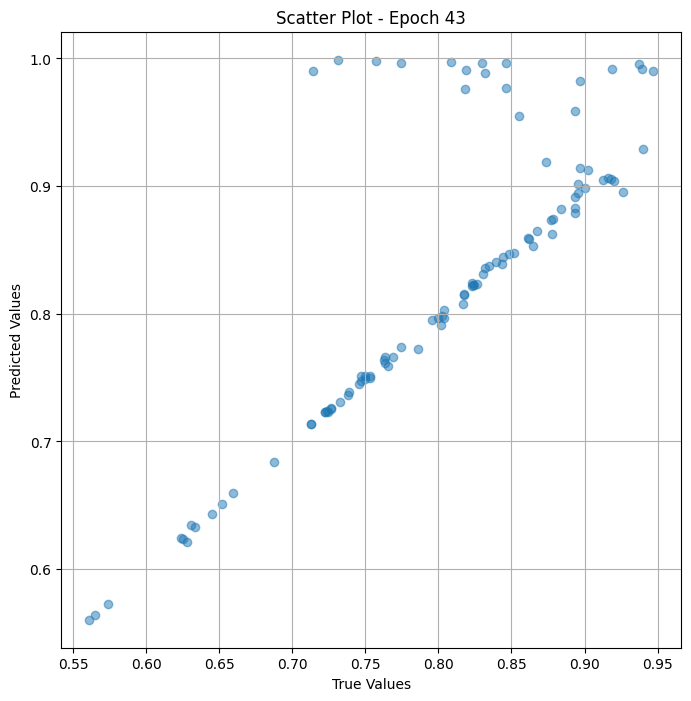


 Epoch: (44/50) Loss = 3.7662584873032756e-06

 Epoch: (44/50) Loss_rmse = 0.0019406850915402174

 Epoch: (44/50) R^2 = 0.9994972348213196

 Epoch: (44/50) MAE = 0.0011196136474609375

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.8433735, 0.9186992, 0.94, 0.8484849, 0.8969072, 0.8969072, 0.78571427, 0.56122446, 0.625, 0.87826085, 0.9, 0.7570093, 0.7628866, 0.9263158, 0.76344085, 0.8348624, 0.89361703, 0.65957445, 0.8172043, 0.82417583, 0.8165138, 0.71428573, 0.8021978, 0.8956522, 0.92, 0.6875, 0.89361703, 0.7380952, 0.85148513, 0.8933333, 0.7222222, 0.9126214, 0.6304348, 0.82653064, 0.91818184, 0.83, 0.5652174, 0.8037383, 0.9026549, 0.72380954, 0.82300884, 0.74561405, 0.712963, 0.7746479, 0.7529412, 0.8181818, 0.8736842, 0.82300884, 0.84444445, 0.94690263, 0.62376237, 0.7263158, 0.76363635, 0.7532467, 0.8301887, 0.6448598, 0.8235294, 0.8020833, 0.7741935, 0.7326733, 0.85542166, 0.9157895, 0.9369369, 0.8952381, 0.83168316, 0.7241379, 0.84615

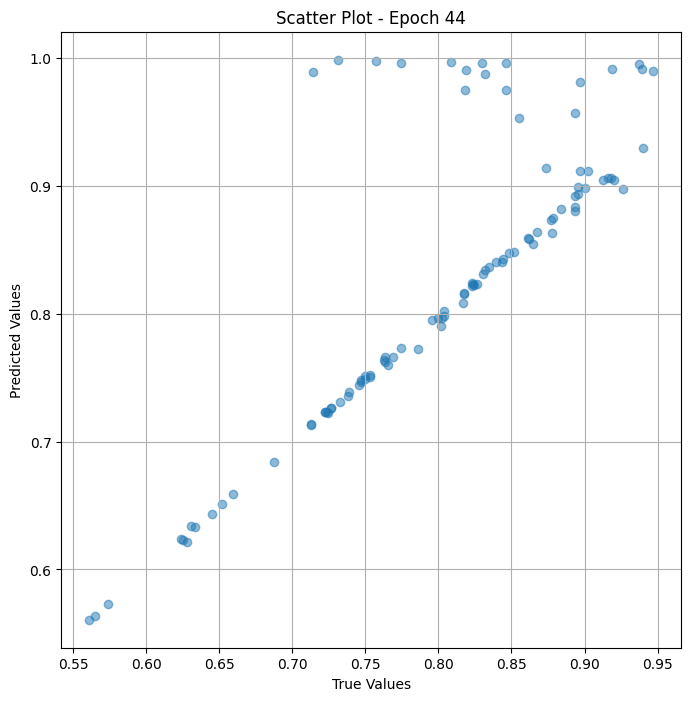


 Epoch: (45/50) Loss = 4.039505256514531e-06

 Epoch: (45/50) Loss_rmse = 0.0020098520908504725

 Epoch: (45/50) R^2 = 0.999460756778717

 Epoch: (45/50) MAE = 0.0011305660009384155

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.8433735, 0.9186992, 0.94, 0.8484849, 0.8969072, 0.8969072, 0.78571427, 0.56122446, 0.625, 0.87826085, 0.9, 0.7570093, 0.7628866, 0.9263158, 0.76344085, 0.8348624, 0.89361703, 0.65957445, 0.8172043, 0.82417583, 0.8165138, 0.71428573, 0.8021978, 0.8956522, 0.92, 0.6875, 0.89361703, 0.7380952, 0.85148513, 0.8933333, 0.7222222, 0.9126214, 0.6304348, 0.82653064, 0.91818184, 0.83, 0.5652174, 0.8037383, 0.9026549, 0.72380954, 0.82300884, 0.74561405, 0.712963, 0.7746479, 0.7529412, 0.8181818, 0.8736842, 0.82300884, 0.84444445, 0.94690263, 0.62376237, 0.7263158, 0.76363635, 0.7532467, 0.8301887, 0.6448598, 0.8235294, 0.8020833, 0.7741935, 0.7326733, 0.85542166, 0.9157895, 0.9369369, 0.8952381, 0.83168316, 0.7241379, 0.8461538


 Epoch: (46/50) Loss = 4.289267963031307e-06

 Epoch: (46/50) Loss_rmse = 0.0020710548851639032

 Epoch: (46/50) R^2 = 0.9994274377822876

 Epoch: (46/50) MAE = 0.001159071922302246

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.8433735, 0.9186992, 0.94, 0.8484849, 0.8969072, 0.8969072, 0.78571427, 0.56122446, 0.625, 0.87826085, 0.9, 0.7570093, 0.7628866, 0.9263158, 0.76344085, 0.8348624, 0.89361703, 0.65957445, 0.8172043, 0.82417583, 0.8165138, 0.71428573, 0.8021978, 0.8956522, 0.92, 0.6875, 0.89361703, 0.7380952, 0.85148513, 0.8933333, 0.7222222, 0.9126214, 0.6304348, 0.82653064, 0.91818184, 0.83, 0.5652174, 0.8037383, 0.9026549, 0.72380954, 0.82300884, 0.74561405, 0.712963, 0.7746479, 0.7529412, 0.8181818, 0.8736842, 0.82300884, 0.84444445, 0.94690263, 0.62376237, 0.7263158, 0.76363635, 0.7532467, 0.8301887, 0.6448598, 0.8235294, 0.8020833, 0.7741935, 0.7326733, 0.85542166, 0.9157895, 0.9369369, 0.8952381, 0.83168316, 0.7241379, 0.8461538

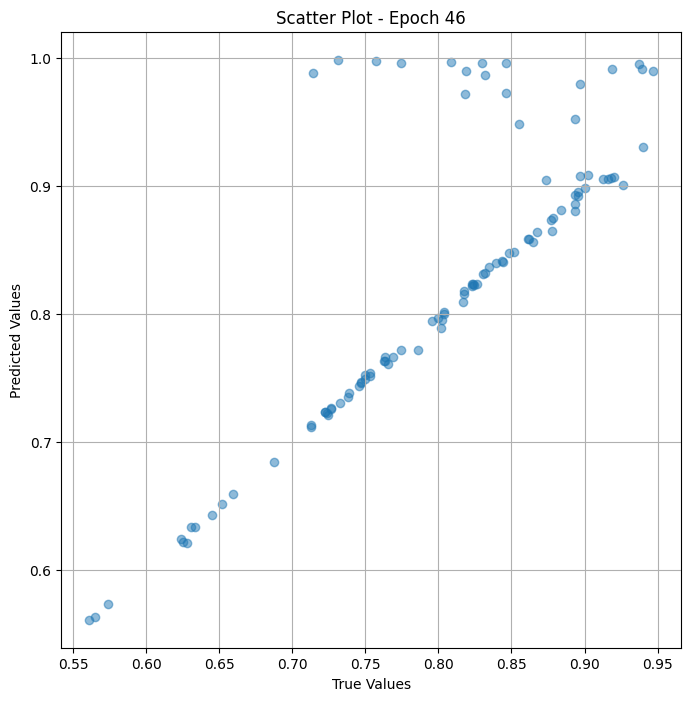


 Epoch: (47/50) Loss = 4.496195742831333e-06

 Epoch: (47/50) Loss_rmse = 0.002120423596352339

 Epoch: (47/50) R^2 = 0.9993997812271118

 Epoch: (47/50) MAE = 0.0011866241693496704

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.8433735, 0.9186992, 0.94, 0.8484849, 0.8969072, 0.8969072, 0.78571427, 0.56122446, 0.625, 0.87826085, 0.9, 0.7570093, 0.7628866, 0.9263158, 0.76344085, 0.8348624, 0.89361703, 0.65957445, 0.8172043, 0.82417583, 0.8165138, 0.71428573, 0.8021978, 0.8956522, 0.92, 0.6875, 0.89361703, 0.7380952, 0.85148513, 0.8933333, 0.7222222, 0.9126214, 0.6304348, 0.82653064, 0.91818184, 0.83, 0.5652174, 0.8037383, 0.9026549, 0.72380954, 0.82300884, 0.74561405, 0.712963, 0.7746479, 0.7529412, 0.8181818, 0.8736842, 0.82300884, 0.84444445, 0.94690263, 0.62376237, 0.7263158, 0.76363635, 0.7532467, 0.8301887, 0.6448598, 0.8235294, 0.8020833, 0.7741935, 0.7326733, 0.85542166, 0.9157895, 0.9369369, 0.8952381, 0.83168316, 0.7241379, 0.8461538

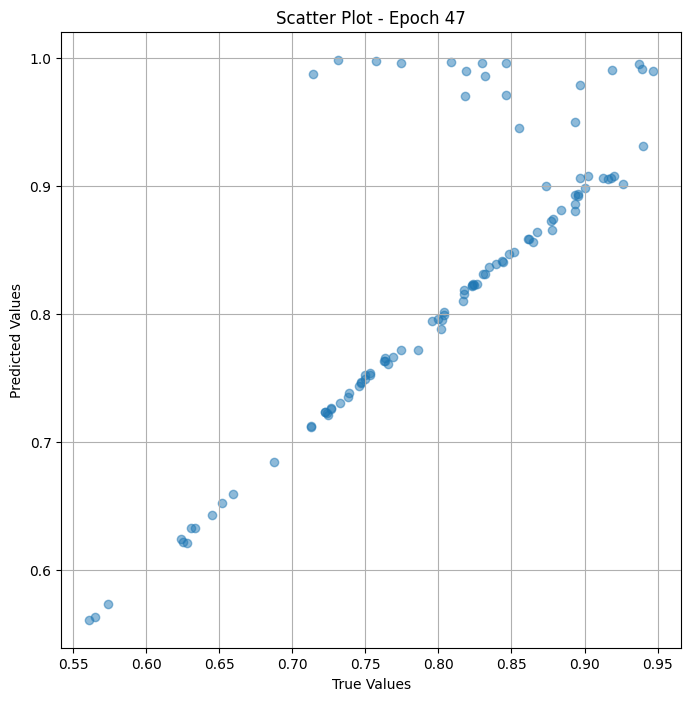


 Epoch: (48/50) Loss = 4.725429789687041e-06

 Epoch: (48/50) Loss_rmse = 0.0021738053765147924

 Epoch: (48/50) R^2 = 0.999369204044342

 Epoch: (48/50) MAE = 0.0012243986129760742

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.8433735, 0.9186992, 0.94, 0.8484849, 0.8969072, 0.8969072, 0.78571427, 0.56122446, 0.625, 0.87826085, 0.9, 0.7570093, 0.7628866, 0.9263158, 0.76344085, 0.8348624, 0.89361703, 0.65957445, 0.8172043, 0.82417583, 0.8165138, 0.71428573, 0.8021978, 0.8956522, 0.92, 0.6875, 0.89361703, 0.7380952, 0.85148513, 0.8933333, 0.7222222, 0.9126214, 0.6304348, 0.82653064, 0.91818184, 0.83, 0.5652174, 0.8037383, 0.9026549, 0.72380954, 0.82300884, 0.74561405, 0.712963, 0.7746479, 0.7529412, 0.8181818, 0.8736842, 0.82300884, 0.84444445, 0.94690263, 0.62376237, 0.7263158, 0.76363635, 0.7532467, 0.8301887, 0.6448598, 0.8235294, 0.8020833, 0.7741935, 0.7326733, 0.85542166, 0.9157895, 0.9369369, 0.8952381, 0.83168316, 0.7241379, 0.8461538

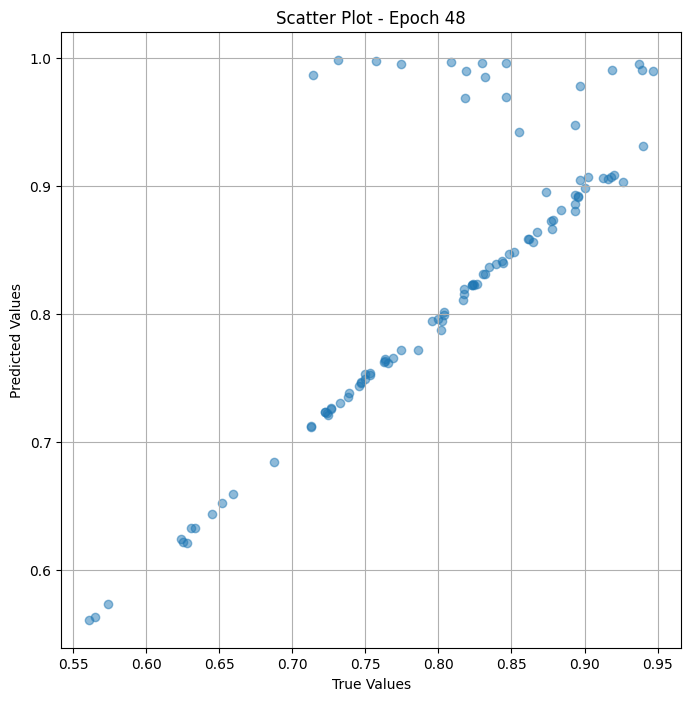


 Epoch: (49/50) Loss = 4.964399067830527e-06

 Epoch: (49/50) Loss_rmse = 0.0022280931007117033

 Epoch: (49/50) R^2 = 0.9993373155593872

 Epoch: (49/50) MAE = 0.0012537240982055664

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.8433735, 0.9186992, 0.94, 0.8484849, 0.8969072, 0.8969072, 0.78571427, 0.56122446, 0.625, 0.87826085, 0.9, 0.7570093, 0.7628866, 0.9263158, 0.76344085, 0.8348624, 0.89361703, 0.65957445, 0.8172043, 0.82417583, 0.8165138, 0.71428573, 0.8021978, 0.8956522, 0.92, 0.6875, 0.89361703, 0.7380952, 0.85148513, 0.8933333, 0.7222222, 0.9126214, 0.6304348, 0.82653064, 0.91818184, 0.83, 0.5652174, 0.8037383, 0.9026549, 0.72380954, 0.82300884, 0.74561405, 0.712963, 0.7746479, 0.7529412, 0.8181818, 0.8736842, 0.82300884, 0.84444445, 0.94690263, 0.62376237, 0.7263158, 0.76363635, 0.7532467, 0.8301887, 0.6448598, 0.8235294, 0.8020833, 0.7741935, 0.7326733, 0.85542166, 0.9157895, 0.9369369, 0.8952381, 0.83168316, 0.7241379, 0.846153

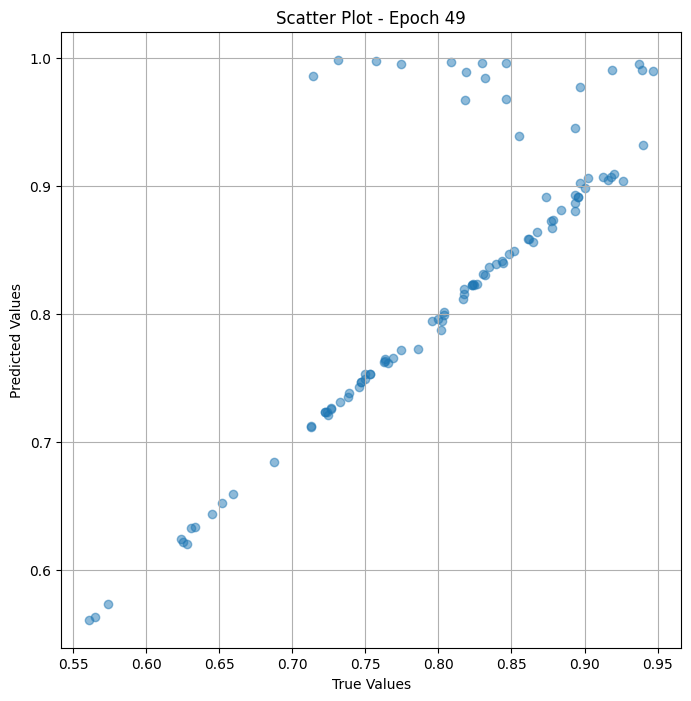


 Epoch: (50/50) Loss = 5.279235210764455e-06

 Epoch: (50/50) Loss_rmse = 0.0022976587060838938

 Epoch: (50/50) R^2 = 0.9992952942848206

 Epoch: (50/50) MAE = 0.001313433051109314

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.8433735, 0.9186992, 0.94, 0.8484849, 0.8969072, 0.8969072, 0.78571427, 0.56122446, 0.625, 0.87826085, 0.9, 0.7570093, 0.7628866, 0.9263158, 0.76344085, 0.8348624, 0.89361703, 0.65957445, 0.8172043, 0.82417583, 0.8165138, 0.71428573, 0.8021978, 0.8956522, 0.92, 0.6875, 0.89361703, 0.7380952, 0.85148513, 0.8933333, 0.7222222, 0.9126214, 0.6304348, 0.82653064, 0.91818184, 0.83, 0.5652174, 0.8037383, 0.9026549, 0.72380954, 0.82300884, 0.74561405, 0.712963, 0.7746479, 0.7529412, 0.8181818, 0.8736842, 0.82300884, 0.84444445, 0.94690263, 0.62376237, 0.7263158, 0.76363635, 0.7532467, 0.8301887, 0.6448598, 0.8235294, 0.8020833, 0.7741935, 0.7326733, 0.85542166, 0.9157895, 0.9369369, 0.8952381, 0.83168316, 0.7241379, 0.8461538

NameError: name 'model' is not defined

In [ ]:
# Training the model and save weights
fit(50, model_test, train_dl_test)
torch.save(model.state_dict(), "model_weights_vr_test")

In [ ]:
true_values_list = [0.8433735, 0.9186992, 0.94, 0.8484849, 0.8969072, 0.8969072, 0.78571427, 0.56122446]

predicted_values_list= [0.8369584, 0.9930521, 0.91116315, 0.86105376, 0.938327, 0.9848261, 0.75687706, 0.57035136]

import numpy as np
from scipy.stats import spearmanr


spearman_corr, _ = spearmanr(true_values_list, predicted_values_list)


print("Spearman correlation:",spearman_corr, _ )

Spearman correlation: 0.8503146459584138 0.007471414639953467


# Finetune


## Train

In [ ]:
# Load the pre-trained ResNet model
model_Res = torch.hub.load('pytorch/vision:v0.10.0', 'resnet50', pretrained=True)

# Remove the last layer of the model Res
layers_Res = list(model_Res.children())
model_Res = nn.Sequential(*layers_Res[:-1])

# Set the top layers to be not trainable
for param in model_Res.parameters():
    param.requires_grad = True

# Add your custom layers for fine-tuning
#num_features = model_Res[0][-1].in_features  # Get the number of features in the last layer of ResNet

custom_layers = [
    nn.Flatten(),
    nn.Linear(2048, 512),  # Example: add a fully connected layer with 512 units
    nn.ReLU(),
    nn.Dropout(0.5),  # Example: add dropout for regularization
    nn.Linear(512, 1)  # Example: add the output layer with your desired number of classes
]

# Create a new model by combining ResNet and custom layers
fine_tuned_model = nn.Sequential(
    model_Res,
    *custom_layers
)

# Optionally, you can print the fine-tuned model architecture
print(fine_tuned_model)

Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.10.0


Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
          (0): Conv2d(64, 256

In [ ]:
# Load the pre-trained ViT model
model_trans = ViTModel.from_pretrained('google/vit-base-patch16-224-in21k')

# Freeze some of the layers
count = 0
for child in model_trans.children():
    count += 1
    if count < 4:
        for param in child.parameters():
            param.requires_grad = True

# Extract the feature extractor
feature_extractor = ViTFeatureExtractor.from_pretrained('google/vit-base-patch16-224-in21k')

# Remove the classification head (top layers) from the model
model_trans_top = nn.Sequential(*list(model_trans.children())[:-2])

# Access the last linear layer and adjust its bias
last_linear_layer = list(model_trans.children())[-1]
# Assuming the last layer is a Linear layer
if isinstance(last_linear_layer, nn.Linear):
    # Adjust the bias as needed
    new_bias = torch.tensor([2.0])
    last_linear_layer.bias.data = new_bias

# Add Sigmoid activation
mymodel = nn.Sequential(last_linear_layer, nn.Sigmoid())

# Optionally, you can print the modified model architecture
print(mymodel)


preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

Sequential(
  (0): ViTPooler(
    (dense): Linear(in_features=768, out_features=768, bias=True)
    (activation): Tanh()
  )
  (1): Sigmoid()
)


In [ ]:
# Merge the two models
class model_merge_fine(nn.Module):
    def __init__(self, model_trans_top, trans_layer_norm, model_Res,mymodel ):
        super().__init__()
        # All the trans model layers
        self.model_trans_top = model_trans_top
        self.trans_layer_norm = trans_layer_norm
        self.trans_flatten = nn.Flatten()
        self.trans_linear = nn.Linear(150528, 2048)

        # All the ResNet model
        self.model_Res = model_Res

        # Merge the result and pass the
        #self.dropout = nn.Dropout(dp_rate)
        self.linear1 = nn.Linear(4096, 500)
        self.linear2 = nn.Linear(500,1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, trans_b, res_b):
        # Get intermediate outputs using hidden layer
        result_trans = self.model_trans_top(trans_b)
        patch_state = result_trans.last_hidden_state[:,1:,:] # Remove the classification token and get the last hidden state of all patchs
        result_trans = self.trans_layer_norm(patch_state)
        result_trans = self.trans_flatten(patch_state)
        #result_trans = self.dropout(result_trans)
        result_trans = self.trans_linear(result_trans)

        result_res = self.model_Res(res_b)
        result_res = result_res.view(result_res.size(0), -1)  # Equivalent to squeeze and reshape

        result_merge = torch.cat((result_trans, result_res),1)
        #result_merge = self.dropout(result_merge)
        result_merge = self.linear1(result_merge)
        #result_merge = self.dropout(result_merge)
        result_merge = self.linear2(result_merge)
        result_merge = self.sigmoid(result_merge)
        return result_merge


model = model_merge_fine(model_trans_top, trans_layer_norm, model_Res,mymodel )

In [ ]:
# Add data and model to GPU
device = get_default_device()
train_dl = DeviceDataLoader(train_dl, device)
model = to_device(model, device)

In [ ]:
# Define optimizer and learning_rate scheduler
params = [param for param in list(model.parameters()) if param.requires_grad == True]
optimizer = torch.optim.Adam(params, lr=1e-7 , weight_decay=1e-7)
lr_scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
    optimizer,
    mode='min',
    factor=0.1,
    patience=2,
    verbose=True)

In [ ]:
def plot_scatter(true_values, predicted_values, epoch):
    plt.figure(figsize=(8, 8))
    plt.scatter(true_values, predicted_values, alpha=0.5)
    plt.title(f'Scatter Plot - Epoch {epoch+1}')
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.grid(True)
    plt.show()

# Fit function doing grad steps
def fit(epochs, model, train_dl):
    opt = optimizer
    sched = lr_scheduler
    loss_func = nn.MSELoss()
    mae_func = nn.L1Loss()

    for epoch in range(epochs):
        model.train()
        batch_num = 16
        true_values_list = []
        predicted_values_list = []
        for x_trans, x_res, yb in train_dl:
            total_loss = 0
            total_loss_rmse = 0
            total_r2 = 0
            total_mae = 0
            yb = yb.float()

            # Pass the optimizer so that the model will get trained
            preds = model(x_trans,x_res)
            loss = loss_func(preds.squeeze(), yb)
            loss_rmse = torch.sqrt(loss)
            mae = mae_func(preds.squeeze(), yb)

            # Calculate R-squared
            mean_y = torch.mean(yb)
            ss_total = torch.sum((yb - mean_y)**2)
            ss_residual = torch.sum((yb - preds.squeeze())**2)
            r2 = 1 - (ss_residual / ss_total)

             # Accumulate true and predicted values for scatter plot
            true_values_list.extend(yb.cpu().detach().numpy())
            predicted_values_list.extend(preds.squeeze().cpu().detach().numpy())

            loss.backward()
            opt.step()
            opt.zero_grad()

            total_loss += loss.item()
            total_loss_rmse += loss_rmse.item()
            total_r2 += r2.item()
            total_mae += mae.item()
            #total_spearman += spearman_corr

            # Increment batch number
            #print('\r', f'batch #{batch_num}: {loss}', end='')
            batch_num += 5

        mean_r2 = total_r2 / batch_num
        mean_mae = total_mae / batch_num

        # Print epoch information
        print('\n', f'Epoch: ({epoch+1}/{epochs}) Loss = {total_loss}')
        print('\n', f'Epoch: ({epoch+1}/{epochs}) Loss_rmse = {total_loss_rmse}')
        print('\n', f'Epoch: ({epoch+1}/{epochs}) R^2 = {total_r2}')
        print('\n', f'Epoch: ({epoch+1}/{epochs}) MAE = {total_mae}')
        #print('\n', f'Epoch: ({epoch+1}/{epochs}) Spearman = {mean_spearman}')
        print('\n', f"true_values_list_val : { len(true_values_list)}")
        print('\n', f"predicted_values_list_val : {len(predicted_values_list)}")
        print('\n', f"true_values_list_val : { true_values_list}")
        print('\n', f"predicted_values_list_val : {predicted_values_list}")
        # Plot scatter plot after each epoch
        plot_scatter(true_values_list, predicted_values_list, epoch)

In [ ]:
# Training the model and save weights
fit(50, model, train_dl)
torch.save(model.state_dict(), "model_weights_vr")

## Valid

In [ ]:
# Merge the two models
class model_merge_fine_val(nn.Module):
    def __init__(self, model_trans_top, trans_layer_norm, model_Res,mymodel ):
        super().__init__()
        # All the trans model layers
        self.model_trans_top = model_trans_top
        self.trans_layer_norm = trans_layer_norm
        self.trans_flatten = nn.Flatten()
        self.trans_linear = nn.Linear(150528, 2048)

        # All the ResNet model
        self.model_Res = model_Res

        # Merge the result and pass the
        #self.dropout = nn.Dropout(dp_rate)
        self.linear1 = nn.Linear(4096, 500)
        self.linear2 = nn.Linear(500,1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, trans_b, res_b):
        # Get intermediate outputs using hidden layer
        result_trans = self.model_trans_top(trans_b)
        patch_state = result_trans.last_hidden_state[:,1:,:] # Remove the classification token and get the last hidden state of all patchs
        result_trans = self.trans_layer_norm(patch_state)
        result_trans = self.trans_flatten(patch_state)
        #result_trans = self.dropout(result_trans)
        result_trans = self.trans_linear(result_trans)

        result_res = self.model_Res(res_b)
        result_res = result_res.view(result_res.size(0), -1)  # Equivalent to squeeze and reshape

        result_merge = torch.cat((result_trans, result_res),1)
        #result_merge = self.dropout(result_merge)
        result_merge = self.linear1(result_merge)
        #result_merge = self.dropout(result_merge)
        result_merge = self.linear2(result_merge)
        result_merge = self.sigmoid(result_merge)
        return result_merge


modelfine_val = model_merge_fine_val(model_trans_top, trans_layer_norm, model_Res,mymodel )

In [ ]:
# Add data and model to GPU
device = get_default_device()
train_dl_val = DeviceDataLoader(train_dl_val, device)
modelfine_val = to_device(modelfine_val, device)

In [ ]:
# Define optimizer and learning_rate scheduler
params = [param for param in list(modelfine_val.parameters()) if param.requires_grad == True]
optimizer = torch.optim.Adam(params, lr=1e-7 , weight_decay=1e-7)
lr_scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
    optimizer,
    mode='min',
    factor=0.1,
    patience=2,
    verbose=True)

In [ ]:
def plot_scatter(true_values, predicted_values, epoch):
    plt.figure(figsize=(8, 8))
    plt.scatter(true_values, predicted_values, alpha=0.5)
    plt.title(f'Scatter Plot - Epoch {epoch+1}')
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.grid(True)
    plt.show()

# Fit function doing grad steps
def fit(epochs, modelfine_val, train_dl_val):
    opt = optimizer
    sched = lr_scheduler
    loss_func = nn.MSELoss()
    mae_func = nn.L1Loss()

    for epoch in range(epochs):
        modelfine_val.train()
        batch_num = 16
        true_values_list = []
        predicted_values_list = []
        for x_trans, x_res, yb in train_dl_val:
            total_loss = 0
            total_loss_rmse = 0
            total_r2 = 0
            total_mae = 0
            yb = yb.float()

            # Pass the optimizer so that the model will get trained
            preds = modelfine_val(x_trans,x_res)
            loss = loss_func(preds.squeeze(), yb)
            loss_rmse = torch.sqrt(loss)
            mae = mae_func(preds.squeeze(), yb)

            # Calculate R-squared
            mean_y = torch.mean(yb)
            ss_total = torch.sum((yb - mean_y)**2)
            ss_residual = torch.sum((yb - preds.squeeze())**2)
            r2 = 1 - (ss_residual / ss_total)

             # Accumulate true and predicted values for scatter plot
            true_values_list.extend(yb.cpu().detach().numpy())
            predicted_values_list.extend(preds.squeeze().cpu().detach().numpy())

            loss.backward()
            opt.step()
            opt.zero_grad()

            total_loss += loss.item()
            total_loss_rmse += loss_rmse.item()
            total_r2 += r2.item()
            total_mae += mae.item()
            #total_spearman += spearman_corr

            # Increment batch number
            #print('\r', f'batch #{batch_num}: {loss}', end='')
            batch_num += 5

        mean_r2 = total_r2 / batch_num
        mean_mae = total_mae / batch_num

        # Print epoch information
        print('\n', f'Epoch: ({epoch+1}/{epochs}) Loss = {total_loss}')
        print('\n', f'Epoch: ({epoch+1}/{epochs}) Loss_rmse = {total_loss_rmse}')
        print('\n', f'Epoch: ({epoch+1}/{epochs}) R^2 = {total_r2}')
        print('\n', f'Epoch: ({epoch+1}/{epochs}) MAE = {total_mae}')
        #print('\n', f'Epoch: ({epoch+1}/{epochs}) Spearman = {mean_spearman}')
        print('\n', f"true_values_list_val : { len(true_values_list)}")
        print('\n', f"predicted_values_list_val : {len(predicted_values_list)}")
        print('\n', f"true_values_list_val : { true_values_list}")
        print('\n', f"predicted_values_list_val : {predicted_values_list}")
        # Plot scatter plot after each epoch
        plot_scatter(true_values_list, predicted_values_list, epoch)

In [ ]:
# Training the model and save weights
fit(50, modelfine_val, train_dl_val)
torch.save(model.state_dict(), "model_weights_valr_fine")

## Test

In [ ]:
# Merge the two models
class model_merge_fine_test(nn.Module):
    def __init__(self, model_trans_top, trans_layer_norm, model_Res,mymodel ):
        super().__init__()
        # All the trans model layers
        self.model_trans_top = model_trans_top
        self.trans_layer_norm = trans_layer_norm
        self.trans_flatten = nn.Flatten()
        self.trans_linear = nn.Linear(150528, 2048)

        # All the ResNet model
        self.model_Res = model_Res

        # Merge the result and pass the
        #self.dropout = nn.Dropout(dp_rate)
        self.linear1 = nn.Linear(4096, 500)
        self.linear2 = nn.Linear(500,1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, trans_b, res_b):
        # Get intermediate outputs using hidden layer
        result_trans = self.model_trans_top(trans_b)
        patch_state = result_trans.last_hidden_state[:,1:,:] # Remove the classification token and get the last hidden state of all patchs
        result_trans = self.trans_layer_norm(patch_state)
        result_trans = self.trans_flatten(patch_state)
        #result_trans = self.dropout(result_trans)
        result_trans = self.trans_linear(result_trans)

        result_res = self.model_Res(res_b)
        result_res = result_res.view(result_res.size(0), -1)  # Equivalent to squeeze and reshape

        result_merge = torch.cat((result_trans, result_res),1)
        #result_merge = self.dropout(result_merge)
        result_merge = self.linear1(result_merge)
        #result_merge = self.dropout(result_merge)
        result_merge = self.linear2(result_merge)
        result_merge = self.sigmoid(result_merge)
        return result_merge


model_fine_test = model_merge_fine_test(model_trans_top, trans_layer_norm, model_Res,mymodel )

In [ ]:
# Add data and model to GPU
device = get_default_device()
train_dl_test = DeviceDataLoader(train_dl_test, device)
model_fine_test = to_device(model_fine_test, device)

In [ ]:
# Define optimizer and learning_rate scheduler
params = [param for param in list(model_fine_test.parameters()) if param.requires_grad == True]
optimizer = torch.optim.Adam(params, lr=1e-7 , weight_decay=1e-7)
lr_scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
    optimizer,
    mode='min',
    factor=0.1,
    patience=2,
    verbose=True)

In [ ]:
def plot_scatter(true_values, predicted_values, epoch):
    plt.figure(figsize=(8, 8))
    plt.scatter(true_values, predicted_values, alpha=0.5)
    plt.title(f'Scatter Plot - Epoch {epoch+1}')
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.grid(True)
    plt.show()

# Fit function doing grad steps
def fit(epochs, model_fine_test, train_dl_test):
    opt = optimizer
    sched = lr_scheduler
    loss_func = nn.MSELoss()
    mae_func = nn.L1Loss()

    for epoch in range(epochs):
        model_fine_test.eval()
        batch_num = 16
        true_values_list = []
        predicted_values_list = []
        for x_trans, x_res, yb in train_dl_test:
            total_loss = 0
            total_loss_rmse = 0
            total_r2 = 0
            total_mae = 0
            yb = yb.float()

            # Pass the optimizer so that the model will get trained
            preds = model_fine_test(x_trans,x_res)
            loss = loss_func(preds.squeeze(), yb)
            loss_rmse = torch.sqrt(loss)
            mae = mae_func(preds.squeeze(), yb)

            # Calculate R-squared
            mean_y = torch.mean(yb)
            ss_total = torch.sum((yb - mean_y)**2)
            ss_residual = torch.sum((yb - preds.squeeze())**2)
            r2 = 1 - (ss_residual / ss_total)

             # Accumulate true and predicted values for scatter plot
            true_values_list.extend(yb.cpu().detach().numpy())
            predicted_values_list.extend(preds.squeeze().cpu().detach().numpy())

            loss.backward()
            opt.step()
            opt.zero_grad()

            total_loss += loss.item()
            total_loss_rmse += loss_rmse.item()
            total_r2 += r2.item()
            total_mae += mae.item()
            #total_spearman += spearman_corr

            # Increment batch number
            #print('\r', f'batch #{batch_num}: {loss}', end='')
            batch_num += 5

        mean_r2 = total_r2 / batch_num
        mean_mae = total_mae / batch_num

        # Print epoch information
        print('\n', f'Epoch: ({epoch+1}/{epochs}) Loss = {total_loss}')
        print('\n', f'Epoch: ({epoch+1}/{epochs}) Loss_rmse = {total_loss_rmse}')
        print('\n', f'Epoch: ({epoch+1}/{epochs}) R^2 = {total_r2}')
        print('\n', f'Epoch: ({epoch+1}/{epochs}) MAE = {total_mae}')
        #print('\n', f'Epoch: ({epoch+1}/{epochs}) Spearman = {mean_spearman}')
        print('\n', f"true_values_list_val : { len(true_values_list)}")
        print('\n', f"predicted_values_list_val : {len(predicted_values_list)}")
        print('\n', f"true_values_list_val : { true_values_list}")
        print('\n', f"predicted_values_list_val : {predicted_values_list}")
        # Plot scatter plot after each epoch
        plot_scatter(true_values_list, predicted_values_list, epoch)


 Epoch: (1/50) Loss = 0.2011798620223999

 Epoch: (1/50) Loss_rmse = 0.44853079319000244

 Epoch: (1/50) R^2 = -25.85564422607422

 Epoch: (1/50) MAE = 0.3653683066368103

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.8433735, 0.9186992, 0.94, 0.8484849, 0.8969072, 0.8969072, 0.78571427, 0.56122446, 0.625, 0.87826085, 0.9, 0.7570093, 0.7628866, 0.9263158, 0.76344085, 0.8348624, 0.89361703, 0.65957445, 0.8172043, 0.82417583, 0.8165138, 0.71428573, 0.8021978, 0.8956522, 0.92, 0.6875, 0.89361703, 0.7380952, 0.85148513, 0.8933333, 0.7222222, 0.9126214, 0.6304348, 0.82653064, 0.91818184, 0.83, 0.5652174, 0.8037383, 0.9026549, 0.72380954, 0.82300884, 0.74561405, 0.712963, 0.7746479, 0.7529412, 0.8181818, 0.8736842, 0.82300884, 0.84444445, 0.94690263, 0.62376237, 0.7263158, 0.76363635, 0.7532467, 0.8301887, 0.6448598, 0.8235294, 0.8020833, 0.7741935, 0.7326733, 0.85542166, 0.9157895, 0.9369369, 0.8952381, 0.83168316, 0.7241379, 0.84615386, 0.861386


 Epoch: (2/50) Loss = 0.04022425413131714

 Epoch: (2/50) Loss_rmse = 0.2005598545074463

 Epoch: (2/50) R^2 = -4.369564533233643

 Epoch: (2/50) MAE = 0.18610334396362305

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.8433735, 0.9186992, 0.94, 0.8484849, 0.8969072, 0.8969072, 0.78571427, 0.56122446, 0.625, 0.87826085, 0.9, 0.7570093, 0.7628866, 0.9263158, 0.76344085, 0.8348624, 0.89361703, 0.65957445, 0.8172043, 0.82417583, 0.8165138, 0.71428573, 0.8021978, 0.8956522, 0.92, 0.6875, 0.89361703, 0.7380952, 0.85148513, 0.8933333, 0.7222222, 0.9126214, 0.6304348, 0.82653064, 0.91818184, 0.83, 0.5652174, 0.8037383, 0.9026549, 0.72380954, 0.82300884, 0.74561405, 0.712963, 0.7746479, 0.7529412, 0.8181818, 0.8736842, 0.82300884, 0.84444445, 0.94690263, 0.62376237, 0.7263158, 0.76363635, 0.7532467, 0.8301887, 0.6448598, 0.8235294, 0.8020833, 0.7741935, 0.7326733, 0.85542166, 0.9157895, 0.9369369, 0.8952381, 0.83168316, 0.7241379, 0.84615386, 0.86138


 Epoch: (3/50) Loss = 0.04847424849867821

 Epoch: (3/50) Loss_rmse = 0.22016867995262146

 Epoch: (3/50) R^2 = -5.47086238861084

 Epoch: (3/50) MAE = 0.19935393333435059

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.8433735, 0.9186992, 0.94, 0.8484849, 0.8969072, 0.8969072, 0.78571427, 0.56122446, 0.625, 0.87826085, 0.9, 0.7570093, 0.7628866, 0.9263158, 0.76344085, 0.8348624, 0.89361703, 0.65957445, 0.8172043, 0.82417583, 0.8165138, 0.71428573, 0.8021978, 0.8956522, 0.92, 0.6875, 0.89361703, 0.7380952, 0.85148513, 0.8933333, 0.7222222, 0.9126214, 0.6304348, 0.82653064, 0.91818184, 0.83, 0.5652174, 0.8037383, 0.9026549, 0.72380954, 0.82300884, 0.74561405, 0.712963, 0.7746479, 0.7529412, 0.8181818, 0.8736842, 0.82300884, 0.84444445, 0.94690263, 0.62376237, 0.7263158, 0.76363635, 0.7532467, 0.8301887, 0.6448598, 0.8235294, 0.8020833, 0.7741935, 0.7326733, 0.85542166, 0.9157895, 0.9369369, 0.8952381, 0.83168316, 0.7241379, 0.84615386, 0.86138

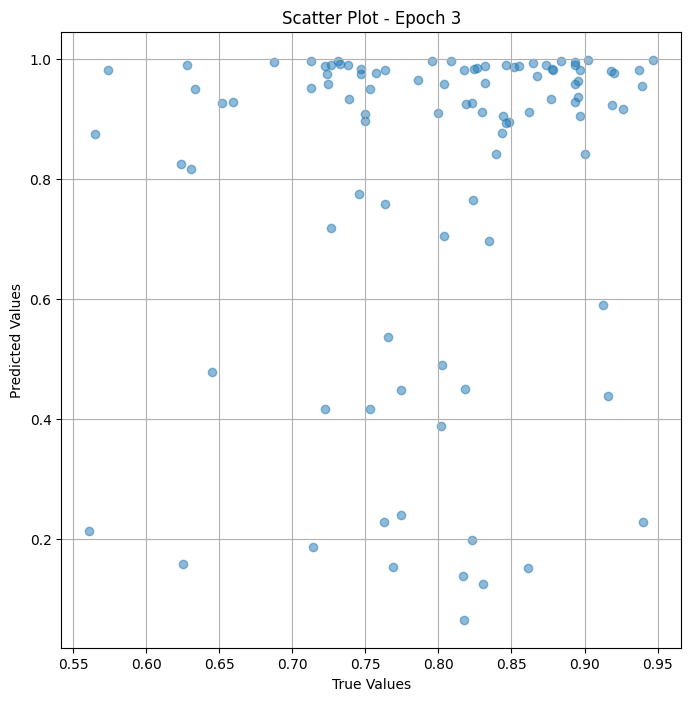


 Epoch: (4/50) Loss = 0.05932649224996567

 Epoch: (4/50) Loss_rmse = 0.24357029795646667

 Epoch: (4/50) R^2 = -6.919536113739014

 Epoch: (4/50) MAE = 0.2286781221628189

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.8433735, 0.9186992, 0.94, 0.8484849, 0.8969072, 0.8969072, 0.78571427, 0.56122446, 0.625, 0.87826085, 0.9, 0.7570093, 0.7628866, 0.9263158, 0.76344085, 0.8348624, 0.89361703, 0.65957445, 0.8172043, 0.82417583, 0.8165138, 0.71428573, 0.8021978, 0.8956522, 0.92, 0.6875, 0.89361703, 0.7380952, 0.85148513, 0.8933333, 0.7222222, 0.9126214, 0.6304348, 0.82653064, 0.91818184, 0.83, 0.5652174, 0.8037383, 0.9026549, 0.72380954, 0.82300884, 0.74561405, 0.712963, 0.7746479, 0.7529412, 0.8181818, 0.8736842, 0.82300884, 0.84444445, 0.94690263, 0.62376237, 0.7263158, 0.76363635, 0.7532467, 0.8301887, 0.6448598, 0.8235294, 0.8020833, 0.7741935, 0.7326733, 0.85542166, 0.9157895, 0.9369369, 0.8952381, 0.83168316, 0.7241379, 0.84615386, 0.86138

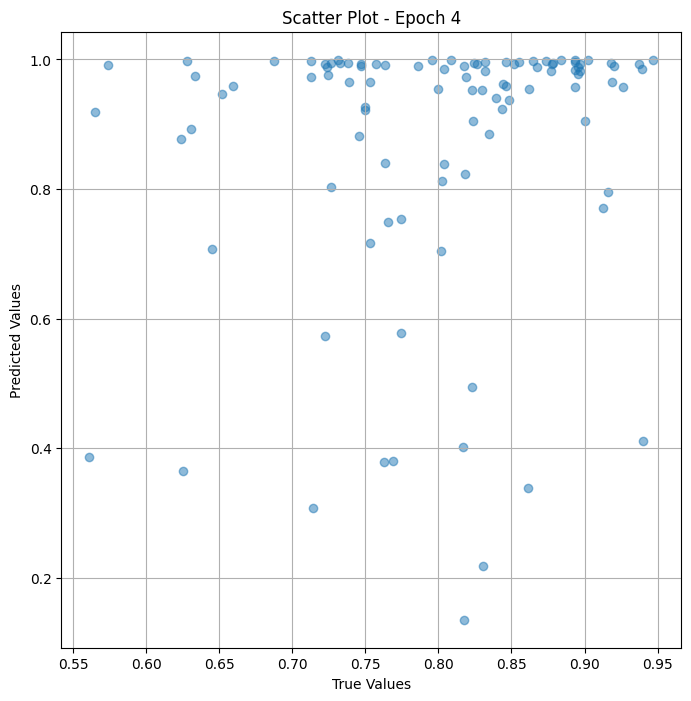


 Epoch: (5/50) Loss = 0.06318995356559753

 Epoch: (5/50) Loss_rmse = 0.25137612223625183

 Epoch: (5/50) R^2 = -7.435272216796875

 Epoch: (5/50) MAE = 0.23707006871700287

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.8433735, 0.9186992, 0.94, 0.8484849, 0.8969072, 0.8969072, 0.78571427, 0.56122446, 0.625, 0.87826085, 0.9, 0.7570093, 0.7628866, 0.9263158, 0.76344085, 0.8348624, 0.89361703, 0.65957445, 0.8172043, 0.82417583, 0.8165138, 0.71428573, 0.8021978, 0.8956522, 0.92, 0.6875, 0.89361703, 0.7380952, 0.85148513, 0.8933333, 0.7222222, 0.9126214, 0.6304348, 0.82653064, 0.91818184, 0.83, 0.5652174, 0.8037383, 0.9026549, 0.72380954, 0.82300884, 0.74561405, 0.712963, 0.7746479, 0.7529412, 0.8181818, 0.8736842, 0.82300884, 0.84444445, 0.94690263, 0.62376237, 0.7263158, 0.76363635, 0.7532467, 0.8301887, 0.6448598, 0.8235294, 0.8020833, 0.7741935, 0.7326733, 0.85542166, 0.9157895, 0.9369369, 0.8952381, 0.83168316, 0.7241379, 0.84615386, 0.8613

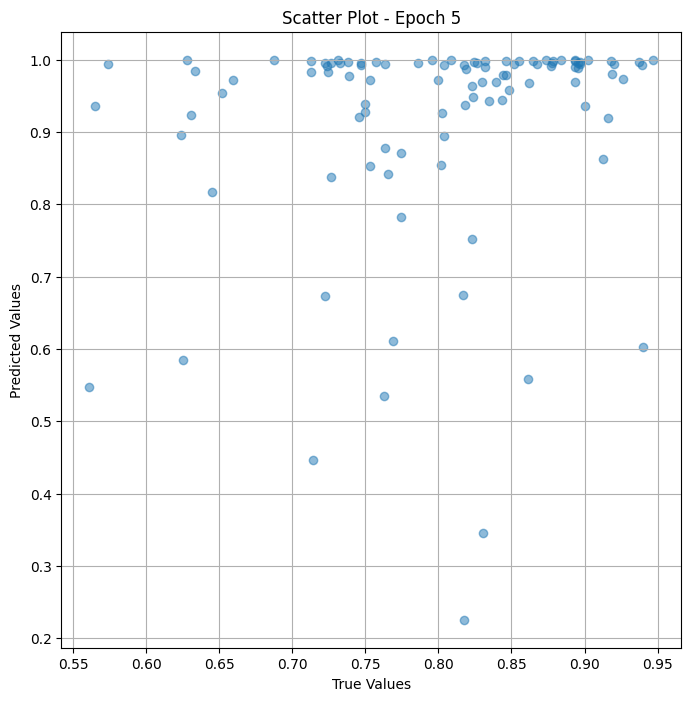


 Epoch: (6/50) Loss = 0.06452848017215729

 Epoch: (6/50) Loss_rmse = 0.25402456521987915

 Epoch: (6/50) R^2 = -7.613953590393066

 Epoch: (6/50) MAE = 0.23979434370994568

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.8433735, 0.9186992, 0.94, 0.8484849, 0.8969072, 0.8969072, 0.78571427, 0.56122446, 0.625, 0.87826085, 0.9, 0.7570093, 0.7628866, 0.9263158, 0.76344085, 0.8348624, 0.89361703, 0.65957445, 0.8172043, 0.82417583, 0.8165138, 0.71428573, 0.8021978, 0.8956522, 0.92, 0.6875, 0.89361703, 0.7380952, 0.85148513, 0.8933333, 0.7222222, 0.9126214, 0.6304348, 0.82653064, 0.91818184, 0.83, 0.5652174, 0.8037383, 0.9026549, 0.72380954, 0.82300884, 0.74561405, 0.712963, 0.7746479, 0.7529412, 0.8181818, 0.8736842, 0.82300884, 0.84444445, 0.94690263, 0.62376237, 0.7263158, 0.76363635, 0.7532467, 0.8301887, 0.6448598, 0.8235294, 0.8020833, 0.7741935, 0.7326733, 0.85542166, 0.9157895, 0.9369369, 0.8952381, 0.83168316, 0.7241379, 0.84615386, 0.8613

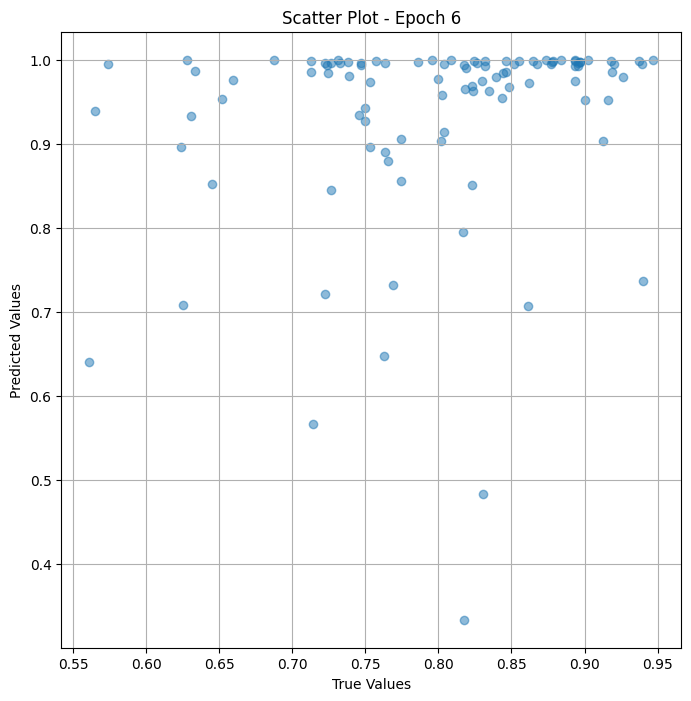


 Epoch: (7/50) Loss = 0.06472796946763992

 Epoch: (7/50) Loss_rmse = 0.25441691279411316

 Epoch: (7/50) R^2 = -7.640583038330078

 Epoch: (7/50) MAE = 0.24024070799350739

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.8433735, 0.9186992, 0.94, 0.8484849, 0.8969072, 0.8969072, 0.78571427, 0.56122446, 0.625, 0.87826085, 0.9, 0.7570093, 0.7628866, 0.9263158, 0.76344085, 0.8348624, 0.89361703, 0.65957445, 0.8172043, 0.82417583, 0.8165138, 0.71428573, 0.8021978, 0.8956522, 0.92, 0.6875, 0.89361703, 0.7380952, 0.85148513, 0.8933333, 0.7222222, 0.9126214, 0.6304348, 0.82653064, 0.91818184, 0.83, 0.5652174, 0.8037383, 0.9026549, 0.72380954, 0.82300884, 0.74561405, 0.712963, 0.7746479, 0.7529412, 0.8181818, 0.8736842, 0.82300884, 0.84444445, 0.94690263, 0.62376237, 0.7263158, 0.76363635, 0.7532467, 0.8301887, 0.6448598, 0.8235294, 0.8020833, 0.7741935, 0.7326733, 0.85542166, 0.9157895, 0.9369369, 0.8952381, 0.83168316, 0.7241379, 0.84615386, 0.8613

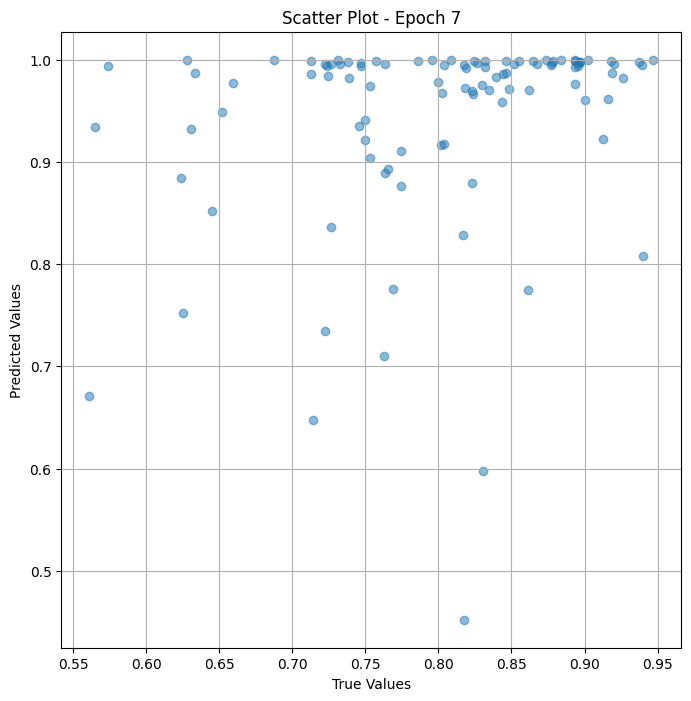


 Epoch: (8/50) Loss = 0.0641707256436348

 Epoch: (8/50) Loss_rmse = 0.2533194124698639

 Epoch: (8/50) R^2 = -7.566196441650391

 Epoch: (8/50) MAE = 0.23924589157104492

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.8433735, 0.9186992, 0.94, 0.8484849, 0.8969072, 0.8969072, 0.78571427, 0.56122446, 0.625, 0.87826085, 0.9, 0.7570093, 0.7628866, 0.9263158, 0.76344085, 0.8348624, 0.89361703, 0.65957445, 0.8172043, 0.82417583, 0.8165138, 0.71428573, 0.8021978, 0.8956522, 0.92, 0.6875, 0.89361703, 0.7380952, 0.85148513, 0.8933333, 0.7222222, 0.9126214, 0.6304348, 0.82653064, 0.91818184, 0.83, 0.5652174, 0.8037383, 0.9026549, 0.72380954, 0.82300884, 0.74561405, 0.712963, 0.7746479, 0.7529412, 0.8181818, 0.8736842, 0.82300884, 0.84444445, 0.94690263, 0.62376237, 0.7263158, 0.76363635, 0.7532467, 0.8301887, 0.6448598, 0.8235294, 0.8020833, 0.7741935, 0.7326733, 0.85542166, 0.9157895, 0.9369369, 0.8952381, 0.83168316, 0.7241379, 0.84615386, 0.861386


 Epoch: (9/50) Loss = 0.06286729872226715

 Epoch: (9/50) Loss_rmse = 0.25073352456092834

 Epoch: (9/50) R^2 = -7.3922014236450195

 Epoch: (9/50) MAE = 0.23684583604335785

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.8433735, 0.9186992, 0.94, 0.8484849, 0.8969072, 0.8969072, 0.78571427, 0.56122446, 0.625, 0.87826085, 0.9, 0.7570093, 0.7628866, 0.9263158, 0.76344085, 0.8348624, 0.89361703, 0.65957445, 0.8172043, 0.82417583, 0.8165138, 0.71428573, 0.8021978, 0.8956522, 0.92, 0.6875, 0.89361703, 0.7380952, 0.85148513, 0.8933333, 0.7222222, 0.9126214, 0.6304348, 0.82653064, 0.91818184, 0.83, 0.5652174, 0.8037383, 0.9026549, 0.72380954, 0.82300884, 0.74561405, 0.712963, 0.7746479, 0.7529412, 0.8181818, 0.8736842, 0.82300884, 0.84444445, 0.94690263, 0.62376237, 0.7263158, 0.76363635, 0.7532467, 0.8301887, 0.6448598, 0.8235294, 0.8020833, 0.7741935, 0.7326733, 0.85542166, 0.9157895, 0.9369369, 0.8952381, 0.83168316, 0.7241379, 0.84615386, 0.861


 Epoch: (10/50) Loss = 0.06067163869738579

 Epoch: (10/50) Loss_rmse = 0.24631613492965698

 Epoch: (10/50) R^2 = -7.0991010665893555

 Epoch: (10/50) MAE = 0.2327459752559662

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.8433735, 0.9186992, 0.94, 0.8484849, 0.8969072, 0.8969072, 0.78571427, 0.56122446, 0.625, 0.87826085, 0.9, 0.7570093, 0.7628866, 0.9263158, 0.76344085, 0.8348624, 0.89361703, 0.65957445, 0.8172043, 0.82417583, 0.8165138, 0.71428573, 0.8021978, 0.8956522, 0.92, 0.6875, 0.89361703, 0.7380952, 0.85148513, 0.8933333, 0.7222222, 0.9126214, 0.6304348, 0.82653064, 0.91818184, 0.83, 0.5652174, 0.8037383, 0.9026549, 0.72380954, 0.82300884, 0.74561405, 0.712963, 0.7746479, 0.7529412, 0.8181818, 0.8736842, 0.82300884, 0.84444445, 0.94690263, 0.62376237, 0.7263158, 0.76363635, 0.7532467, 0.8301887, 0.6448598, 0.8235294, 0.8020833, 0.7741935, 0.7326733, 0.85542166, 0.9157895, 0.9369369, 0.8952381, 0.83168316, 0.7241379, 0.84615386, 0.


 Epoch: (11/50) Loss = 0.05738304182887077

 Epoch: (11/50) Loss_rmse = 0.23954758048057556

 Epoch: (11/50) R^2 = -6.660103797912598

 Epoch: (11/50) MAE = 0.22650639712810516

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.8433735, 0.9186992, 0.94, 0.8484849, 0.8969072, 0.8969072, 0.78571427, 0.56122446, 0.625, 0.87826085, 0.9, 0.7570093, 0.7628866, 0.9263158, 0.76344085, 0.8348624, 0.89361703, 0.65957445, 0.8172043, 0.82417583, 0.8165138, 0.71428573, 0.8021978, 0.8956522, 0.92, 0.6875, 0.89361703, 0.7380952, 0.85148513, 0.8933333, 0.7222222, 0.9126214, 0.6304348, 0.82653064, 0.91818184, 0.83, 0.5652174, 0.8037383, 0.9026549, 0.72380954, 0.82300884, 0.74561405, 0.712963, 0.7746479, 0.7529412, 0.8181818, 0.8736842, 0.82300884, 0.84444445, 0.94690263, 0.62376237, 0.7263158, 0.76363635, 0.7532467, 0.8301887, 0.6448598, 0.8235294, 0.8020833, 0.7741935, 0.7326733, 0.85542166, 0.9157895, 0.9369369, 0.8952381, 0.83168316, 0.7241379, 0.84615386, 0.

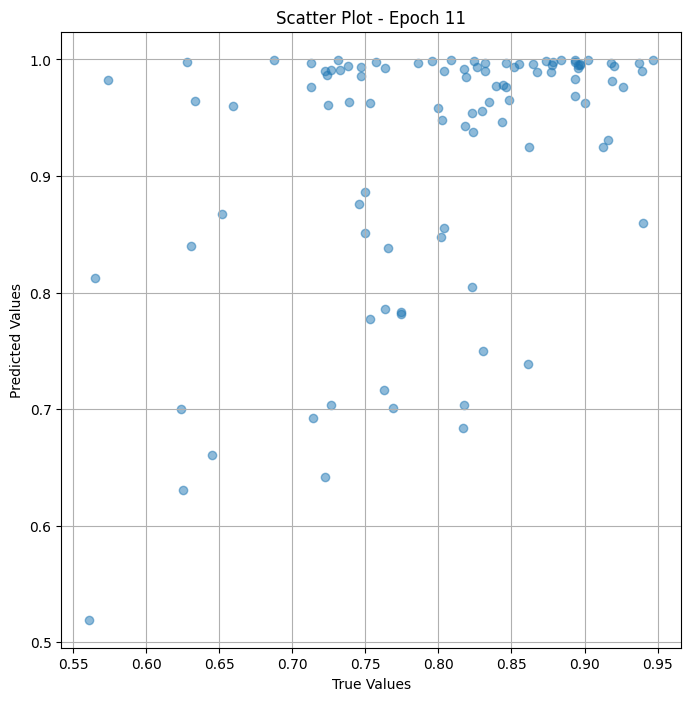


 Epoch: (12/50) Loss = 0.052744604647159576

 Epoch: (12/50) Loss_rmse = 0.2296619415283203

 Epoch: (12/50) R^2 = -6.040915489196777

 Epoch: (12/50) MAE = 0.2175064980983734

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.8433735, 0.9186992, 0.94, 0.8484849, 0.8969072, 0.8969072, 0.78571427, 0.56122446, 0.625, 0.87826085, 0.9, 0.7570093, 0.7628866, 0.9263158, 0.76344085, 0.8348624, 0.89361703, 0.65957445, 0.8172043, 0.82417583, 0.8165138, 0.71428573, 0.8021978, 0.8956522, 0.92, 0.6875, 0.89361703, 0.7380952, 0.85148513, 0.8933333, 0.7222222, 0.9126214, 0.6304348, 0.82653064, 0.91818184, 0.83, 0.5652174, 0.8037383, 0.9026549, 0.72380954, 0.82300884, 0.74561405, 0.712963, 0.7746479, 0.7529412, 0.8181818, 0.8736842, 0.82300884, 0.84444445, 0.94690263, 0.62376237, 0.7263158, 0.76363635, 0.7532467, 0.8301887, 0.6448598, 0.8235294, 0.8020833, 0.7741935, 0.7326733, 0.85542166, 0.9157895, 0.9369369, 0.8952381, 0.83168316, 0.7241379, 0.84615386, 0.8


 Epoch: (13/50) Loss = 0.04618018865585327

 Epoch: (13/50) Loss_rmse = 0.21489575505256653

 Epoch: (13/50) R^2 = -5.164626598358154

 Epoch: (13/50) MAE = 0.2042689472436905

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.8433735, 0.9186992, 0.94, 0.8484849, 0.8969072, 0.8969072, 0.78571427, 0.56122446, 0.625, 0.87826085, 0.9, 0.7570093, 0.7628866, 0.9263158, 0.76344085, 0.8348624, 0.89361703, 0.65957445, 0.8172043, 0.82417583, 0.8165138, 0.71428573, 0.8021978, 0.8956522, 0.92, 0.6875, 0.89361703, 0.7380952, 0.85148513, 0.8933333, 0.7222222, 0.9126214, 0.6304348, 0.82653064, 0.91818184, 0.83, 0.5652174, 0.8037383, 0.9026549, 0.72380954, 0.82300884, 0.74561405, 0.712963, 0.7746479, 0.7529412, 0.8181818, 0.8736842, 0.82300884, 0.84444445, 0.94690263, 0.62376237, 0.7263158, 0.76363635, 0.7532467, 0.8301887, 0.6448598, 0.8235294, 0.8020833, 0.7741935, 0.7326733, 0.85542166, 0.9157895, 0.9369369, 0.8952381, 0.83168316, 0.7241379, 0.84615386, 0.8

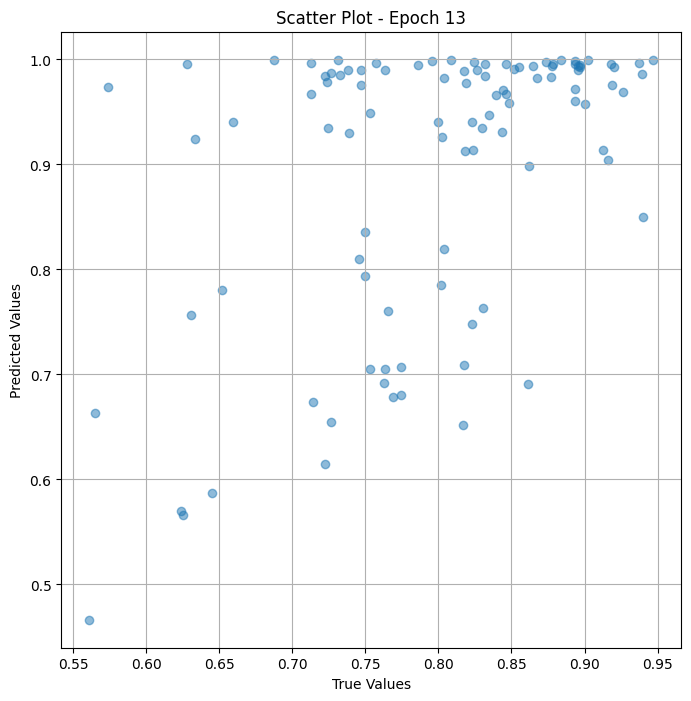


 Epoch: (14/50) Loss = 0.036394450813531876

 Epoch: (14/50) Loss_rmse = 0.19077329337596893

 Epoch: (14/50) R^2 = -3.8583216667175293

 Epoch: (14/50) MAE = 0.18276438117027283

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.8433735, 0.9186992, 0.94, 0.8484849, 0.8969072, 0.8969072, 0.78571427, 0.56122446, 0.625, 0.87826085, 0.9, 0.7570093, 0.7628866, 0.9263158, 0.76344085, 0.8348624, 0.89361703, 0.65957445, 0.8172043, 0.82417583, 0.8165138, 0.71428573, 0.8021978, 0.8956522, 0.92, 0.6875, 0.89361703, 0.7380952, 0.85148513, 0.8933333, 0.7222222, 0.9126214, 0.6304348, 0.82653064, 0.91818184, 0.83, 0.5652174, 0.8037383, 0.9026549, 0.72380954, 0.82300884, 0.74561405, 0.712963, 0.7746479, 0.7529412, 0.8181818, 0.8736842, 0.82300884, 0.84444445, 0.94690263, 0.62376237, 0.7263158, 0.76363635, 0.7532467, 0.8301887, 0.6448598, 0.8235294, 0.8020833, 0.7741935, 0.7326733, 0.85542166, 0.9157895, 0.9369369, 0.8952381, 0.83168316, 0.7241379, 0.84615386, 

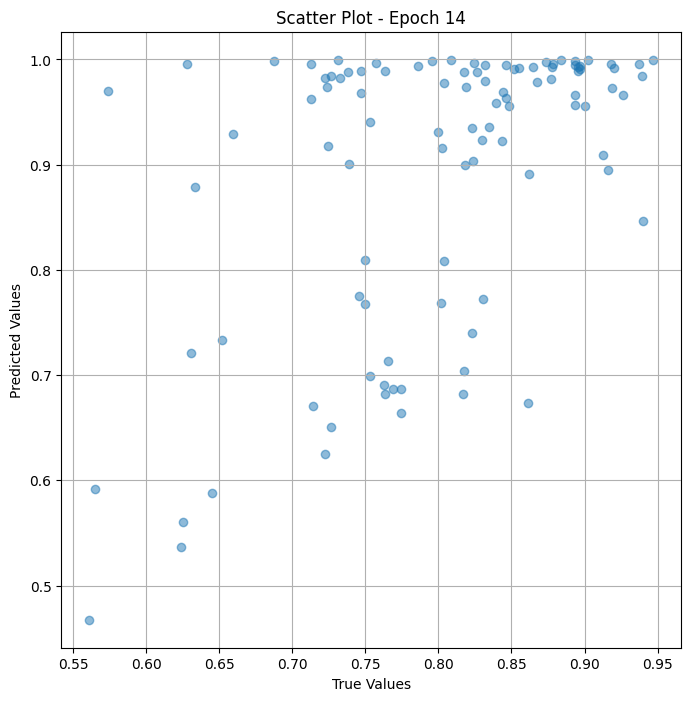


 Epoch: (15/50) Loss = 0.02252878248691559

 Epoch: (15/50) Loss_rmse = 0.15009590983390808

 Epoch: (15/50) R^2 = -2.007383346557617

 Epoch: (15/50) MAE = 0.14447249472141266

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.8433735, 0.9186992, 0.94, 0.8484849, 0.8969072, 0.8969072, 0.78571427, 0.56122446, 0.625, 0.87826085, 0.9, 0.7570093, 0.7628866, 0.9263158, 0.76344085, 0.8348624, 0.89361703, 0.65957445, 0.8172043, 0.82417583, 0.8165138, 0.71428573, 0.8021978, 0.8956522, 0.92, 0.6875, 0.89361703, 0.7380952, 0.85148513, 0.8933333, 0.7222222, 0.9126214, 0.6304348, 0.82653064, 0.91818184, 0.83, 0.5652174, 0.8037383, 0.9026549, 0.72380954, 0.82300884, 0.74561405, 0.712963, 0.7746479, 0.7529412, 0.8181818, 0.8736842, 0.82300884, 0.84444445, 0.94690263, 0.62376237, 0.7263158, 0.76363635, 0.7532467, 0.8301887, 0.6448598, 0.8235294, 0.8020833, 0.7741935, 0.7326733, 0.85542166, 0.9157895, 0.9369369, 0.8952381, 0.83168316, 0.7241379, 0.84615386, 0.

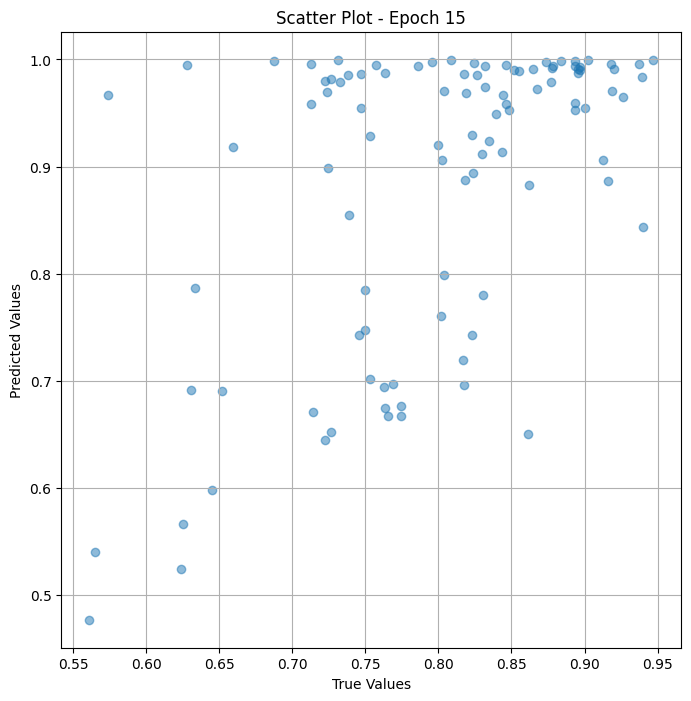


 Epoch: (16/50) Loss = 0.011454016901552677

 Epoch: (16/50) Loss_rmse = 0.1070234403014183

 Epoch: (16/50) R^2 = -0.5290049314498901

 Epoch: (16/50) MAE = 0.085642009973526

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.8433735, 0.9186992, 0.94, 0.8484849, 0.8969072, 0.8969072, 0.78571427, 0.56122446, 0.625, 0.87826085, 0.9, 0.7570093, 0.7628866, 0.9263158, 0.76344085, 0.8348624, 0.89361703, 0.65957445, 0.8172043, 0.82417583, 0.8165138, 0.71428573, 0.8021978, 0.8956522, 0.92, 0.6875, 0.89361703, 0.7380952, 0.85148513, 0.8933333, 0.7222222, 0.9126214, 0.6304348, 0.82653064, 0.91818184, 0.83, 0.5652174, 0.8037383, 0.9026549, 0.72380954, 0.82300884, 0.74561405, 0.712963, 0.7746479, 0.7529412, 0.8181818, 0.8736842, 0.82300884, 0.84444445, 0.94690263, 0.62376237, 0.7263158, 0.76363635, 0.7532467, 0.8301887, 0.6448598, 0.8235294, 0.8020833, 0.7741935, 0.7326733, 0.85542166, 0.9157895, 0.9369369, 0.8952381, 0.83168316, 0.7241379, 0.84615386, 0.8


 Epoch: (17/50) Loss = 0.007333977613598108

 Epoch: (17/50) Loss_rmse = 0.08563864231109619

 Epoch: (17/50) R^2 = 0.020982027053833008

 Epoch: (17/50) MAE = 0.07296140491962433

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.8433735, 0.9186992, 0.94, 0.8484849, 0.8969072, 0.8969072, 0.78571427, 0.56122446, 0.625, 0.87826085, 0.9, 0.7570093, 0.7628866, 0.9263158, 0.76344085, 0.8348624, 0.89361703, 0.65957445, 0.8172043, 0.82417583, 0.8165138, 0.71428573, 0.8021978, 0.8956522, 0.92, 0.6875, 0.89361703, 0.7380952, 0.85148513, 0.8933333, 0.7222222, 0.9126214, 0.6304348, 0.82653064, 0.91818184, 0.83, 0.5652174, 0.8037383, 0.9026549, 0.72380954, 0.82300884, 0.74561405, 0.712963, 0.7746479, 0.7529412, 0.8181818, 0.8736842, 0.82300884, 0.84444445, 0.94690263, 0.62376237, 0.7263158, 0.76363635, 0.7532467, 0.8301887, 0.6448598, 0.8235294, 0.8020833, 0.7741935, 0.7326733, 0.85542166, 0.9157895, 0.9369369, 0.8952381, 0.83168316, 0.7241379, 0.84615386,


 Epoch: (18/50) Loss = 0.002475457964465022

 Epoch: (18/50) Loss_rmse = 0.04975397512316704

 Epoch: (18/50) R^2 = 0.6695493459701538

 Epoch: (18/50) MAE = 0.03031294047832489

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.8433735, 0.9186992, 0.94, 0.8484849, 0.8969072, 0.8969072, 0.78571427, 0.56122446, 0.625, 0.87826085, 0.9, 0.7570093, 0.7628866, 0.9263158, 0.76344085, 0.8348624, 0.89361703, 0.65957445, 0.8172043, 0.82417583, 0.8165138, 0.71428573, 0.8021978, 0.8956522, 0.92, 0.6875, 0.89361703, 0.7380952, 0.85148513, 0.8933333, 0.7222222, 0.9126214, 0.6304348, 0.82653064, 0.91818184, 0.83, 0.5652174, 0.8037383, 0.9026549, 0.72380954, 0.82300884, 0.74561405, 0.712963, 0.7746479, 0.7529412, 0.8181818, 0.8736842, 0.82300884, 0.84444445, 0.94690263, 0.62376237, 0.7263158, 0.76363635, 0.7532467, 0.8301887, 0.6448598, 0.8235294, 0.8020833, 0.7741935, 0.7326733, 0.85542166, 0.9157895, 0.9369369, 0.8952381, 0.83168316, 0.7241379, 0.84615386, 0

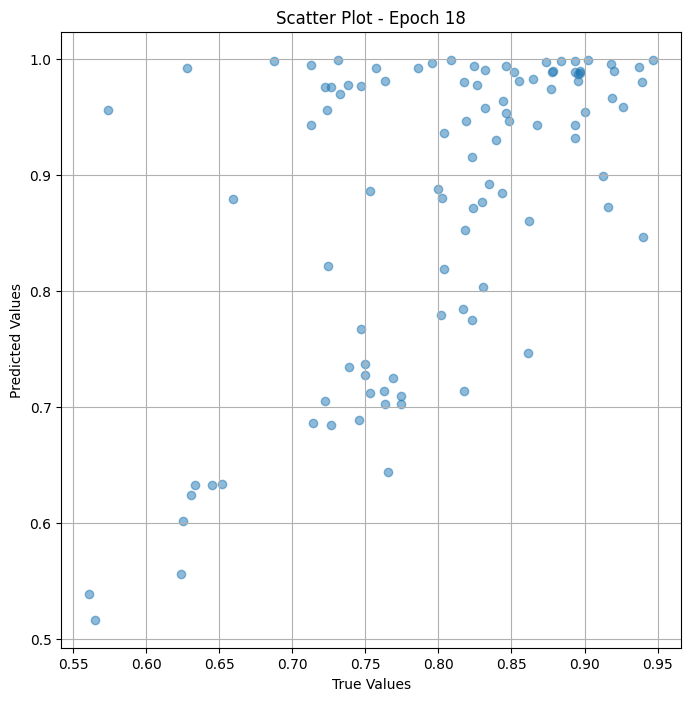


 Epoch: (19/50) Loss = 0.004501823335886002

 Epoch: (19/50) Loss_rmse = 0.06709562987089157

 Epoch: (19/50) R^2 = 0.3990483283996582

 Epoch: (19/50) MAE = 0.05342499911785126

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.8433735, 0.9186992, 0.94, 0.8484849, 0.8969072, 0.8969072, 0.78571427, 0.56122446, 0.625, 0.87826085, 0.9, 0.7570093, 0.7628866, 0.9263158, 0.76344085, 0.8348624, 0.89361703, 0.65957445, 0.8172043, 0.82417583, 0.8165138, 0.71428573, 0.8021978, 0.8956522, 0.92, 0.6875, 0.89361703, 0.7380952, 0.85148513, 0.8933333, 0.7222222, 0.9126214, 0.6304348, 0.82653064, 0.91818184, 0.83, 0.5652174, 0.8037383, 0.9026549, 0.72380954, 0.82300884, 0.74561405, 0.712963, 0.7746479, 0.7529412, 0.8181818, 0.8736842, 0.82300884, 0.84444445, 0.94690263, 0.62376237, 0.7263158, 0.76363635, 0.7532467, 0.8301887, 0.6448598, 0.8235294, 0.8020833, 0.7741935, 0.7326733, 0.85542166, 0.9157895, 0.9369369, 0.8952381, 0.83168316, 0.7241379, 0.84615386, 0


 Epoch: (20/50) Loss = 0.002205610740929842

 Epoch: (20/50) Loss_rmse = 0.04696393013000488

 Epoch: (20/50) R^2 = 0.7055714130401611

 Epoch: (20/50) MAE = 0.027669385075569153

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.8433735, 0.9186992, 0.94, 0.8484849, 0.8969072, 0.8969072, 0.78571427, 0.56122446, 0.625, 0.87826085, 0.9, 0.7570093, 0.7628866, 0.9263158, 0.76344085, 0.8348624, 0.89361703, 0.65957445, 0.8172043, 0.82417583, 0.8165138, 0.71428573, 0.8021978, 0.8956522, 0.92, 0.6875, 0.89361703, 0.7380952, 0.85148513, 0.8933333, 0.7222222, 0.9126214, 0.6304348, 0.82653064, 0.91818184, 0.83, 0.5652174, 0.8037383, 0.9026549, 0.72380954, 0.82300884, 0.74561405, 0.712963, 0.7746479, 0.7529412, 0.8181818, 0.8736842, 0.82300884, 0.84444445, 0.94690263, 0.62376237, 0.7263158, 0.76363635, 0.7532467, 0.8301887, 0.6448598, 0.8235294, 0.8020833, 0.7741935, 0.7326733, 0.85542166, 0.9157895, 0.9369369, 0.8952381, 0.83168316, 0.7241379, 0.84615386, 

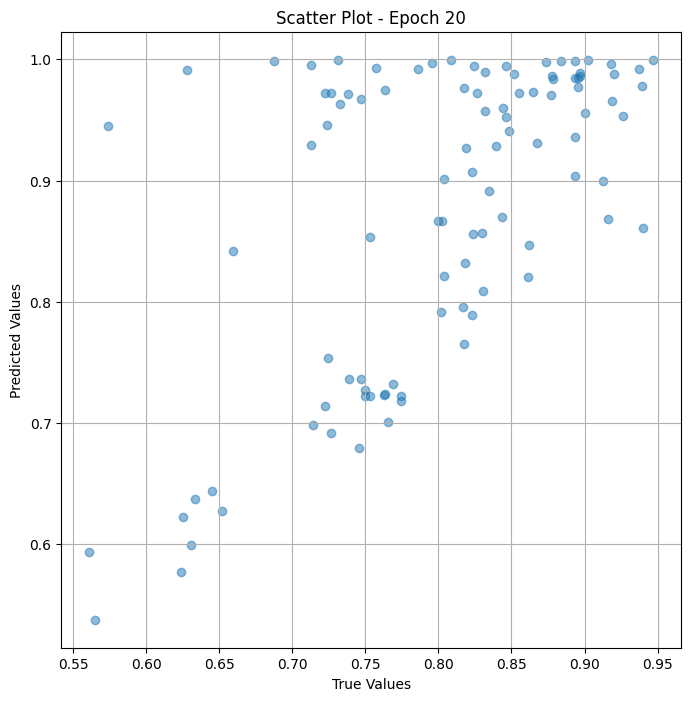


 Epoch: (21/50) Loss = 0.002256674226373434

 Epoch: (21/50) Loss_rmse = 0.04750446602702141

 Epoch: (21/50) R^2 = 0.6987549066543579

 Epoch: (21/50) MAE = 0.03594033420085907

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.8433735, 0.9186992, 0.94, 0.8484849, 0.8969072, 0.8969072, 0.78571427, 0.56122446, 0.625, 0.87826085, 0.9, 0.7570093, 0.7628866, 0.9263158, 0.76344085, 0.8348624, 0.89361703, 0.65957445, 0.8172043, 0.82417583, 0.8165138, 0.71428573, 0.8021978, 0.8956522, 0.92, 0.6875, 0.89361703, 0.7380952, 0.85148513, 0.8933333, 0.7222222, 0.9126214, 0.6304348, 0.82653064, 0.91818184, 0.83, 0.5652174, 0.8037383, 0.9026549, 0.72380954, 0.82300884, 0.74561405, 0.712963, 0.7746479, 0.7529412, 0.8181818, 0.8736842, 0.82300884, 0.84444445, 0.94690263, 0.62376237, 0.7263158, 0.76363635, 0.7532467, 0.8301887, 0.6448598, 0.8235294, 0.8020833, 0.7741935, 0.7326733, 0.85542166, 0.9157895, 0.9369369, 0.8952381, 0.83168316, 0.7241379, 0.84615386, 0

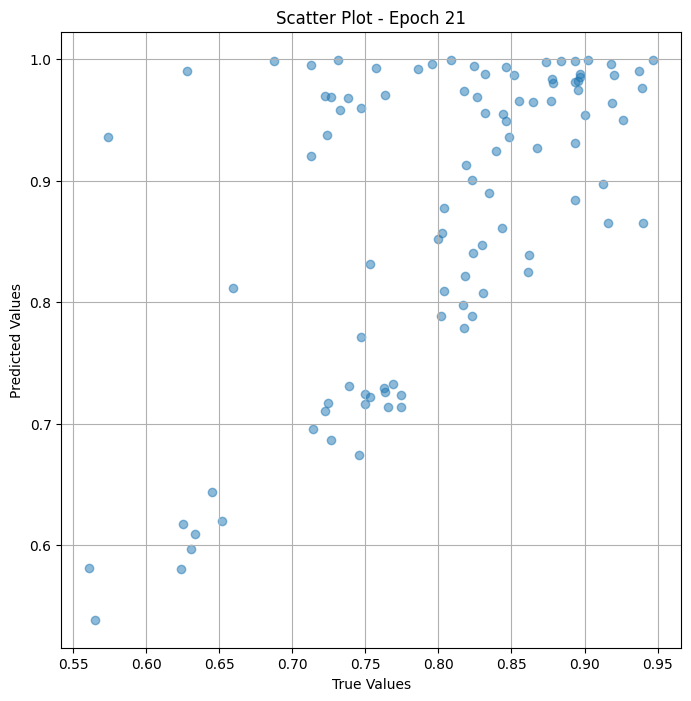


 Epoch: (22/50) Loss = 0.0018128638621419668

 Epoch: (22/50) Loss_rmse = 0.04257773980498314

 Epoch: (22/50) R^2 = 0.7579994797706604

 Epoch: (22/50) MAE = 0.027484595775604248

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.8433735, 0.9186992, 0.94, 0.8484849, 0.8969072, 0.8969072, 0.78571427, 0.56122446, 0.625, 0.87826085, 0.9, 0.7570093, 0.7628866, 0.9263158, 0.76344085, 0.8348624, 0.89361703, 0.65957445, 0.8172043, 0.82417583, 0.8165138, 0.71428573, 0.8021978, 0.8956522, 0.92, 0.6875, 0.89361703, 0.7380952, 0.85148513, 0.8933333, 0.7222222, 0.9126214, 0.6304348, 0.82653064, 0.91818184, 0.83, 0.5652174, 0.8037383, 0.9026549, 0.72380954, 0.82300884, 0.74561405, 0.712963, 0.7746479, 0.7529412, 0.8181818, 0.8736842, 0.82300884, 0.84444445, 0.94690263, 0.62376237, 0.7263158, 0.76363635, 0.7532467, 0.8301887, 0.6448598, 0.8235294, 0.8020833, 0.7741935, 0.7326733, 0.85542166, 0.9157895, 0.9369369, 0.8952381, 0.83168316, 0.7241379, 0.84615386,


 Epoch: (23/50) Loss = 0.0016259899130091071

 Epoch: (23/50) Loss_rmse = 0.040323566645383835

 Epoch: (23/50) R^2 = 0.782945454120636

 Epoch: (23/50) MAE = 0.02680213749408722

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.8433735, 0.9186992, 0.94, 0.8484849, 0.8969072, 0.8969072, 0.78571427, 0.56122446, 0.625, 0.87826085, 0.9, 0.7570093, 0.7628866, 0.9263158, 0.76344085, 0.8348624, 0.89361703, 0.65957445, 0.8172043, 0.82417583, 0.8165138, 0.71428573, 0.8021978, 0.8956522, 0.92, 0.6875, 0.89361703, 0.7380952, 0.85148513, 0.8933333, 0.7222222, 0.9126214, 0.6304348, 0.82653064, 0.91818184, 0.83, 0.5652174, 0.8037383, 0.9026549, 0.72380954, 0.82300884, 0.74561405, 0.712963, 0.7746479, 0.7529412, 0.8181818, 0.8736842, 0.82300884, 0.84444445, 0.94690263, 0.62376237, 0.7263158, 0.76363635, 0.7532467, 0.8301887, 0.6448598, 0.8235294, 0.8020833, 0.7741935, 0.7326733, 0.85542166, 0.9157895, 0.9369369, 0.8952381, 0.83168316, 0.7241379, 0.84615386, 


 Epoch: (24/50) Loss = 0.0013123294338583946

 Epoch: (24/50) Loss_rmse = 0.03622608631849289

 Epoch: (24/50) R^2 = 0.8248162269592285

 Epoch: (24/50) MAE = 0.02242255210876465

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.8433735, 0.9186992, 0.94, 0.8484849, 0.8969072, 0.8969072, 0.78571427, 0.56122446, 0.625, 0.87826085, 0.9, 0.7570093, 0.7628866, 0.9263158, 0.76344085, 0.8348624, 0.89361703, 0.65957445, 0.8172043, 0.82417583, 0.8165138, 0.71428573, 0.8021978, 0.8956522, 0.92, 0.6875, 0.89361703, 0.7380952, 0.85148513, 0.8933333, 0.7222222, 0.9126214, 0.6304348, 0.82653064, 0.91818184, 0.83, 0.5652174, 0.8037383, 0.9026549, 0.72380954, 0.82300884, 0.74561405, 0.712963, 0.7746479, 0.7529412, 0.8181818, 0.8736842, 0.82300884, 0.84444445, 0.94690263, 0.62376237, 0.7263158, 0.76363635, 0.7532467, 0.8301887, 0.6448598, 0.8235294, 0.8020833, 0.7741935, 0.7326733, 0.85542166, 0.9157895, 0.9369369, 0.8952381, 0.83168316, 0.7241379, 0.84615386, 

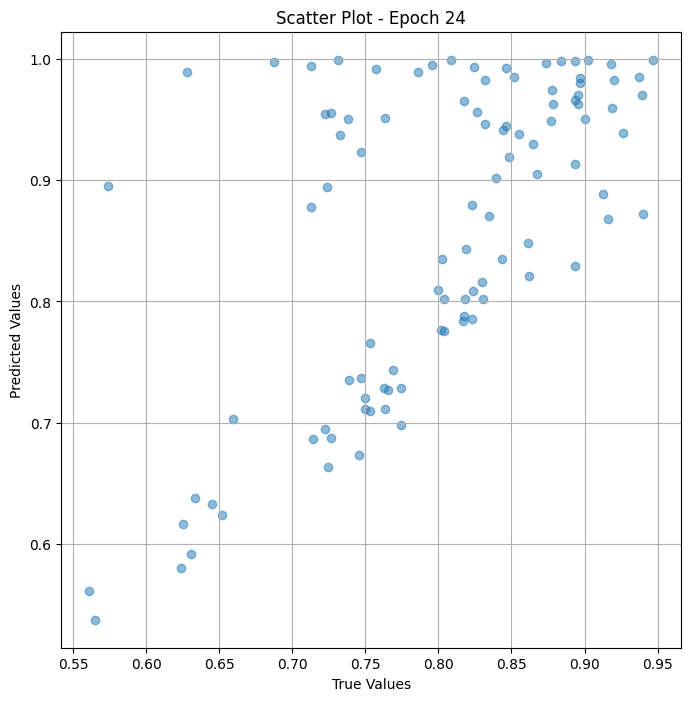


 Epoch: (25/50) Loss = 0.0010314966784790158

 Epoch: (25/50) Loss_rmse = 0.03211692348122597

 Epoch: (25/50) R^2 = 0.8623047471046448

 Epoch: (25/50) MAE = 0.018623650074005127

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.8433735, 0.9186992, 0.94, 0.8484849, 0.8969072, 0.8969072, 0.78571427, 0.56122446, 0.625, 0.87826085, 0.9, 0.7570093, 0.7628866, 0.9263158, 0.76344085, 0.8348624, 0.89361703, 0.65957445, 0.8172043, 0.82417583, 0.8165138, 0.71428573, 0.8021978, 0.8956522, 0.92, 0.6875, 0.89361703, 0.7380952, 0.85148513, 0.8933333, 0.7222222, 0.9126214, 0.6304348, 0.82653064, 0.91818184, 0.83, 0.5652174, 0.8037383, 0.9026549, 0.72380954, 0.82300884, 0.74561405, 0.712963, 0.7746479, 0.7529412, 0.8181818, 0.8736842, 0.82300884, 0.84444445, 0.94690263, 0.62376237, 0.7263158, 0.76363635, 0.7532467, 0.8301887, 0.6448598, 0.8235294, 0.8020833, 0.7741935, 0.7326733, 0.85542166, 0.9157895, 0.9369369, 0.8952381, 0.83168316, 0.7241379, 0.84615386,

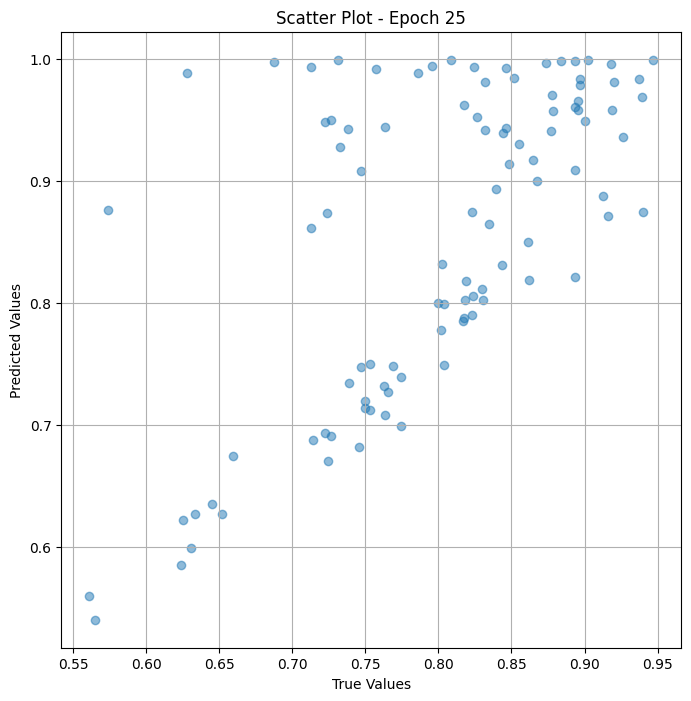


 Epoch: (26/50) Loss = 0.0007791084353812039

 Epoch: (26/50) Loss_rmse = 0.02791251428425312

 Epoch: (26/50) R^2 = 0.8959962725639343

 Epoch: (26/50) MAE = 0.01749315857887268

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.8433735, 0.9186992, 0.94, 0.8484849, 0.8969072, 0.8969072, 0.78571427, 0.56122446, 0.625, 0.87826085, 0.9, 0.7570093, 0.7628866, 0.9263158, 0.76344085, 0.8348624, 0.89361703, 0.65957445, 0.8172043, 0.82417583, 0.8165138, 0.71428573, 0.8021978, 0.8956522, 0.92, 0.6875, 0.89361703, 0.7380952, 0.85148513, 0.8933333, 0.7222222, 0.9126214, 0.6304348, 0.82653064, 0.91818184, 0.83, 0.5652174, 0.8037383, 0.9026549, 0.72380954, 0.82300884, 0.74561405, 0.712963, 0.7746479, 0.7529412, 0.8181818, 0.8736842, 0.82300884, 0.84444445, 0.94690263, 0.62376237, 0.7263158, 0.76363635, 0.7532467, 0.8301887, 0.6448598, 0.8235294, 0.8020833, 0.7741935, 0.7326733, 0.85542166, 0.9157895, 0.9369369, 0.8952381, 0.83168316, 0.7241379, 0.84615386, 

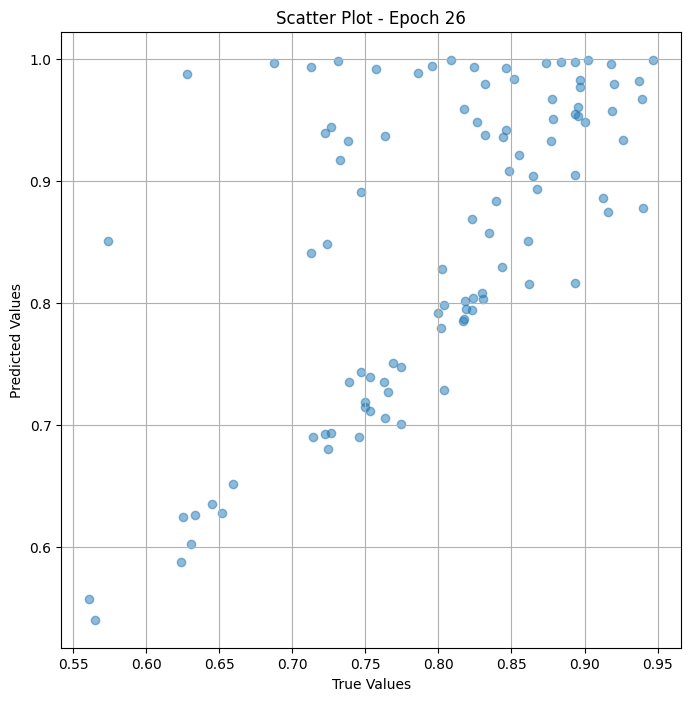


 Epoch: (27/50) Loss = 0.0005389004363678396

 Epoch: (27/50) Loss_rmse = 0.023214228451251984

 Epoch: (27/50) R^2 = 0.9280617833137512

 Epoch: (27/50) MAE = 0.01404881477355957

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.8433735, 0.9186992, 0.94, 0.8484849, 0.8969072, 0.8969072, 0.78571427, 0.56122446, 0.625, 0.87826085, 0.9, 0.7570093, 0.7628866, 0.9263158, 0.76344085, 0.8348624, 0.89361703, 0.65957445, 0.8172043, 0.82417583, 0.8165138, 0.71428573, 0.8021978, 0.8956522, 0.92, 0.6875, 0.89361703, 0.7380952, 0.85148513, 0.8933333, 0.7222222, 0.9126214, 0.6304348, 0.82653064, 0.91818184, 0.83, 0.5652174, 0.8037383, 0.9026549, 0.72380954, 0.82300884, 0.74561405, 0.712963, 0.7746479, 0.7529412, 0.8181818, 0.8736842, 0.82300884, 0.84444445, 0.94690263, 0.62376237, 0.7263158, 0.76363635, 0.7532467, 0.8301887, 0.6448598, 0.8235294, 0.8020833, 0.7741935, 0.7326733, 0.85542166, 0.9157895, 0.9369369, 0.8952381, 0.83168316, 0.7241379, 0.84615386,


 Epoch: (28/50) Loss = 0.0003196783654857427

 Epoch: (28/50) Loss_rmse = 0.017879551276564598

 Epoch: (28/50) R^2 = 0.9573259353637695

 Epoch: (28/50) MAE = 0.010360807180404663

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.8433735, 0.9186992, 0.94, 0.8484849, 0.8969072, 0.8969072, 0.78571427, 0.56122446, 0.625, 0.87826085, 0.9, 0.7570093, 0.7628866, 0.9263158, 0.76344085, 0.8348624, 0.89361703, 0.65957445, 0.8172043, 0.82417583, 0.8165138, 0.71428573, 0.8021978, 0.8956522, 0.92, 0.6875, 0.89361703, 0.7380952, 0.85148513, 0.8933333, 0.7222222, 0.9126214, 0.6304348, 0.82653064, 0.91818184, 0.83, 0.5652174, 0.8037383, 0.9026549, 0.72380954, 0.82300884, 0.74561405, 0.712963, 0.7746479, 0.7529412, 0.8181818, 0.8736842, 0.82300884, 0.84444445, 0.94690263, 0.62376237, 0.7263158, 0.76363635, 0.7532467, 0.8301887, 0.6448598, 0.8235294, 0.8020833, 0.7741935, 0.7326733, 0.85542166, 0.9157895, 0.9369369, 0.8952381, 0.83168316, 0.7241379, 0.84615386

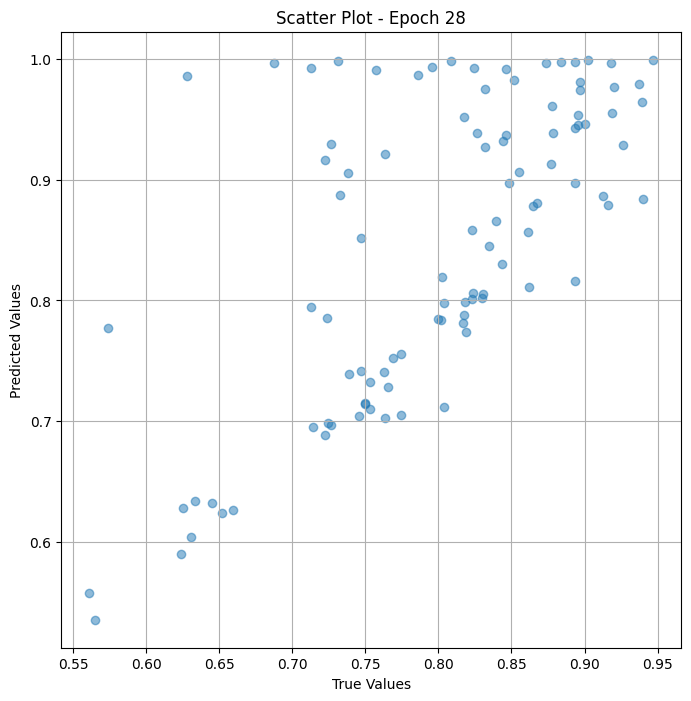


 Epoch: (29/50) Loss = 0.00015530700329691172

 Epoch: (29/50) Loss_rmse = 0.012462222948670387

 Epoch: (29/50) R^2 = 0.979267954826355

 Epoch: (29/50) MAE = 0.007462099194526672

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.8433735, 0.9186992, 0.94, 0.8484849, 0.8969072, 0.8969072, 0.78571427, 0.56122446, 0.625, 0.87826085, 0.9, 0.7570093, 0.7628866, 0.9263158, 0.76344085, 0.8348624, 0.89361703, 0.65957445, 0.8172043, 0.82417583, 0.8165138, 0.71428573, 0.8021978, 0.8956522, 0.92, 0.6875, 0.89361703, 0.7380952, 0.85148513, 0.8933333, 0.7222222, 0.9126214, 0.6304348, 0.82653064, 0.91818184, 0.83, 0.5652174, 0.8037383, 0.9026549, 0.72380954, 0.82300884, 0.74561405, 0.712963, 0.7746479, 0.7529412, 0.8181818, 0.8736842, 0.82300884, 0.84444445, 0.94690263, 0.62376237, 0.7263158, 0.76363635, 0.7532467, 0.8301887, 0.6448598, 0.8235294, 0.8020833, 0.7741935, 0.7326733, 0.85542166, 0.9157895, 0.9369369, 0.8952381, 0.83168316, 0.7241379, 0.84615386

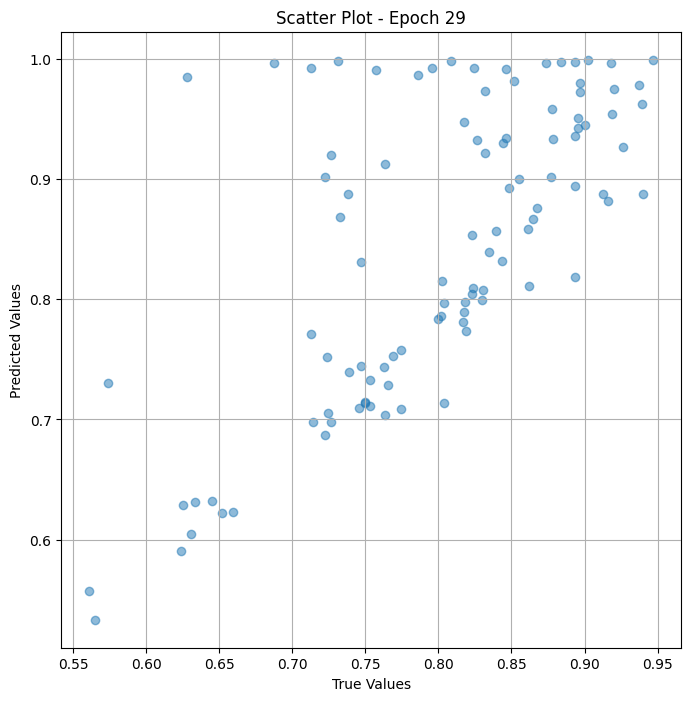


 Epoch: (30/50) Loss = 6.219913484528661e-05

 Epoch: (30/50) Loss_rmse = 0.007886642590165138

 Epoch: (30/50) R^2 = 0.9916970133781433

 Epoch: (30/50) MAE = 0.005024269223213196

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.8433735, 0.9186992, 0.94, 0.8484849, 0.8969072, 0.8969072, 0.78571427, 0.56122446, 0.625, 0.87826085, 0.9, 0.7570093, 0.7628866, 0.9263158, 0.76344085, 0.8348624, 0.89361703, 0.65957445, 0.8172043, 0.82417583, 0.8165138, 0.71428573, 0.8021978, 0.8956522, 0.92, 0.6875, 0.89361703, 0.7380952, 0.85148513, 0.8933333, 0.7222222, 0.9126214, 0.6304348, 0.82653064, 0.91818184, 0.83, 0.5652174, 0.8037383, 0.9026549, 0.72380954, 0.82300884, 0.74561405, 0.712963, 0.7746479, 0.7529412, 0.8181818, 0.8736842, 0.82300884, 0.84444445, 0.94690263, 0.62376237, 0.7263158, 0.76363635, 0.7532467, 0.8301887, 0.6448598, 0.8235294, 0.8020833, 0.7741935, 0.7326733, 0.85542166, 0.9157895, 0.9369369, 0.8952381, 0.83168316, 0.7241379, 0.84615386

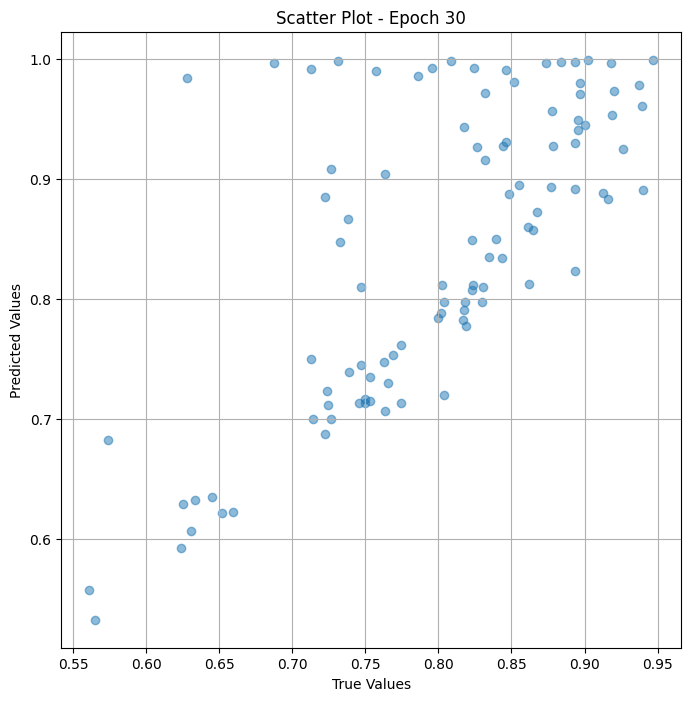


 Epoch: (31/50) Loss = 2.1158413801458664e-05

 Epoch: (31/50) Loss_rmse = 0.00459982780739665

 Epoch: (31/50) R^2 = 0.9971755743026733

 Epoch: (31/50) MAE = 0.003234267234802246

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.8433735, 0.9186992, 0.94, 0.8484849, 0.8969072, 0.8969072, 0.78571427, 0.56122446, 0.625, 0.87826085, 0.9, 0.7570093, 0.7628866, 0.9263158, 0.76344085, 0.8348624, 0.89361703, 0.65957445, 0.8172043, 0.82417583, 0.8165138, 0.71428573, 0.8021978, 0.8956522, 0.92, 0.6875, 0.89361703, 0.7380952, 0.85148513, 0.8933333, 0.7222222, 0.9126214, 0.6304348, 0.82653064, 0.91818184, 0.83, 0.5652174, 0.8037383, 0.9026549, 0.72380954, 0.82300884, 0.74561405, 0.712963, 0.7746479, 0.7529412, 0.8181818, 0.8736842, 0.82300884, 0.84444445, 0.94690263, 0.62376237, 0.7263158, 0.76363635, 0.7532467, 0.8301887, 0.6448598, 0.8235294, 0.8020833, 0.7741935, 0.7326733, 0.85542166, 0.9157895, 0.9369369, 0.8952381, 0.83168316, 0.7241379, 0.84615386

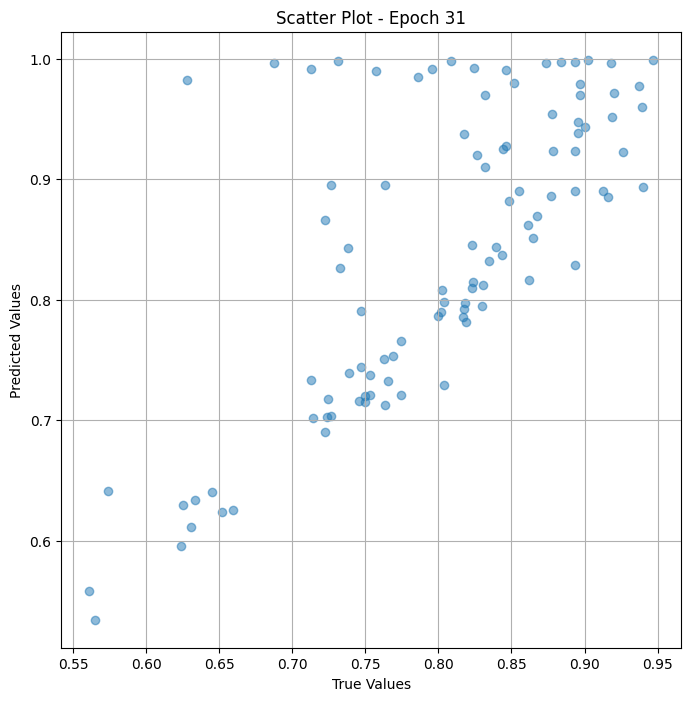


 Epoch: (32/50) Loss = 6.1636501413886435e-06

 Epoch: (32/50) Loss_rmse = 0.0024826698936522007

 Epoch: (32/50) R^2 = 0.9991772174835205

 Epoch: (32/50) MAE = 0.001977965235710144

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.8433735, 0.9186992, 0.94, 0.8484849, 0.8969072, 0.8969072, 0.78571427, 0.56122446, 0.625, 0.87826085, 0.9, 0.7570093, 0.7628866, 0.9263158, 0.76344085, 0.8348624, 0.89361703, 0.65957445, 0.8172043, 0.82417583, 0.8165138, 0.71428573, 0.8021978, 0.8956522, 0.92, 0.6875, 0.89361703, 0.7380952, 0.85148513, 0.8933333, 0.7222222, 0.9126214, 0.6304348, 0.82653064, 0.91818184, 0.83, 0.5652174, 0.8037383, 0.9026549, 0.72380954, 0.82300884, 0.74561405, 0.712963, 0.7746479, 0.7529412, 0.8181818, 0.8736842, 0.82300884, 0.84444445, 0.94690263, 0.62376237, 0.7263158, 0.76363635, 0.7532467, 0.8301887, 0.6448598, 0.8235294, 0.8020833, 0.7741935, 0.7326733, 0.85542166, 0.9157895, 0.9369369, 0.8952381, 0.83168316, 0.7241379, 0.846153

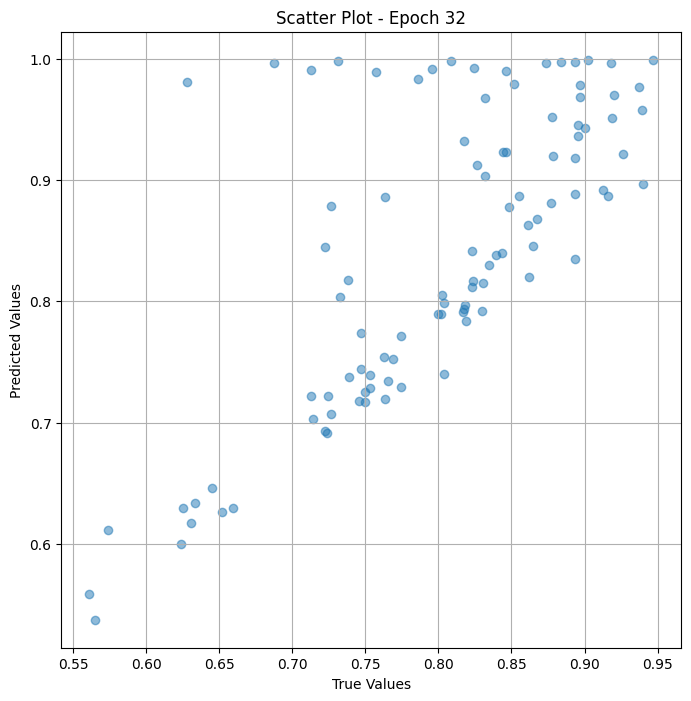


 Epoch: (33/50) Loss = 2.576107817731099e-06

 Epoch: (33/50) Loss_rmse = 0.0016050258418545127

 Epoch: (33/50) R^2 = 0.9996561408042908

 Epoch: (33/50) MAE = 0.0014694780111312866

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.8433735, 0.9186992, 0.94, 0.8484849, 0.8969072, 0.8969072, 0.78571427, 0.56122446, 0.625, 0.87826085, 0.9, 0.7570093, 0.7628866, 0.9263158, 0.76344085, 0.8348624, 0.89361703, 0.65957445, 0.8172043, 0.82417583, 0.8165138, 0.71428573, 0.8021978, 0.8956522, 0.92, 0.6875, 0.89361703, 0.7380952, 0.85148513, 0.8933333, 0.7222222, 0.9126214, 0.6304348, 0.82653064, 0.91818184, 0.83, 0.5652174, 0.8037383, 0.9026549, 0.72380954, 0.82300884, 0.74561405, 0.712963, 0.7746479, 0.7529412, 0.8181818, 0.8736842, 0.82300884, 0.84444445, 0.94690263, 0.62376237, 0.7263158, 0.76363635, 0.7532467, 0.8301887, 0.6448598, 0.8235294, 0.8020833, 0.7741935, 0.7326733, 0.85542166, 0.9157895, 0.9369369, 0.8952381, 0.83168316, 0.7241379, 0.846153

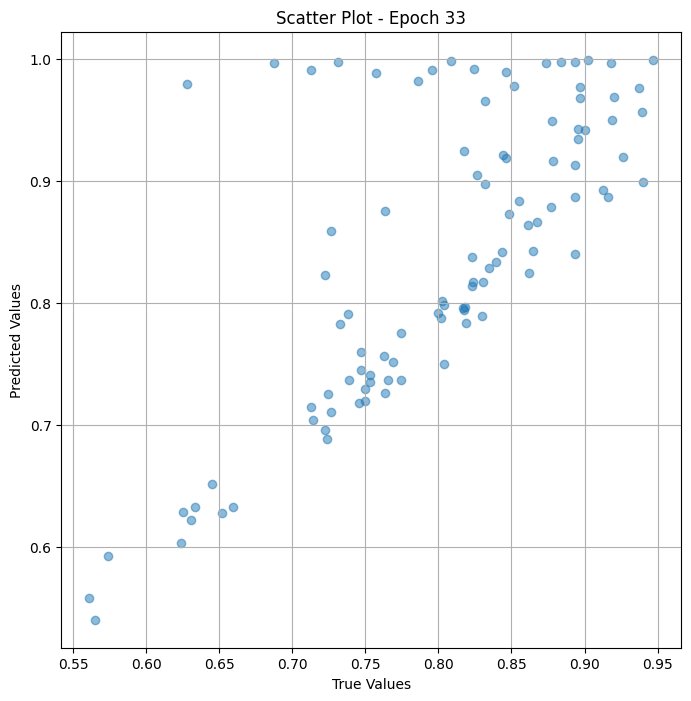


 Epoch: (34/50) Loss = 1.9014333929590066e-06

 Epoch: (34/50) Loss_rmse = 0.0013789247022941709

 Epoch: (34/50) R^2 = 0.9997462034225464

 Epoch: (34/50) MAE = 0.0011167675256729126

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.8433735, 0.9186992, 0.94, 0.8484849, 0.8969072, 0.8969072, 0.78571427, 0.56122446, 0.625, 0.87826085, 0.9, 0.7570093, 0.7628866, 0.9263158, 0.76344085, 0.8348624, 0.89361703, 0.65957445, 0.8172043, 0.82417583, 0.8165138, 0.71428573, 0.8021978, 0.8956522, 0.92, 0.6875, 0.89361703, 0.7380952, 0.85148513, 0.8933333, 0.7222222, 0.9126214, 0.6304348, 0.82653064, 0.91818184, 0.83, 0.5652174, 0.8037383, 0.9026549, 0.72380954, 0.82300884, 0.74561405, 0.712963, 0.7746479, 0.7529412, 0.8181818, 0.8736842, 0.82300884, 0.84444445, 0.94690263, 0.62376237, 0.7263158, 0.76363635, 0.7532467, 0.8301887, 0.6448598, 0.8235294, 0.8020833, 0.7741935, 0.7326733, 0.85542166, 0.9157895, 0.9369369, 0.8952381, 0.83168316, 0.7241379, 0.84615


 Epoch: (35/50) Loss = 1.610355297998467e-06

 Epoch: (35/50) Loss_rmse = 0.0012689977884292603

 Epoch: (35/50) R^2 = 0.9997850060462952

 Epoch: (35/50) MAE = 0.0011253952980041504

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.8433735, 0.9186992, 0.94, 0.8484849, 0.8969072, 0.8969072, 0.78571427, 0.56122446, 0.625, 0.87826085, 0.9, 0.7570093, 0.7628866, 0.9263158, 0.76344085, 0.8348624, 0.89361703, 0.65957445, 0.8172043, 0.82417583, 0.8165138, 0.71428573, 0.8021978, 0.8956522, 0.92, 0.6875, 0.89361703, 0.7380952, 0.85148513, 0.8933333, 0.7222222, 0.9126214, 0.6304348, 0.82653064, 0.91818184, 0.83, 0.5652174, 0.8037383, 0.9026549, 0.72380954, 0.82300884, 0.74561405, 0.712963, 0.7746479, 0.7529412, 0.8181818, 0.8736842, 0.82300884, 0.84444445, 0.94690263, 0.62376237, 0.7263158, 0.76363635, 0.7532467, 0.8301887, 0.6448598, 0.8235294, 0.8020833, 0.7741935, 0.7326733, 0.85542166, 0.9157895, 0.9369369, 0.8952381, 0.83168316, 0.7241379, 0.846153

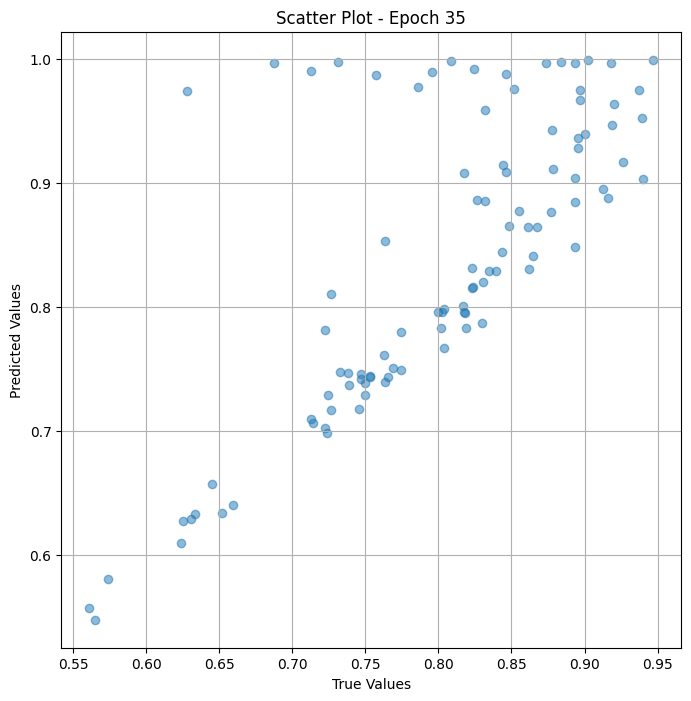


 Epoch: (36/50) Loss = 1.6485985270264791e-06

 Epoch: (36/50) Loss_rmse = 0.001283977646380663

 Epoch: (36/50) R^2 = 0.9997799396514893

 Epoch: (36/50) MAE = 0.0012355595827102661

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.8433735, 0.9186992, 0.94, 0.8484849, 0.8969072, 0.8969072, 0.78571427, 0.56122446, 0.625, 0.87826085, 0.9, 0.7570093, 0.7628866, 0.9263158, 0.76344085, 0.8348624, 0.89361703, 0.65957445, 0.8172043, 0.82417583, 0.8165138, 0.71428573, 0.8021978, 0.8956522, 0.92, 0.6875, 0.89361703, 0.7380952, 0.85148513, 0.8933333, 0.7222222, 0.9126214, 0.6304348, 0.82653064, 0.91818184, 0.83, 0.5652174, 0.8037383, 0.9026549, 0.72380954, 0.82300884, 0.74561405, 0.712963, 0.7746479, 0.7529412, 0.8181818, 0.8736842, 0.82300884, 0.84444445, 0.94690263, 0.62376237, 0.7263158, 0.76363635, 0.7532467, 0.8301887, 0.6448598, 0.8235294, 0.8020833, 0.7741935, 0.7326733, 0.85542166, 0.9157895, 0.9369369, 0.8952381, 0.83168316, 0.7241379, 0.846153


 Epoch: (37/50) Loss = 2.012776803894667e-06

 Epoch: (37/50) Loss_rmse = 0.001418723608367145

 Epoch: (37/50) R^2 = 0.9997313022613525

 Epoch: (37/50) MAE = 0.00136604905128479

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.8433735, 0.9186992, 0.94, 0.8484849, 0.8969072, 0.8969072, 0.78571427, 0.56122446, 0.625, 0.87826085, 0.9, 0.7570093, 0.7628866, 0.9263158, 0.76344085, 0.8348624, 0.89361703, 0.65957445, 0.8172043, 0.82417583, 0.8165138, 0.71428573, 0.8021978, 0.8956522, 0.92, 0.6875, 0.89361703, 0.7380952, 0.85148513, 0.8933333, 0.7222222, 0.9126214, 0.6304348, 0.82653064, 0.91818184, 0.83, 0.5652174, 0.8037383, 0.9026549, 0.72380954, 0.82300884, 0.74561405, 0.712963, 0.7746479, 0.7529412, 0.8181818, 0.8736842, 0.82300884, 0.84444445, 0.94690263, 0.62376237, 0.7263158, 0.76363635, 0.7532467, 0.8301887, 0.6448598, 0.8235294, 0.8020833, 0.7741935, 0.7326733, 0.85542166, 0.9157895, 0.9369369, 0.8952381, 0.83168316, 0.7241379, 0.84615386,


 Epoch: (38/50) Loss = 2.5775386802706635e-06

 Epoch: (38/50) Loss_rmse = 0.0016054714797064662

 Epoch: (38/50) R^2 = 0.9996559023857117

 Epoch: (38/50) MAE = 0.001520499587059021

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.8433735, 0.9186992, 0.94, 0.8484849, 0.8969072, 0.8969072, 0.78571427, 0.56122446, 0.625, 0.87826085, 0.9, 0.7570093, 0.7628866, 0.9263158, 0.76344085, 0.8348624, 0.89361703, 0.65957445, 0.8172043, 0.82417583, 0.8165138, 0.71428573, 0.8021978, 0.8956522, 0.92, 0.6875, 0.89361703, 0.7380952, 0.85148513, 0.8933333, 0.7222222, 0.9126214, 0.6304348, 0.82653064, 0.91818184, 0.83, 0.5652174, 0.8037383, 0.9026549, 0.72380954, 0.82300884, 0.74561405, 0.712963, 0.7746479, 0.7529412, 0.8181818, 0.8736842, 0.82300884, 0.84444445, 0.94690263, 0.62376237, 0.7263158, 0.76363635, 0.7532467, 0.8301887, 0.6448598, 0.8235294, 0.8020833, 0.7741935, 0.7326733, 0.85542166, 0.9157895, 0.9369369, 0.8952381, 0.83168316, 0.7241379, 0.846153

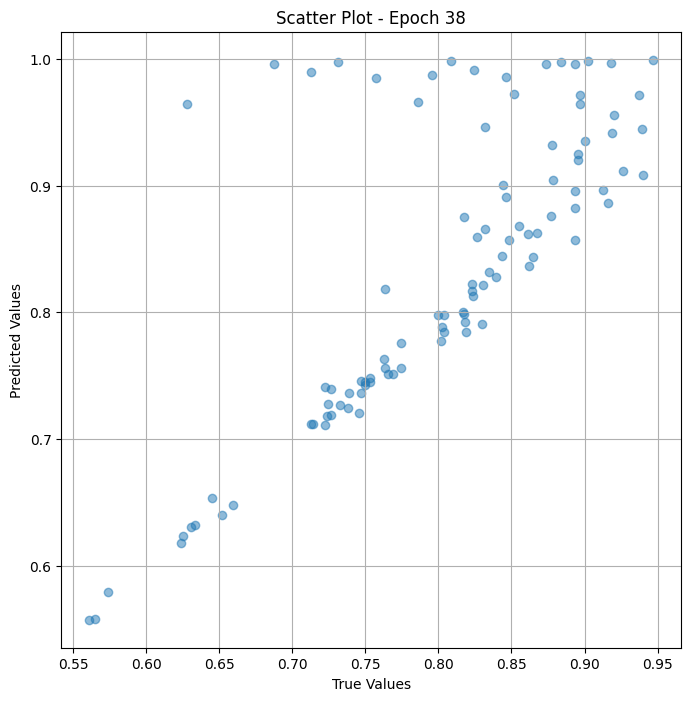


 Epoch: (39/50) Loss = 3.058335323657957e-06

 Epoch: (39/50) Loss_rmse = 0.001748809707351029

 Epoch: (39/50) R^2 = 0.9995917677879333

 Epoch: (39/50) MAE = 0.0016410201787948608

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.8433735, 0.9186992, 0.94, 0.8484849, 0.8969072, 0.8969072, 0.78571427, 0.56122446, 0.625, 0.87826085, 0.9, 0.7570093, 0.7628866, 0.9263158, 0.76344085, 0.8348624, 0.89361703, 0.65957445, 0.8172043, 0.82417583, 0.8165138, 0.71428573, 0.8021978, 0.8956522, 0.92, 0.6875, 0.89361703, 0.7380952, 0.85148513, 0.8933333, 0.7222222, 0.9126214, 0.6304348, 0.82653064, 0.91818184, 0.83, 0.5652174, 0.8037383, 0.9026549, 0.72380954, 0.82300884, 0.74561405, 0.712963, 0.7746479, 0.7529412, 0.8181818, 0.8736842, 0.82300884, 0.84444445, 0.94690263, 0.62376237, 0.7263158, 0.76363635, 0.7532467, 0.8301887, 0.6448598, 0.8235294, 0.8020833, 0.7741935, 0.7326733, 0.85542166, 0.9157895, 0.9369369, 0.8952381, 0.83168316, 0.7241379, 0.8461538

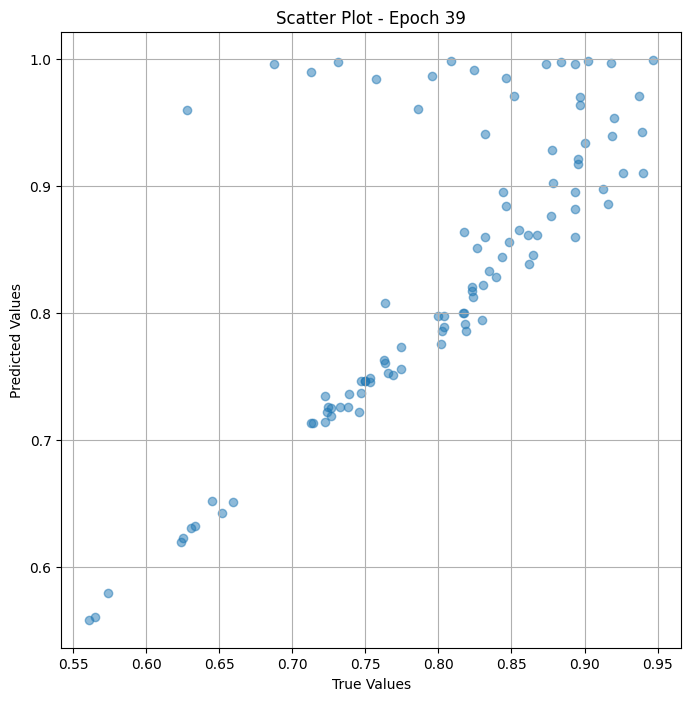


 Epoch: (40/50) Loss = 3.1135646167967934e-06

 Epoch: (40/50) Loss_rmse = 0.0017645296175032854

 Epoch: (40/50) R^2 = 0.9995843768119812

 Epoch: (40/50) MAE = 0.0016444027423858643

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.8433735, 0.9186992, 0.94, 0.8484849, 0.8969072, 0.8969072, 0.78571427, 0.56122446, 0.625, 0.87826085, 0.9, 0.7570093, 0.7628866, 0.9263158, 0.76344085, 0.8348624, 0.89361703, 0.65957445, 0.8172043, 0.82417583, 0.8165138, 0.71428573, 0.8021978, 0.8956522, 0.92, 0.6875, 0.89361703, 0.7380952, 0.85148513, 0.8933333, 0.7222222, 0.9126214, 0.6304348, 0.82653064, 0.91818184, 0.83, 0.5652174, 0.8037383, 0.9026549, 0.72380954, 0.82300884, 0.74561405, 0.712963, 0.7746479, 0.7529412, 0.8181818, 0.8736842, 0.82300884, 0.84444445, 0.94690263, 0.62376237, 0.7263158, 0.76363635, 0.7532467, 0.8301887, 0.6448598, 0.8235294, 0.8020833, 0.7741935, 0.7326733, 0.85542166, 0.9157895, 0.9369369, 0.8952381, 0.83168316, 0.7241379, 0.84615

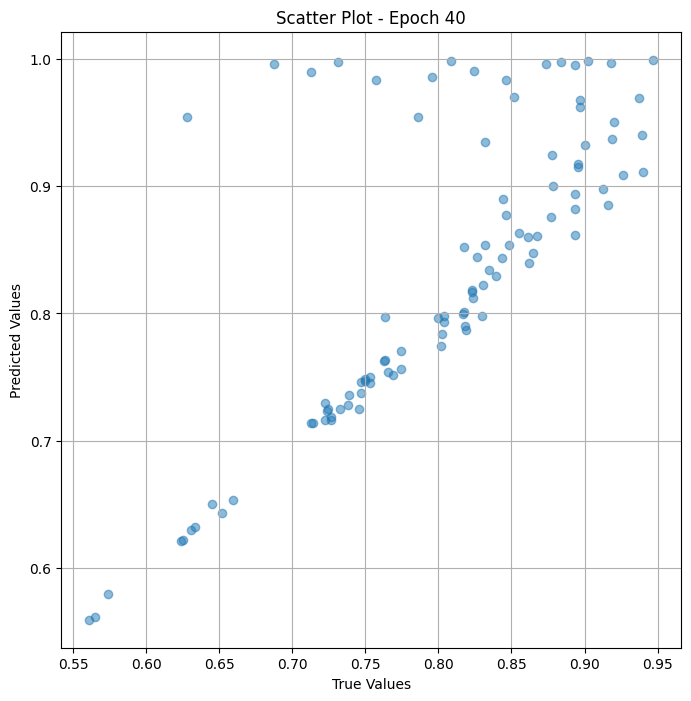


 Epoch: (41/50) Loss = 2.918171503552003e-06

 Epoch: (41/50) Loss_rmse = 0.0017082656268030405

 Epoch: (41/50) R^2 = 0.999610424041748

 Epoch: (41/50) MAE = 0.0015819668769836426

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.8433735, 0.9186992, 0.94, 0.8484849, 0.8969072, 0.8969072, 0.78571427, 0.56122446, 0.625, 0.87826085, 0.9, 0.7570093, 0.7628866, 0.9263158, 0.76344085, 0.8348624, 0.89361703, 0.65957445, 0.8172043, 0.82417583, 0.8165138, 0.71428573, 0.8021978, 0.8956522, 0.92, 0.6875, 0.89361703, 0.7380952, 0.85148513, 0.8933333, 0.7222222, 0.9126214, 0.6304348, 0.82653064, 0.91818184, 0.83, 0.5652174, 0.8037383, 0.9026549, 0.72380954, 0.82300884, 0.74561405, 0.712963, 0.7746479, 0.7529412, 0.8181818, 0.8736842, 0.82300884, 0.84444445, 0.94690263, 0.62376237, 0.7263158, 0.76363635, 0.7532467, 0.8301887, 0.6448598, 0.8235294, 0.8020833, 0.7741935, 0.7326733, 0.85542166, 0.9157895, 0.9369369, 0.8952381, 0.83168316, 0.7241379, 0.8461538

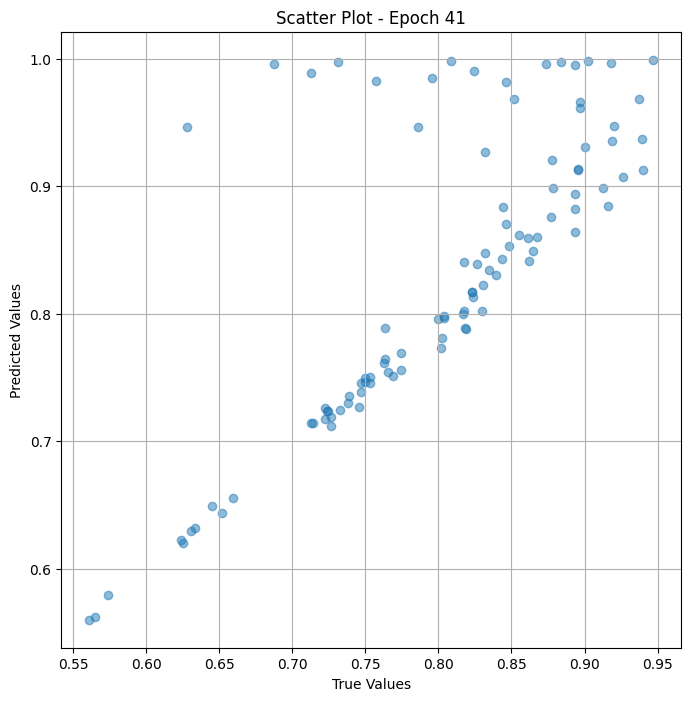


 Epoch: (42/50) Loss = 2.7121006951347226e-06

 Epoch: (42/50) Loss_rmse = 0.0016468457179144025

 Epoch: (42/50) R^2 = 0.9996379613876343

 Epoch: (42/50) MAE = 0.0014999806880950928

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.8433735, 0.9186992, 0.94, 0.8484849, 0.8969072, 0.8969072, 0.78571427, 0.56122446, 0.625, 0.87826085, 0.9, 0.7570093, 0.7628866, 0.9263158, 0.76344085, 0.8348624, 0.89361703, 0.65957445, 0.8172043, 0.82417583, 0.8165138, 0.71428573, 0.8021978, 0.8956522, 0.92, 0.6875, 0.89361703, 0.7380952, 0.85148513, 0.8933333, 0.7222222, 0.9126214, 0.6304348, 0.82653064, 0.91818184, 0.83, 0.5652174, 0.8037383, 0.9026549, 0.72380954, 0.82300884, 0.74561405, 0.712963, 0.7746479, 0.7529412, 0.8181818, 0.8736842, 0.82300884, 0.84444445, 0.94690263, 0.62376237, 0.7263158, 0.76363635, 0.7532467, 0.8301887, 0.6448598, 0.8235294, 0.8020833, 0.7741935, 0.7326733, 0.85542166, 0.9157895, 0.9369369, 0.8952381, 0.83168316, 0.7241379, 0.84615


 Epoch: (43/50) Loss = 2.585145011835266e-06

 Epoch: (43/50) Loss_rmse = 0.001607838668860495

 Epoch: (43/50) R^2 = 0.9996548891067505

 Epoch: (43/50) MAE = 0.001408502459526062

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.8433735, 0.9186992, 0.94, 0.8484849, 0.8969072, 0.8969072, 0.78571427, 0.56122446, 0.625, 0.87826085, 0.9, 0.7570093, 0.7628866, 0.9263158, 0.76344085, 0.8348624, 0.89361703, 0.65957445, 0.8172043, 0.82417583, 0.8165138, 0.71428573, 0.8021978, 0.8956522, 0.92, 0.6875, 0.89361703, 0.7380952, 0.85148513, 0.8933333, 0.7222222, 0.9126214, 0.6304348, 0.82653064, 0.91818184, 0.83, 0.5652174, 0.8037383, 0.9026549, 0.72380954, 0.82300884, 0.74561405, 0.712963, 0.7746479, 0.7529412, 0.8181818, 0.8736842, 0.82300884, 0.84444445, 0.94690263, 0.62376237, 0.7263158, 0.76363635, 0.7532467, 0.8301887, 0.6448598, 0.8235294, 0.8020833, 0.7741935, 0.7326733, 0.85542166, 0.9157895, 0.9369369, 0.8952381, 0.83168316, 0.7241379, 0.84615386

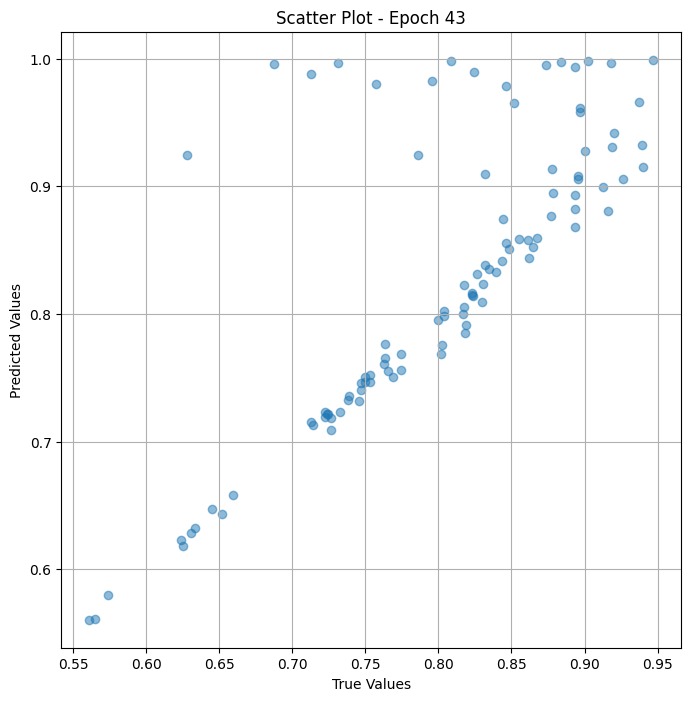


 Epoch: (44/50) Loss = 2.559089352871524e-06

 Epoch: (44/50) Loss_rmse = 0.0015997154405340552

 Epoch: (44/50) R^2 = 0.9996584057807922

 Epoch: (44/50) MAE = 0.0013142228126525879

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.8433735, 0.9186992, 0.94, 0.8484849, 0.8969072, 0.8969072, 0.78571427, 0.56122446, 0.625, 0.87826085, 0.9, 0.7570093, 0.7628866, 0.9263158, 0.76344085, 0.8348624, 0.89361703, 0.65957445, 0.8172043, 0.82417583, 0.8165138, 0.71428573, 0.8021978, 0.8956522, 0.92, 0.6875, 0.89361703, 0.7380952, 0.85148513, 0.8933333, 0.7222222, 0.9126214, 0.6304348, 0.82653064, 0.91818184, 0.83, 0.5652174, 0.8037383, 0.9026549, 0.72380954, 0.82300884, 0.74561405, 0.712963, 0.7746479, 0.7529412, 0.8181818, 0.8736842, 0.82300884, 0.84444445, 0.94690263, 0.62376237, 0.7263158, 0.76363635, 0.7532467, 0.8301887, 0.6448598, 0.8235294, 0.8020833, 0.7741935, 0.7326733, 0.85542166, 0.9157895, 0.9369369, 0.8952381, 0.83168316, 0.7241379, 0.846153

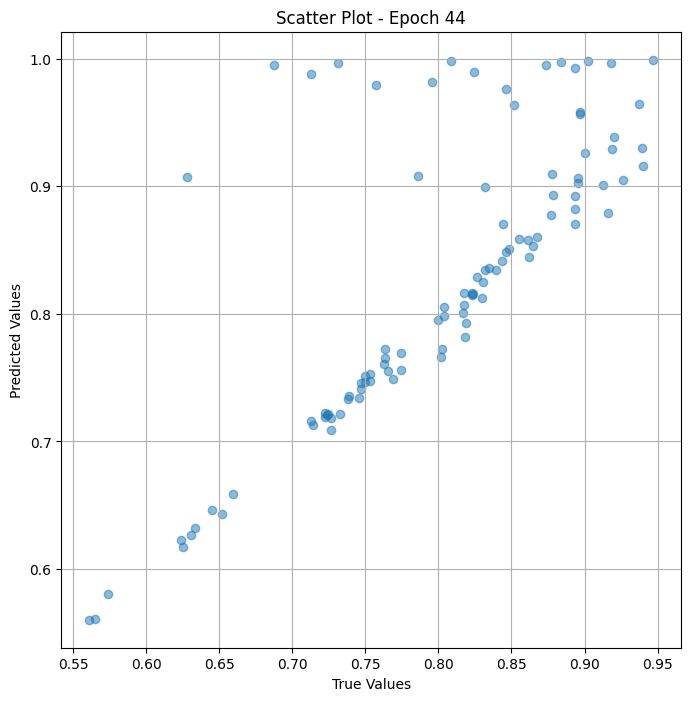


 Epoch: (45/50) Loss = 2.584463345556287e-06

 Epoch: (45/50) Loss_rmse = 0.0016076266765594482

 Epoch: (45/50) R^2 = 0.99965500831604

 Epoch: (45/50) MAE = 0.0012919902801513672

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.8433735, 0.9186992, 0.94, 0.8484849, 0.8969072, 0.8969072, 0.78571427, 0.56122446, 0.625, 0.87826085, 0.9, 0.7570093, 0.7628866, 0.9263158, 0.76344085, 0.8348624, 0.89361703, 0.65957445, 0.8172043, 0.82417583, 0.8165138, 0.71428573, 0.8021978, 0.8956522, 0.92, 0.6875, 0.89361703, 0.7380952, 0.85148513, 0.8933333, 0.7222222, 0.9126214, 0.6304348, 0.82653064, 0.91818184, 0.83, 0.5652174, 0.8037383, 0.9026549, 0.72380954, 0.82300884, 0.74561405, 0.712963, 0.7746479, 0.7529412, 0.8181818, 0.8736842, 0.82300884, 0.84444445, 0.94690263, 0.62376237, 0.7263158, 0.76363635, 0.7532467, 0.8301887, 0.6448598, 0.8235294, 0.8020833, 0.7741935, 0.7326733, 0.85542166, 0.9157895, 0.9369369, 0.8952381, 0.83168316, 0.7241379, 0.84615386


 Epoch: (46/50) Loss = 2.601469532237388e-06

 Epoch: (46/50) Loss_rmse = 0.0016129071591421962

 Epoch: (46/50) R^2 = 0.9996527433395386

 Epoch: (46/50) MAE = 0.0012709945440292358

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.8433735, 0.9186992, 0.94, 0.8484849, 0.8969072, 0.8969072, 0.78571427, 0.56122446, 0.625, 0.87826085, 0.9, 0.7570093, 0.7628866, 0.9263158, 0.76344085, 0.8348624, 0.89361703, 0.65957445, 0.8172043, 0.82417583, 0.8165138, 0.71428573, 0.8021978, 0.8956522, 0.92, 0.6875, 0.89361703, 0.7380952, 0.85148513, 0.8933333, 0.7222222, 0.9126214, 0.6304348, 0.82653064, 0.91818184, 0.83, 0.5652174, 0.8037383, 0.9026549, 0.72380954, 0.82300884, 0.74561405, 0.712963, 0.7746479, 0.7529412, 0.8181818, 0.8736842, 0.82300884, 0.84444445, 0.94690263, 0.62376237, 0.7263158, 0.76363635, 0.7532467, 0.8301887, 0.6448598, 0.8235294, 0.8020833, 0.7741935, 0.7326733, 0.85542166, 0.9157895, 0.9369369, 0.8952381, 0.83168316, 0.7241379, 0.846153

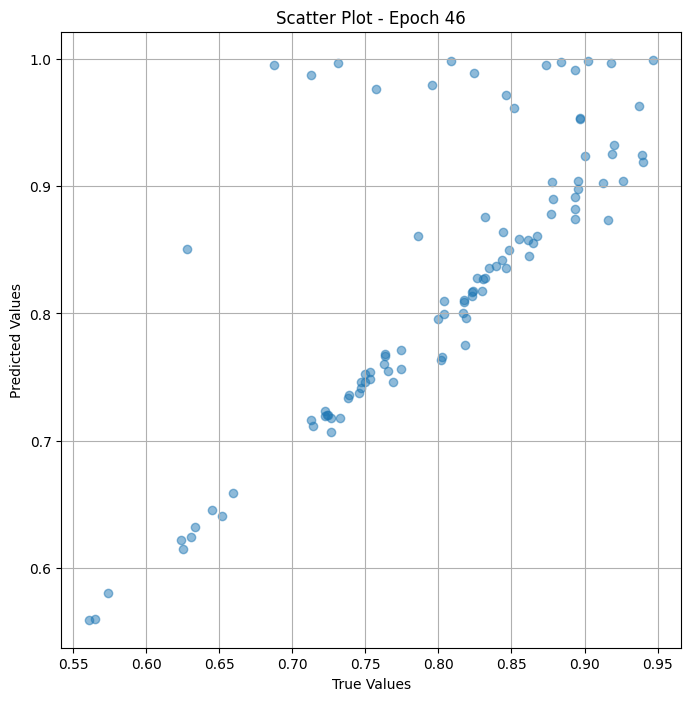


 Epoch: (47/50) Loss = 2.64137588601443e-06

 Epoch: (47/50) Loss_rmse = 0.0016252310015261173

 Epoch: (47/50) R^2 = 0.9996473789215088

 Epoch: (47/50) MAE = 0.0011424869298934937

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.8433735, 0.9186992, 0.94, 0.8484849, 0.8969072, 0.8969072, 0.78571427, 0.56122446, 0.625, 0.87826085, 0.9, 0.7570093, 0.7628866, 0.9263158, 0.76344085, 0.8348624, 0.89361703, 0.65957445, 0.8172043, 0.82417583, 0.8165138, 0.71428573, 0.8021978, 0.8956522, 0.92, 0.6875, 0.89361703, 0.7380952, 0.85148513, 0.8933333, 0.7222222, 0.9126214, 0.6304348, 0.82653064, 0.91818184, 0.83, 0.5652174, 0.8037383, 0.9026549, 0.72380954, 0.82300884, 0.74561405, 0.712963, 0.7746479, 0.7529412, 0.8181818, 0.8736842, 0.82300884, 0.84444445, 0.94690263, 0.62376237, 0.7263158, 0.76363635, 0.7532467, 0.8301887, 0.6448598, 0.8235294, 0.8020833, 0.7741935, 0.7326733, 0.85542166, 0.9157895, 0.9369369, 0.8952381, 0.83168316, 0.7241379, 0.8461538

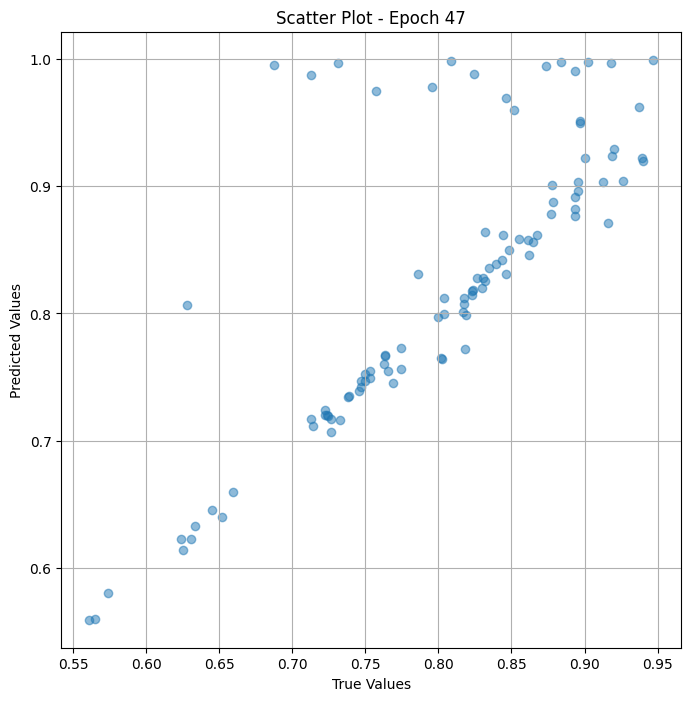


 Epoch: (48/50) Loss = 2.8472293251979863e-06

 Epoch: (48/50) Loss_rmse = 0.0016873735003173351

 Epoch: (48/50) R^2 = 0.9996199011802673

 Epoch: (48/50) MAE = 0.0010169148445129395

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.8433735, 0.9186992, 0.94, 0.8484849, 0.8969072, 0.8969072, 0.78571427, 0.56122446, 0.625, 0.87826085, 0.9, 0.7570093, 0.7628866, 0.9263158, 0.76344085, 0.8348624, 0.89361703, 0.65957445, 0.8172043, 0.82417583, 0.8165138, 0.71428573, 0.8021978, 0.8956522, 0.92, 0.6875, 0.89361703, 0.7380952, 0.85148513, 0.8933333, 0.7222222, 0.9126214, 0.6304348, 0.82653064, 0.91818184, 0.83, 0.5652174, 0.8037383, 0.9026549, 0.72380954, 0.82300884, 0.74561405, 0.712963, 0.7746479, 0.7529412, 0.8181818, 0.8736842, 0.82300884, 0.84444445, 0.94690263, 0.62376237, 0.7263158, 0.76363635, 0.7532467, 0.8301887, 0.6448598, 0.8235294, 0.8020833, 0.7741935, 0.7326733, 0.85542166, 0.9157895, 0.9369369, 0.8952381, 0.83168316, 0.7241379, 0.84615

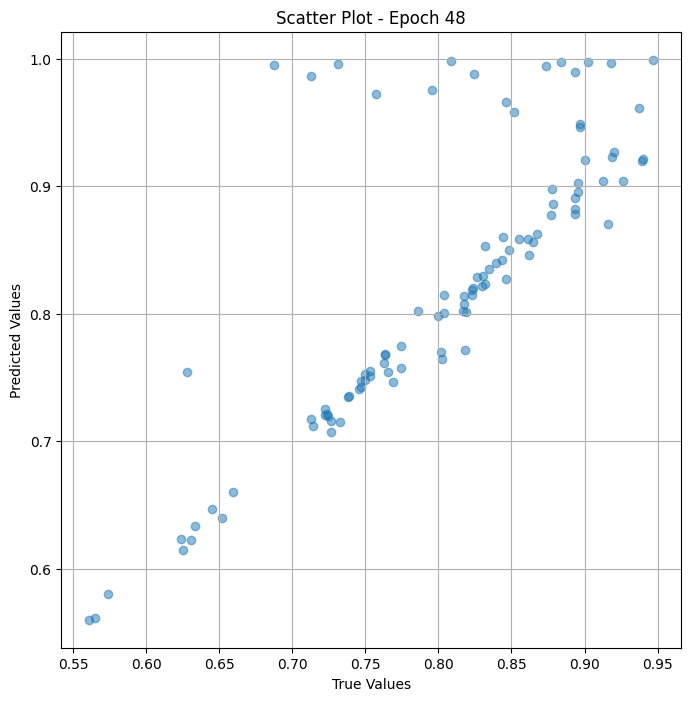


 Epoch: (49/50) Loss = 3.4253735066158697e-06

 Epoch: (49/50) Loss_rmse = 0.0018507764907553792

 Epoch: (49/50) R^2 = 0.999542772769928

 Epoch: (49/50) MAE = 0.0011227130889892578

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.8433735, 0.9186992, 0.94, 0.8484849, 0.8969072, 0.8969072, 0.78571427, 0.56122446, 0.625, 0.87826085, 0.9, 0.7570093, 0.7628866, 0.9263158, 0.76344085, 0.8348624, 0.89361703, 0.65957445, 0.8172043, 0.82417583, 0.8165138, 0.71428573, 0.8021978, 0.8956522, 0.92, 0.6875, 0.89361703, 0.7380952, 0.85148513, 0.8933333, 0.7222222, 0.9126214, 0.6304348, 0.82653064, 0.91818184, 0.83, 0.5652174, 0.8037383, 0.9026549, 0.72380954, 0.82300884, 0.74561405, 0.712963, 0.7746479, 0.7529412, 0.8181818, 0.8736842, 0.82300884, 0.84444445, 0.94690263, 0.62376237, 0.7263158, 0.76363635, 0.7532467, 0.8301887, 0.6448598, 0.8235294, 0.8020833, 0.7741935, 0.7326733, 0.85542166, 0.9157895, 0.9369369, 0.8952381, 0.83168316, 0.7241379, 0.846153

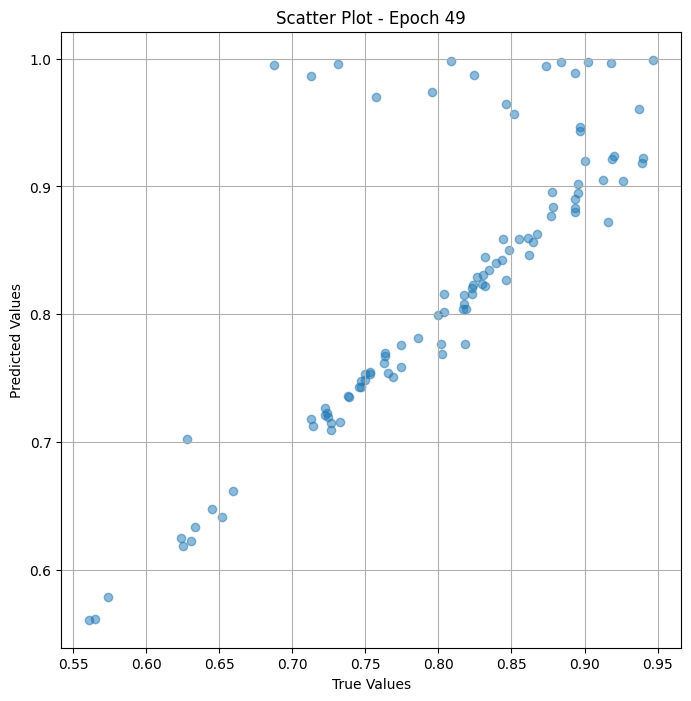


 Epoch: (50/50) Loss = 4.96507254865719e-06

 Epoch: (50/50) Loss_rmse = 0.0022282442077994347

 Epoch: (50/50) R^2 = 0.9993371963500977

 Epoch: (50/50) MAE = 0.0014814287424087524

 true_values_list_val : 100

 predicted_values_list_val : 100

 true_values_list_val : [0.8433735, 0.9186992, 0.94, 0.8484849, 0.8969072, 0.8969072, 0.78571427, 0.56122446, 0.625, 0.87826085, 0.9, 0.7570093, 0.7628866, 0.9263158, 0.76344085, 0.8348624, 0.89361703, 0.65957445, 0.8172043, 0.82417583, 0.8165138, 0.71428573, 0.8021978, 0.8956522, 0.92, 0.6875, 0.89361703, 0.7380952, 0.85148513, 0.8933333, 0.7222222, 0.9126214, 0.6304348, 0.82653064, 0.91818184, 0.83, 0.5652174, 0.8037383, 0.9026549, 0.72380954, 0.82300884, 0.74561405, 0.712963, 0.7746479, 0.7529412, 0.8181818, 0.8736842, 0.82300884, 0.84444445, 0.94690263, 0.62376237, 0.7263158, 0.76363635, 0.7532467, 0.8301887, 0.6448598, 0.8235294, 0.8020833, 0.7741935, 0.7326733, 0.85542166, 0.9157895, 0.9369369, 0.8952381, 0.83168316, 0.7241379, 0.8461538

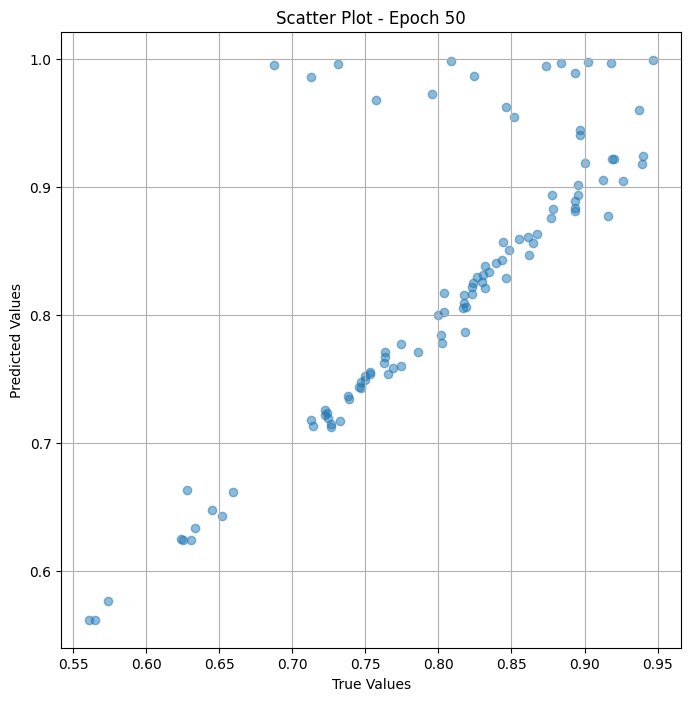

In [ ]:
# Training the model and save weights
fit(50, model_fine_test, train_dl_test)
torch.save(model_fine_test.state_dict(), "model_weights_vr_fine")

In [ ]:
true_values_list = [0.8433735, 0.9186992, 0.94, 0.8484849, 0.8969072, 0.8969072, 0.78571427, 0.56122446]

predicted_values_list= [0.84278667, 0.9218269, 0.92265654, 0.8502336, 0.9431594, 0.9467737, 0.7811691, 0.5609073]

import numpy as np
from scipy.stats import spearmanr


spearman_corr, _ = spearmanr(true_values_list, predicted_values_list)


print("Spearman correlation:",spearman_corr, _ )

Spearman correlation: 0.8024095954818835 0.016540722800677185
